# 6조
팀장 : 이예준

팀원 : 최수연, 최아름

In [27]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm    
import matplotlib
import os, warnings
import pandas as pd
import seaborn as sns
import numpy as np

health = pd.read_csv('C:/Users/chlal/Documents/GitHub/LikeLion_Pri/TeamProject/health.csv',encoding='ANSI')   

### 폰트가 깨지는 것을 방지합니다.

In [29]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

In [30]:
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

In [31]:

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

### 2016년도 자료 ~ 2019자료 취합

In [2]:
med19 = pd.read_csv('C:/Users/chlal/Documents/GitHub/LikeLion_Pri/TeamProject/Medical_Check_2019.csv')
med19 = med19.drop(['결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상'], axis=1)
med18 = pd.read_csv('C:/Users/chlal/Documents/GitHub/LikeLion_Pri/TeamProject//Medical_Check_2018.csv')
med18 = med18.drop(['결손치유무', '치아마모증유무', '제3대구치(사랑니)이상'], axis=1)
med17 = pd.read_csv('C:/Users/chlal/Documents/GitHub/LikeLion_Pri/TeamProject//Medical_Check_2017.csv')
med17 = med17.drop(['결손치유무', '치아마모증유무', '제3대구치(사랑니)이상'], axis=1)
med16 = pd.read_csv('C:/Users/chlal/Documents/GitHub/LikeLion_Pri/TeamProject//Medical_Check_2016.csv')

In [4]:
print(med19.shape)
print(med18.shape)
print(med17.shape)
print(med16.shape)

(1000000, 31)
(1000000, 31)
(1000000, 31)
(1000000, 31)


### 시도코드를 똑같이 묶어줌.

In [5]:
med19['시도코드'] = med19['시도코드'].map({11: '서울특별시', 41: '경기도', 42: '강원도', 26: '부산광역시', 27: '대구광역시', 28: '인천광역시',
                                 29: '광주광역시', 30: '대전광역시', 31: '울산광역시', 36: '세종시', 
                                 43: '충청북도', 44: '충청남도', 45: '전라북도', 46: '전라남도', 47: '경상북도', 48: '경상남도', 50: '제주도'})
med18['시도코드'] = med18['시도코드'].map({11: '서울특별시', 41: '경기도', 42: '강원도', 26: '부산광역시', 27: '대구광역시', 28: '인천광역시',
                                 29: '광주광역시', 30: '대전광역시', 31: '울산광역시', 36: '세종시', 
                                 43: '충청북도', 44: '충청남도', 45: '전라북도', 46: '전라남도', 47: '경상북도', 48: '경상남도', 50: '제주도'})
med17['시도코드'] = med17['시도코드'].map({11: '서울특별시', 41: '경기도', 42: '강원도', 26: '부산광역시', 27: '대구광역시', 28: '인천광역시',
                                 29: '광주광역시', 30: '대전광역시', 31: '울산광역시', 36: '세종시', 
                                 43: '충청북도', 44: '충청남도', 45: '전라북도', 46: '전라남도', 47: '경상북도', 48: '경상남도', 49: '제주도'})
med16['시도코드'] = med16['시도코드'].map({11: '서울특별시', 41: '경기도', 42: '강원도', 26: '부산광역시', 27: '대구광역시', 28: '인천광역시',
                                 29: '광주광역시', 30: '대전광역시', 31: '울산광역시', 36: '세종시', 
                                 43: '충청북도', 44: '충청남도', 45: '전라북도', 46: '전라남도', 47: '경상북도', 48: '경상남도', 49: '제주도'})

In [6]:
## 19년 데이터 컬럼 재배치
med19 = med19.loc[:, ['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
                      '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', 
                      '감마지티피', '흡연상태', '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자']]
med19.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

In [7]:
## 데이터프레임 4개 합치기
med_total = pd.concat([med19, med18, med17, med16], ignore_index=True)
med_total.shape

(4000000, 31)

In [8]:
med_total.isnull().sum()

기준년도                 0
가입자일련번호              0
성별코드                 0
연령대코드(5세단위)          0
시도코드                 0
신장(5Cm단위)          897
체중(5Kg단위)          897
허리둘레              1010
시력(좌)              892
시력(우)              908
청력(좌)              777
청력(우)              780
수축기혈압            11242
이완기혈압            11244
식전혈당(공복혈당)       11486
총콜레스테롤         1333738
트리글리세라이드       1333752
HDL콜레스테롤       1333760
LDL콜레스테롤       1352794
혈색소              11499
요단백              30319
혈청크레아티닌          11477
(혈청지오티)AST       11470
(혈청지오티)ALT       11472
감마지티피            11482
흡연상태              1014
음주여부           1710861
구강검진 수검여부            0
치아우식증유무        3097699
치석             2463583
데이터 공개일자             0
dtype: int64

In [21]:
med_total.value_counts(['연령대코드(5세단위)', '성별코드']).sort_index()

연령대코드(5세단위)  성별코드
5            1        44626
             2        57140
6            1       143281
             2       123112
7            1       207464
             2       124619
8            1       228373
             2       111341
9            1       280209
             2       234242
10           1       249982
             2       212533
11           1       266911
             2       260801
12           1       220145
             2       212502
13           1       201128
             2       213718
14           1       109787
             2       110656
15           1        96993
             2       109520
16           1        45636
             2        56164
17           1        26997
             2        36859
18           1         5002
             2        10259
dtype: int64

#### 결측치가 많은 치아우식증유무, 치석 항목을 삭제해줍니다

In [22]:
med_total = med_total.drop(['치아우식증유무', '치석'], axis=1)

# med_total.info()

In [10]:
med1.isnull().sum()

기준년도                 0
가입자일련번호              0
성별코드                 0
연령대코드(5세단위)          0
시도코드                 0
신장(5Cm단위)          897
체중(5Kg단위)          897
허리둘레              1010
시력(좌)              892
시력(우)              908
청력(좌)              777
청력(우)              780
수축기혈압            11242
이완기혈압            11244
식전혈당(공복혈당)       11486
총콜레스테롤         1333738
트리글리세라이드       1333752
HDL콜레스테롤       1333760
LDL콜레스테롤       1352794
혈색소              11499
요단백              30319
혈청크레아티닌          11477
(혈청지오티)AST       11470
(혈청지오티)ALT       11472
감마지티피            11482
흡연상태              1014
음주여부           1710861
구강검진 수검여부            0
데이터 공개일자             0
dtype: int64

### 결측치값을 제거해줌

In [23]:
med_total_1 = med_total.dropna()   # med_total_1 : 결측치를 모두 제거한 데이터 프레임
med_total_1.isnull().sum()

기준년도           0
가입자일련번호        0
성별코드           0
연령대코드(5세단위)    0
시도코드           0
신장(5Cm단위)      0
체중(5Kg단위)      0
허리둘레           0
시력(좌)          0
시력(우)          0
청력(좌)          0
청력(우)          0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
총콜레스테롤         0
트리글리세라이드       0
HDL콜레스테롤       0
LDL콜레스테롤       0
혈색소            0
요단백            0
혈청크레아티닌        0
(혈청지오티)AST     0
(혈청지오티)ALT     0
감마지티피          0
흡연상태           0
음주여부           0
구강검진 수검여부      0
데이터 공개일자       0
dtype: int64

In [24]:
med_total_1 = med_total_1.drop(['가입자일련번호', '데이터 공개일자'], axis=1)
med_total_1['BMI지수'] = med_total_1['체중(5Kg단위)'] / (med_total_1['신장(5Cm단위)']/100)**2

### 연령코드별 그룹화해줌

In [12]:
age_5 = med1.loc[med1['연령대코드(5세단위)']==5, :]
age_6 = med1.loc[med1['연령대코드(5세단위)']==6, :]
age_7 = med1.loc[med1['연령대코드(5세단위)']==7, :]
age_8 = med1.loc[med1['연령대코드(5세단위)']==8, :]
age_9 = med1.loc[med1['연령대코드(5세단위)']==9, :]
age_10 = med1.loc[med1['연령대코드(5세단위)']==10, :]
age_11 = med1.loc[med1['연령대코드(5세단위)']==11, :]
age_12 = med1.loc[med1['연령대코드(5세단위)']==12, :]
age_13 = med1.loc[med1['연령대코드(5세단위)']==13, :]
age_14 = med1.loc[med1['연령대코드(5세단위)']==14, :]
age_15 = med1.loc[med1['연령대코드(5세단위)']==15, :]
age_16 = med1.loc[med1['연령대코드(5세단위)']==16, :]
age_17 = med1.loc[med1['연령대코드(5세단위)']==17, :]
age_18 = med1.loc[med1['연령대코드(5세단위)']==18, :]

### 시도코드별 그룹화

In [13]:
sel = med1[med1['시도코드'] == '서울특별시']
pus = med1[med1['시도코드'] =='부산광역시']
tae = med1[med1['시도코드'] =='대구광역시']
icn = med1[med1['시도코드'] =='인천광역시']
kwj = med1[med1['시도코드'] =='광주광역시']
tjn = med1[med1['시도코드'] =='대전광역시']
usn = med1[med1['시도코드'] =='울산광역시']
sjs = med1[med1['시도코드'] =='세종시']
ggd = med1[med1['시도코드'] =='경기도']
gwd = med1[med1['시도코드'] =='강원도']
ccb = med1[med1['시도코드'] == '충청북도']
ccn = med1[med1['시도코드'] == '충청남도']
jlb = med1[med1['시도코드'] == '전라북도']
jln = med1[med1['시도코드'] == '전라남도']
gsb = med1[med1['시도코드'] == '경상북도']
gsn = med1[med1['시도코드'] == '경상남도']
cju = med1[med1['시도코드'] == '제주도']

In [14]:
med1['연령대코드(5세단위)'].value_counts()

9     234127
11    177204
10    167644
13    153189
12    146090
7     107715
8     106196
6      80351
14     68779
15     59445
5      31246
16     30134
17     17185
18      3276
Name: 연령대코드(5세단위), dtype: int64

In [19]:
med1.value_counts(['성별코드']).sort_index()

성별코드
1       800107
2       582474
dtype: int64

### 지역별 인구 비율 시각화 (Pieplot)

In [25]:
sido = []

sido_list = list(med_total_1.value_counts(['시도코드']).index)
for one in sido_list:
    sido.append(one[0])

sido_1 = list(med_total_1.value_counts(['시도코드']).values)
    
# sido, sido_1

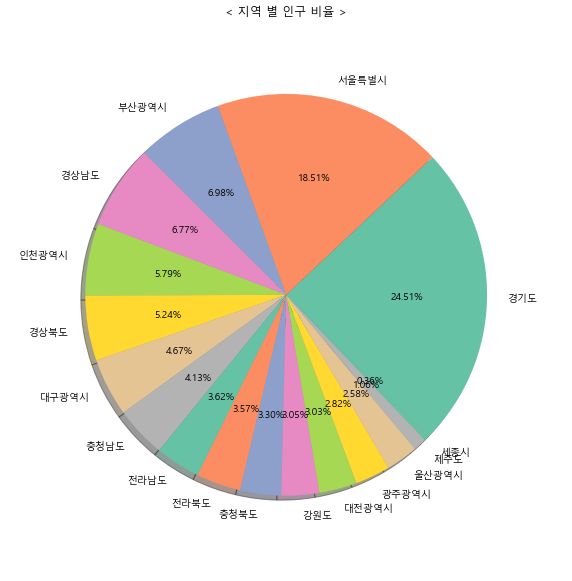

In [32]:
sido_val = np.array(med_total_1.value_counts(['시도코드']).sort_index())
color = ['#ff3342']
plt.figure(figsize=(10, 15), facecolor='white')
plt.pie(sido_1, radius=0.9, shadow=True, labels=sido, 
        autopct='%.2f%%', startangle=-45, rotatelabels=False, colors=plt.cm.Set2.colors)
plt.title('< 지역 별 인구 비율 >', x=0.5, y=0.99)
plt.show()

### 지역별 연령대 비율 시각화 (pieplot)

In [33]:

med_total_4 = med_total_1.copy()

med_total_4['연령대코드(5세단위)'] = med_total_4['연령대코드(5세단위)'].map({5: '20~24세', 6: '25~29세', 7: '30~34세', 8: '35~39세', 
                                                                         9: '40~44세', 10: '45~49세', 11: '50~54세', 12: '55~59세', 
                                                             13: '60~64세', 14: '65~69세', 15: '70~74세', 16: '75~79세', 17: '80~84세', 18: '85세+',})

med_total_4['연령대코드(5세단위)'].value_counts()
pop_count = med_total_4.groupby(['시도코드', '연령대코드(5세단위)'])['기준년도'].count()

In [34]:
pop_count['강원도'].index, pop_count['강원도'].values

(Index(['20~24세', '25~29세', '30~34세', '35~39세', '40~44세', '45~49세', '50~54세',
        '55~59세', '60~64세', '65~69세', '70~74세', '75~79세', '80~84세', '85세+'],
       dtype='object', name='연령대코드(5세단위)'),
 array([1127, 2292, 2659, 2751, 6446, 4662, 5315, 4738, 5278, 2096, 2520,
        1307,  799,  187], dtype=int64))

In [35]:

sido = []

sido_list = list(med_total_4.value_counts(['시도코드']).index)
for one in sido_list:
    sido.append(one[0])

sido_1 = list(med_total_4.value_counts(['시도코드']).values)
    
# sido, sido_1

### 서울, 경기, 인천, 강원도 인구 비율¶

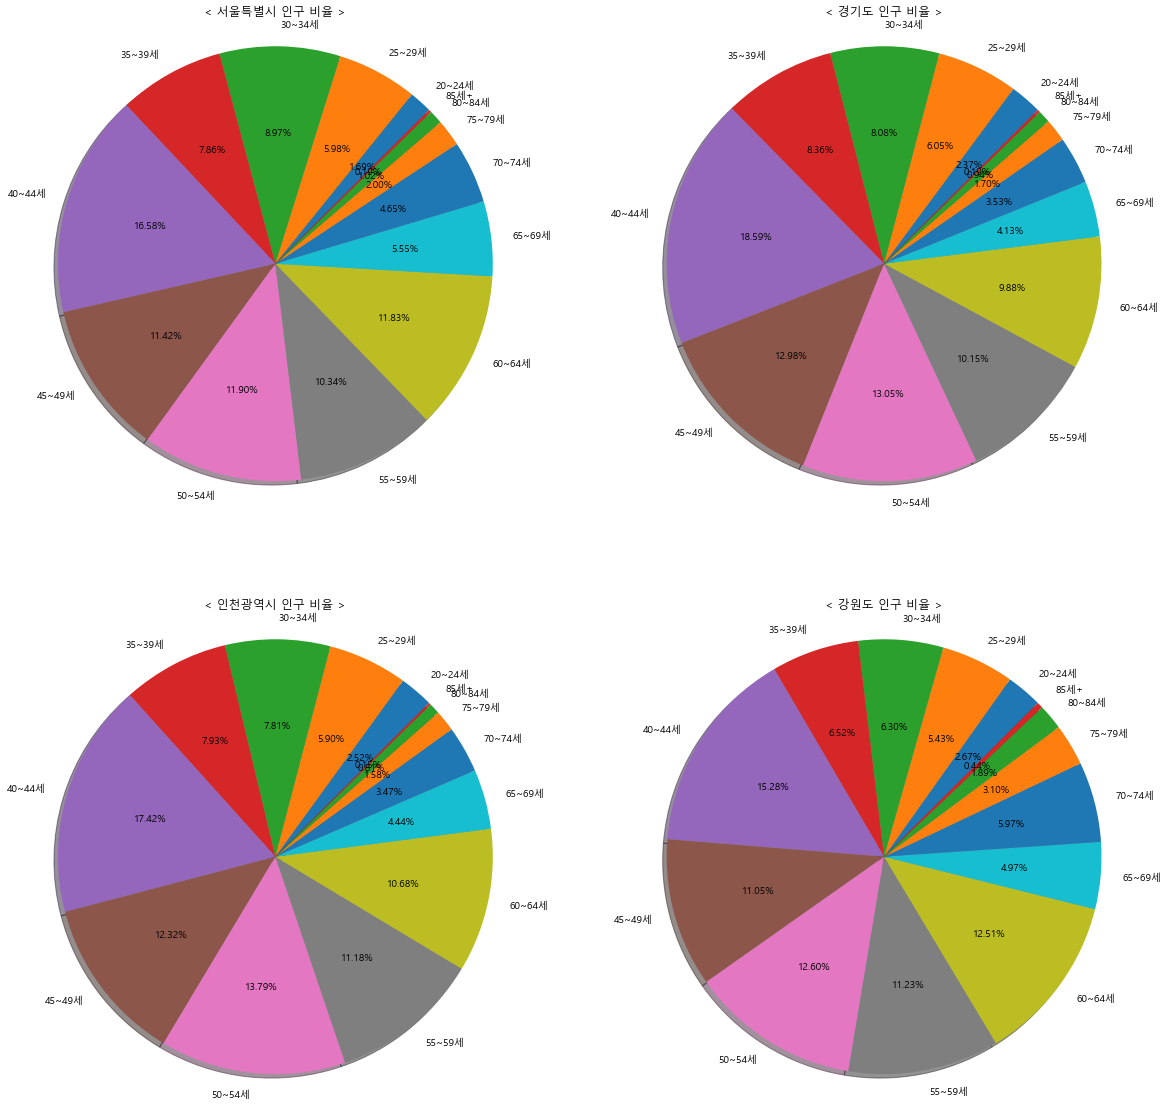

In [36]:
# sido_val = np.array(med_total_1.value_counts(['시도코드']).sort_index())

plt.figure(figsize=(20,20), facecolor='white')

plt.subplot(221)
plt.pie(pop_count['서울특별시'], labels=pop_count['서울특별시'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 서울특별시 인구 비율 >', x=0.5, y=0.99)

plt.subplot(222)
plt.pie(pop_count['경기도'], labels=pop_count['경기도'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 경기도 인구 비율 >', x=0.5, y=0.99)

plt.subplot(223)
plt.pie(pop_count['인천광역시'], labels=pop_count['인천광역시'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 인천광역시 인구 비율 >', x=0.5, y=0.99)

plt.subplot(224)
plt.pie(pop_count['강원도'], labels=pop_count['강원도'].index, radius=1.1, shadow=True, autopct='%.2f%%', startangle=45)
plt.title('< 강원도 인구 비율 >', x=0.5, y=0.99)

plt.show()

### 연령대 별로 변수를 따로 지정해준 후 상관관계 비교

In [37]:
age_5 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==5, :]      # 31246
age_6 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==6, :]      # 80351
age_7 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==7, :]      # 107715
age_8 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==8, :]      # 106196

age_9 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==9, :]      # 234127
age_10 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==10, :]    # 167644
age_11 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==11, :]    # 177204
age_12 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==12, :]    # 146090

age_13 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==13, :]    # 153189
age_14 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==14, :]    # 68779
age_15 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==15, :]    # 59445
age_16 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==16, :]    # 30134

age_17 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==17, :]    # 17185
age_18 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==18, :]    # 3276

In [38]:
## 남자
age_5_m = age_5.loc[age_5['성별코드']==1, :]      # 31246
age_6_m = age_6.loc[age_6['성별코드']==1, :]      # 80351
age_7_m = age_7.loc[age_7['성별코드']==1, :]      # 107715
age_8_m = age_8.loc[age_8['성별코드']==1, :]      # 106196

age_9_m = age_9.loc[age_9['성별코드']==1, :]      # 234127
age_10_m = age_10.loc[age_10['성별코드']==1, :]    # 167644
age_11_m = age_11.loc[age_11['성별코드']==1, :]    # 177204
age_12_m = age_12.loc[age_12['성별코드']==1, :]    # 146090

age_13_m = age_13.loc[age_13['성별코드']==1, :]    # 153189
age_14_m = age_14.loc[age_14['성별코드']==1, :]    # 68779
age_15_m = age_15.loc[age_15['성별코드']==1, :]    # 59445
age_16_m = age_16.loc[age_16['성별코드']==1, :]    # 30134

age_17_m = age_17.loc[age_17['성별코드']==1, :]    # 17185
age_18_m = age_18.loc[age_18['성별코드']==1, :]    # 3276

## 여자
age_5_w = age_5.loc[age_5['성별코드']==2, :]
age_6_w = age_6.loc[age_6['성별코드']==2, :]
age_7_w = age_7.loc[age_7['성별코드']==2, :]
age_8_w = age_8.loc[age_8['성별코드']==2, :]

age_9_w = age_9.loc[age_9['성별코드']==2, :]
age_10_w = age_10.loc[age_10['성별코드']==2, :]
age_11_w = age_11.loc[age_11['성별코드']==2, :]
age_12_w = age_12.loc[age_12['성별코드']==2, :]

age_13_w = age_13.loc[age_13['성별코드']==2, :]
age_14_w = age_14.loc[age_14['성별코드']==2, :]
age_15_w = age_15.loc[age_15['성별코드']==2, :]
age_16_w = age_16.loc[age_16['성별코드']==2, :]

age_17_w = age_17.loc[age_17['성별코드']==2, :]
age_18_w = age_18.loc[age_18['성별코드']==2, :]

In [39]:
# age_5 = age_5.loc[:, not age_5['연령대코드(5세단위)']].corr(method='pearson')
age_5_c = age_5.iloc[:, 4:].corr(method='pearson')
age_6_c = age_6.iloc[:, 4:].corr(method='pearson')
age_7_c = age_7.iloc[:, 4:].corr(method='pearson')
age_8_c = age_8.iloc[:, 4:].corr(method='pearson')

age_9_c = age_9.iloc[:, 4:].corr(method='pearson')
age_10_c = age_10.iloc[:, 4:].corr(method='pearson')
age_11_c = age_11.iloc[:, 4:].corr(method='pearson')
age_12_c = age_12.iloc[:, 4:].corr(method='pearson')

age_13_c = age_13.iloc[:, 4:].corr(method='pearson')
age_14_c = age_14.iloc[:, 4:].corr(method='pearson')
age_15_c = age_15.iloc[:, 4:].corr(method='pearson')
age_16_c = age_16.iloc[:, 4:].corr(method='pearson')

age_17_c = age_17.iloc[:, 4:].corr(method='pearson')
age_18_c = age_18.iloc[:, 4:].corr(method='pearson')

In [40]:

## 남자
age_5_mc = age_5_m.iloc[:, 4:].corr(method='pearson')
age_6_mc = age_6_m.iloc[:, 4:].corr(method='pearson')
age_7_mc = age_7_m.iloc[:, 4:].corr(method='pearson')
age_8_mc = age_8_m.iloc[:, 4:].corr(method='pearson')

age_9_mc = age_9_m.iloc[:, 4:].corr(method='pearson')
age_10_mc = age_10_m.iloc[:, 4:].corr(method='pearson')
age_11_mc = age_11_m.iloc[:, 4:].corr(method='pearson')
age_12_mc = age_12_m.iloc[:, 4:].corr(method='pearson')

age_13_mc = age_13_m.iloc[:, 4:].corr(method='pearson')
age_14_mc = age_14_m.iloc[:, 4:].corr(method='pearson')
age_15_mc = age_15_m.iloc[:, 4:].corr(method='pearson')
age_16_mc = age_16_m.iloc[:, 4:].corr(method='pearson')

age_17_mc = age_17_m.iloc[:, 4:].corr(method='pearson')
age_18_mc = age_18_m.iloc[:, 4:].corr(method='pearson')

## 여자
age_5_wc = age_5_w.iloc[:, 4:].corr(method='pearson')
age_6_wc = age_6_w.iloc[:, 4:].corr(method='pearson')
age_7_wc = age_7_w.iloc[:, 4:].corr(method='pearson')
age_8_wc = age_8_w.iloc[:, 4:].corr(method='pearson')

age_9_wc = age_9_w.iloc[:, 4:].corr(method='pearson')
age_10_wc = age_10_w.iloc[:, 4:].corr(method='pearson')
age_11_wc = age_11_w.iloc[:, 4:].corr(method='pearson')
age_12_wc = age_12_w.iloc[:, 4:].corr(method='pearson')

age_13_wc = age_13_w.iloc[:, 4:].corr(method='pearson')
age_14_wc = age_14_w.iloc[:, 4:].corr(method='pearson')
age_15_wc = age_15_w.iloc[:, 4:].corr(method='pearson')
age_16_wc = age_16_w.iloc[:, 4:].corr(method='pearson')

age_17_wc = age_17_w.iloc[:, 4:].corr(method='pearson')
age_18_wc = age_18_w.iloc[:, 4:].corr(method='pearson')

In [41]:

age_20_m = pd.concat([age_5_m, age_6_m], ignore_index=True)
age_30_m = pd.concat([age_7_m, age_8_m], ignore_index=True)
age_40_m = pd.concat([age_9_m, age_10_m], ignore_index=True)
age_50_m = pd.concat([age_11_m, age_12_m], ignore_index=True)
age_60_m = pd.concat([age_13_m, age_14_m], ignore_index=True)
age_70_m = pd.concat([age_15_m, age_16_m], ignore_index=True)
age_80_m = pd.concat([age_17_m, age_18_m], ignore_index=True)

age_20_w = pd.concat([age_5_w, age_6_w], ignore_index=True)
age_30_w = pd.concat([age_7_w, age_8_w], ignore_index=True)
age_40_w = pd.concat([age_9_w, age_10_w], ignore_index=True)
age_50_w = pd.concat([age_11_w, age_12_w], ignore_index=True)
age_60_w = pd.concat([age_13_w, age_14_w], ignore_index=True)
age_70_w = pd.concat([age_15_w, age_16_w], ignore_index=True)
age_80_w = pd.concat([age_17_w, age_18_w], ignore_index=True)

In [42]:
## 남자
age_20_mc = age_20_m.iloc[:, 4:].corr(method='pearson')
age_30_mc = age_30_m.iloc[:, 4:].corr(method='pearson')
age_40_mc = age_40_m.iloc[:, 4:].corr(method='pearson')
age_50_mc = age_50_m.iloc[:, 4:].corr(method='pearson')
age_60_mc = age_60_m.iloc[:, 4:].corr(method='pearson')
age_70_mc = age_70_m.iloc[:, 4:].corr(method='pearson')
age_80_mc = age_80_m.iloc[:, 4:].corr(method='pearson')

## 여자
age_20_wc = age_20_w.iloc[:, 4:].corr(method='pearson')
age_30_wc = age_30_w.iloc[:, 4:].corr(method='pearson')
age_40_wc = age_40_w.iloc[:, 4:].corr(method='pearson')
age_50_wc = age_50_w.iloc[:, 4:].corr(method='pearson')
age_60_wc = age_60_w.iloc[:, 4:].corr(method='pearson')
age_70_wc = age_70_w.iloc[:, 4:].corr(method='pearson')
age_80_wc = age_80_w.iloc[:, 4:].corr(method='pearson')

### 연령대 별 상관관계 비교 시각화 (Heatmap)

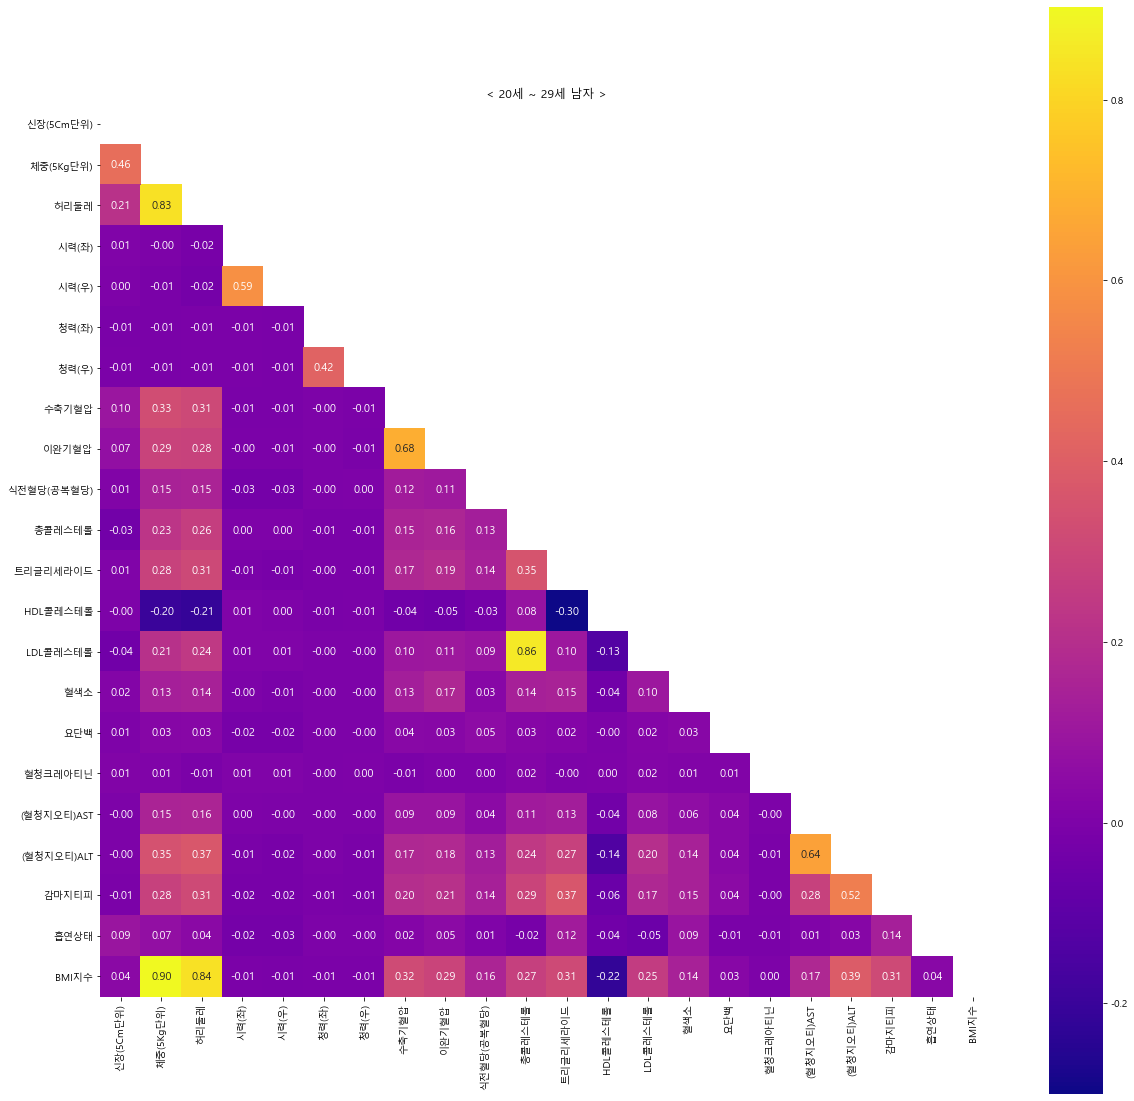

In [43]:

plt.figure(figsize=(20,20), facecolor='white')

mask = np.zeros_like(age_20_mc, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plt.subplot(5,4,1)
sns.heatmap(age_20_mc, mask=mask, annot=True, annot_kws={'size':11}, fmt='.2f', cmap='plasma', square=True)
plt.title('< 20세 ~ 29세 남자 >')
plt.show()

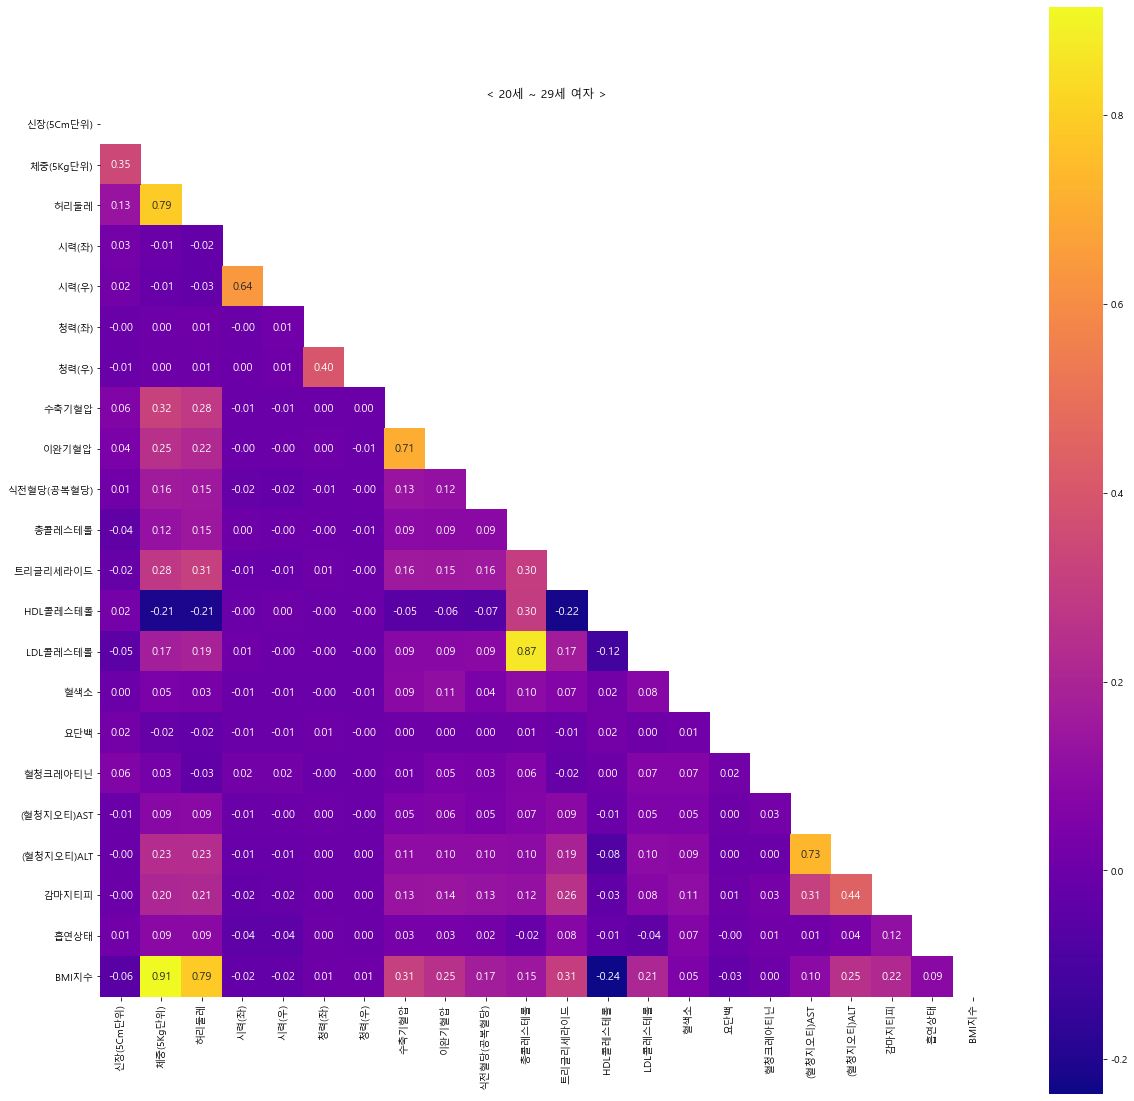

In [44]:

plt.figure(figsize=(20,20), facecolor='white')

mask = np.zeros_like(age_20_wc, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plt.subplot(5,4,1)
sns.heatmap(age_20_wc, mask=mask, annot=True, annot_kws={'size':11}, fmt='.2f', cmap='plasma', square=True)
plt.title('< 20세 ~ 29세 여자 >')
plt.show()

### 연령코드5의 변수들간 상관관계

In [45]:
corr_1 = age_5.loc[:, ['연령대코드(5세단위)',
                      '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '시력(좌)','시력(우)','청력(좌)','청력(우)',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']].corr(method='pearson')
corr_1

연령대코드(5세단위)  신장(5Cm단위)  체중(5Kg단위)      허리둘레     시력(좌)  ...  \
연령대코드(5세단위)          NaN        NaN        NaN       NaN       NaN  ...   
신장(5Cm단위)            NaN   1.000000   0.618021  0.427755  0.092548  ...   
체중(5Kg단위)            NaN   0.618021   1.000000  0.834595  0.068876  ...   
허리둘레                 NaN   0.427755   0.834595  1.000000  0.050215  ...   
시력(좌)                NaN   0.092548   0.068876  0.050215  1.000000  ...   
...                  ...        ...        ...       ...       ...  ...   
혈청크레아티닌              NaN   0.386558   0.302416  0.242476  0.093337  ...   
(혈청지오티)AST           NaN   0.110838   0.187087  0.178600  0.027075  ...   
(혈청지오티)ALT           NaN   0.172333   0.387572  0.384343  0.025401  ...   
감마지티피                NaN   0.183926   0.359085  0.370291  0.033450  ...   
흡연상태                 NaN   0.326007   0.269059  0.221492  0.026242  ...   

              혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT     감마지티피      흡연상태  
연령대코드(5세단위)       NaN         NaN         NaN       NaN       NaN  
신장(5Cm단위)    0.386558    0.110838    0.172333  0.183926  0.326007  
체중(5Kg단위)    0.302416    0.187087    0.387572  0.359085  0.269059  
허리둘레         0.242476    0.178600    0.384343  0.370291  0.221492  
시력(좌)        0.093337    0.027075    0.025401  0.033450  0.026242  
...               ...         ...         ...       ...       ...  
혈청크레아티닌      1.000000    0.096819    0.132622  0.162541  0.216890  
(혈청지오티)AST   0.096819    1.000000    0.651592  0.279516  0.074071  
(혈청지오티)ALT   0.132622    0.651592    1.000000  0.536627  0.116780  
감마지티피        0.162541    0.279516    0.536627  1.000000  0.215823  
흡연상태         0.216890    0.074071    0.116780  0.215823  1.000000  

[22 rows x 22 columns]

In [46]:
sns.set_style('darkgrid', {'axes.facecolor':'.9'})

In [47]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

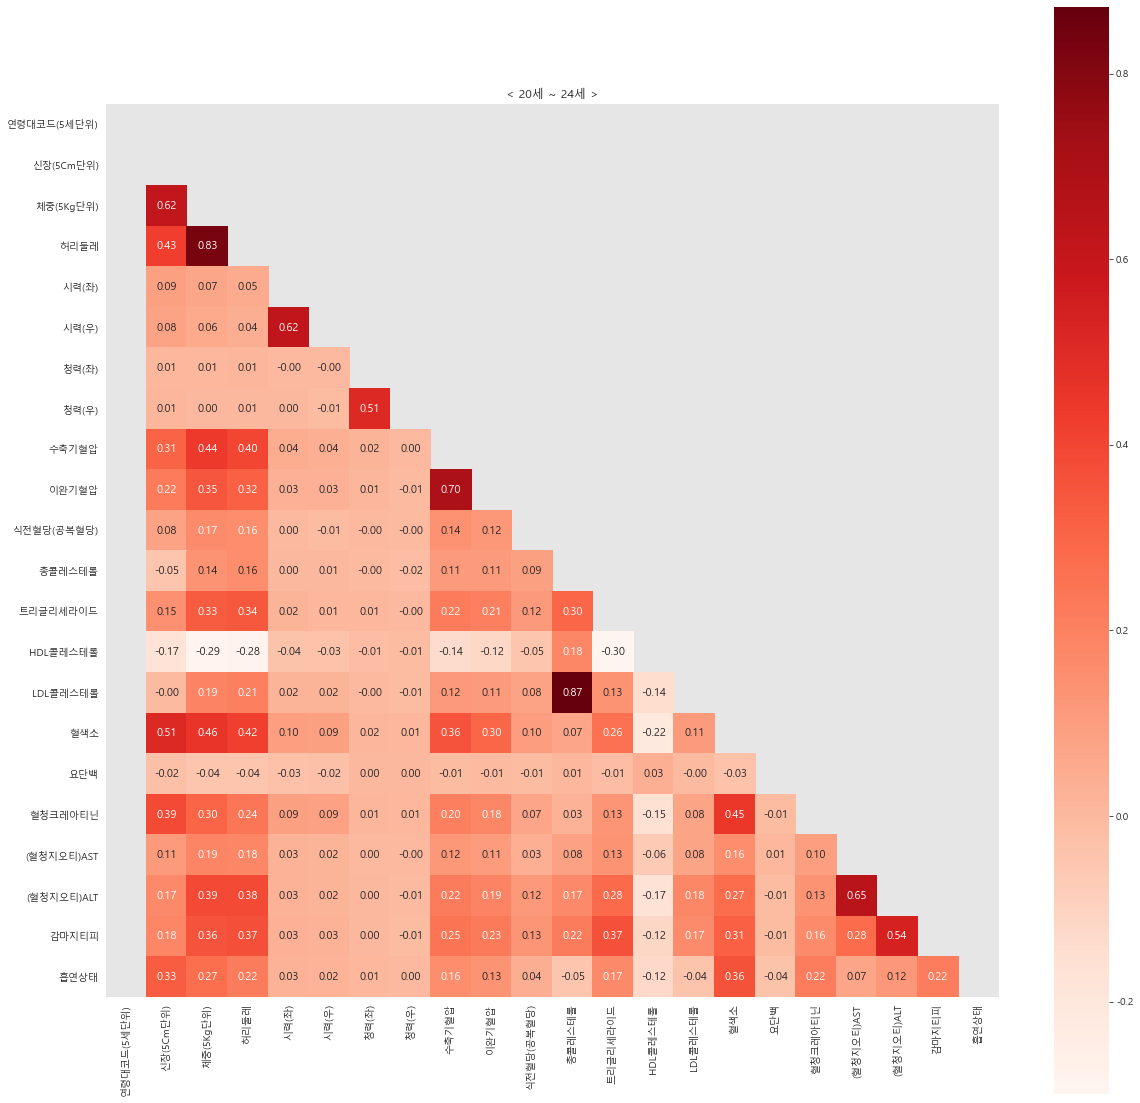

In [48]:
import numpy as np
plt.figure(figsize=(20,20), facecolor='white')
mask = np.zeros_like(corr_1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# plt.subplot(5,4,1)
sns.heatmap(corr_1, mask=mask, annot=True, annot_kws={'size':11}, fmt='.2f', cmap='Reds', square=True)
plt.title('< 20세 ~ 24세 >')
plt.show()

### 연령대 별 신장/체중 밀집도 시각화 (Jointplot)

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

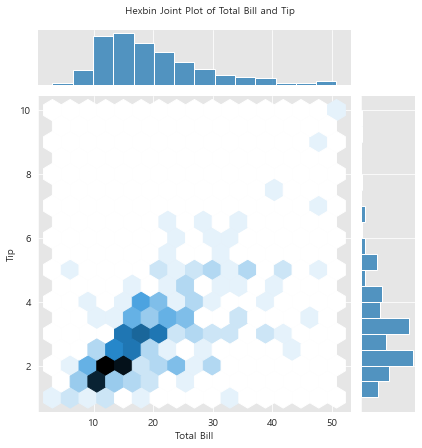

In [50]:
tips = sns.load_dataset('tips')

hexbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

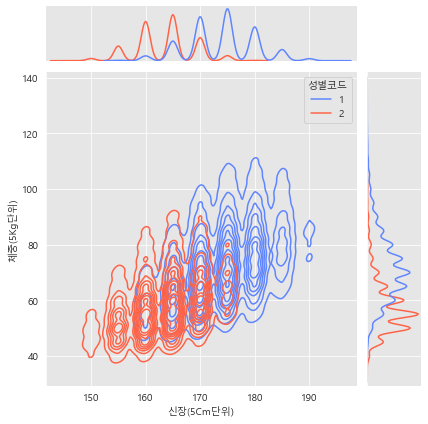

In [51]:
# plt.figure(figsize=(16,16), facecolor='white')

# sns.jointplot(x='신장(5Cm단위)', y='체중(5Kg단위)', data=age_5, kind='hex')
# sns.jointplot(data=age_5, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="성별코드")
g = sns.jointplot(data=age_5, x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', kind='kde',
                 palette={1:'#5f85ff', 2:'#ff6347'})

# g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
# g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)
# hexbin.set_axis_labels(xlabel='신장', ylabel='체중')
# hexbin.fig.subtitle('< 서울 >')

# plt.show()

In [17]:
sido_11 = med1.loc[med1['시도코드']=='서울특별시', :]
sido_11

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)   시도코드  신장(5Cm단위)  체중(5Kg단위)   허리둘레  \
5        2019        6     1            8  서울특별시      170.0      110.0  107.8   
100      2019      101     1           13  서울특별시      165.0       60.0   80.8   
102      2019      103     1            6  서울특별시      180.0       80.0   90.0   
110      2019      111     1           14  서울특별시      160.0       65.0   94.0   
112      2019      113     1            8  서울특별시      170.0       90.0   95.0   
...       ...      ...   ...          ...    ...        ...        ...    ...   
3999934  2015   999935     1            9  서울특별시      175.0       80.0   81.0   
3999937  2015   999938     1            6  서울특별시      180.0       60.0   73.0   
3999947  2015   999948     2           13  서울특별시      160.0       65.0   83.0   
3999967  2015   999968     1           11  서울특별시      165.0       55.0   74.0   
3999999  2015  1000000     1           11  서울특별시      160.0       65.0   84.0   

         시력(좌)  시력(우)  ...   혈색소  요단백  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마지티피  \
5          1.2    1.5  ...  14.8  1.0      0.9        42.0        44.0  129.0   
100        0.9    0.8  ...  15.0  1.0      0.9        10.0         7.0   20.0   
102        1.5    1.5  ...  15.9  1.0      1.1        24.0        20.0   50.0   
110        1.0    1.0  ...  15.5  1.0      0.9        29.0        44.0   48.0   
112        1.2    1.0  ...  16.8  1.0      1.2        33.0        47.0  104.0   
...        ...    ...  ...   ...  ...      ...         ...         ...    ...   
3999934    0.6    0.8  ...  12.7  1.0      1.1        28.0        26.0   21.0   
3999937    2.0    1.5  ...  13.5  1.0      0.9        29.0        24.0   15.0   
3999947    0.9    0.7  ...  14.3  1.0      0.7        19.0        14.0   15.0   
3999967    0.5    0.4  ...  16.0  1.0      0.7        34.0        26.0   58.0   
3999999    0.4    0.2  ...  15.4  1.0      1.0        29.0        37.0   33.0   

         흡연상태  음주여부  구강검진 수검여부    데이터 공개일자  
5         1.0     1          0    20191231  
100       2.0     1          1    20191231  
102       2.0     1          1    20191231  
110       1.0     1          0    20191231  
112       1.0     1          0    20191231  
...       ...   ...        ...         ...  
3999934   1.0     Y          N  2016-12-20  
3999937   1.0     N          N  2016-12-20  
3999947   1.0     Y          N  2016-12-20  
3999967   1.0     Y          N  2016-12-20  
3999999   2.0     Y          N  2016-12-20  

[255932 rows x 29 columns]

In [52]:
med1.value_counts(['연령대코드(5세단위)', '성별코드']).sort_index()
med1.groupby(['연령대코드(5세단위)', '성별코드'])['신장(5Cm단위)'].mean()

연령대코드(5세단위)  성별코드
5            1       173.902432
             2       163.421315
6            1       174.888865
             2       163.678639
7            1       175.370587
                        ...    
16           2       151.525598
17           1       163.735626
             2       149.795882
18           1       163.281902
             2       148.182475
Name: 신장(5Cm단위), Length: 28, dtype: float64

### 연령별 평균 수치 세부 분석

In [54]:
age_5_mean = age_5.iloc[:, 3:].mean()
age_6_mean = age_6.iloc[:, 3:].mean()
age_7_mean = age_7.iloc[:, 3:].mean()
age_8_mean = age_8.iloc[:, 3:].mean()
age_9_mean = age_9.iloc[:, 3:].mean()
age_10_mean = age_10.iloc[:, 3:].mean()
age_11_mean = age_11.iloc[:, 3:].mean()
age_12_mean = age_12.iloc[:, 3:].mean()
age_13_mean = age_13.iloc[:, 3:].mean()
age_14_mean = age_14.iloc[:, 3:].mean()
age_15_mean = age_15.iloc[:, 3:].mean()
age_16_mean = age_16.iloc[:, 3:].mean()
age_17_mean = age_17.iloc[:, 3:].mean()
age_18_mean = age_18.iloc[:, 3:].mean()

In [55]:
age_5_mean_1 = age_5_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_6_mean_1 = age_6_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_7_mean_1 = age_7_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_8_mean_1 = age_8_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_9_mean_1 = age_9_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_10_mean_1 = age_10_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_11_mean_1 = age_11_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_12_mean_1 = age_12_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_13_mean_1 = age_13_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_14_mean_1 = age_14_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_15_mean_1 = age_15_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_16_mean_1 = age_16_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_17_mean_1 = age_17_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_18_mean_1 = age_18_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])

In [56]:
age_20_m_mean = age_20_m.iloc[:, 3:].mean()
age_30_m_mean = age_30_m.iloc[:, 3:].mean()
age_40_m_mean = age_40_m.iloc[:, 3:].mean()
age_50_m_mean = age_50_m.iloc[:, 3:].mean()
age_60_m_mean = age_60_m.iloc[:, 3:].mean()
age_70_m_mean = age_70_m.iloc[:, 3:].mean()
age_80_m_mean = age_80_m.iloc[:, 3:].mean()

age_20_m_mean = age_20_m_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌', '흡연상태'])
age_30_m_mean = age_30_m_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌', '흡연상태'])
age_40_m_mean = age_40_m_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌', '흡연상태'])
age_50_m_mean = age_50_m_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌', '흡연상태'])
age_60_m_mean = age_60_m_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌', '흡연상태'])
age_70_m_mean = age_70_m_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌', '흡연상태'])
age_80_m_mean = age_80_m_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌', '흡연상태'])

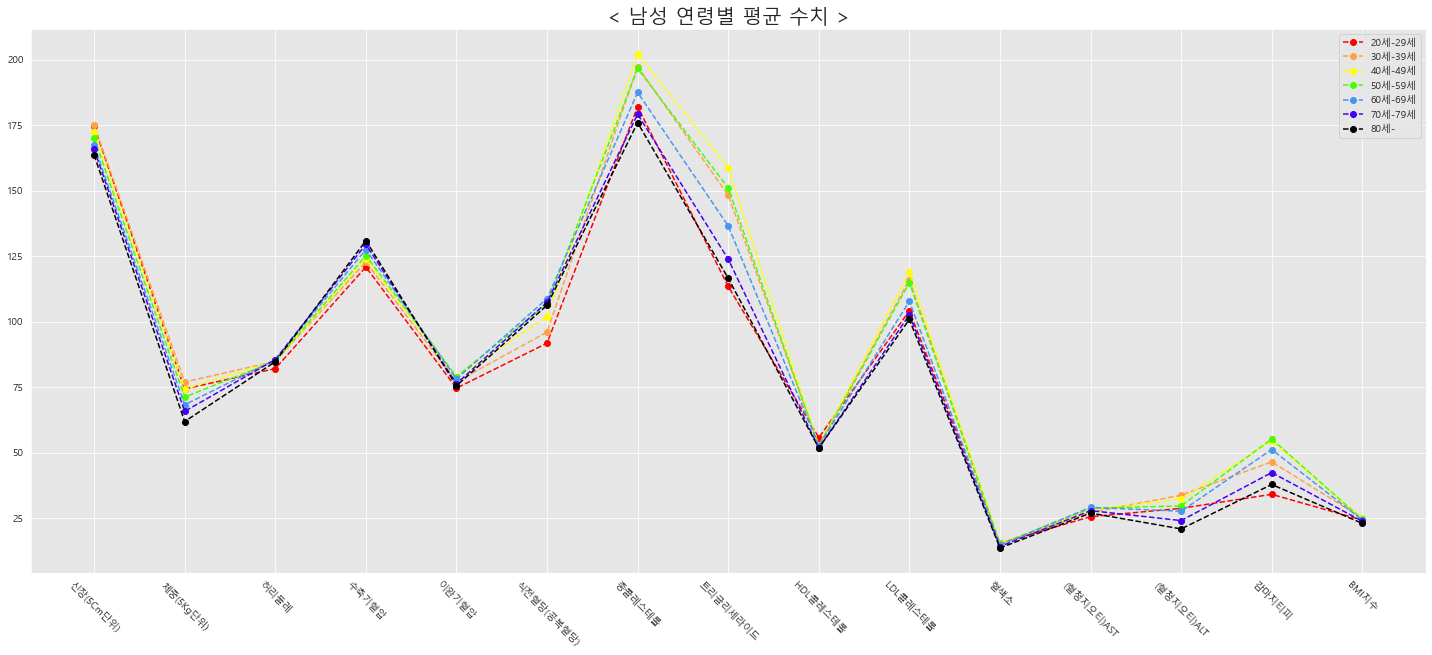

In [57]:
fig = plt.figure(figsize=(25, 10), facecolor='white')

plt.plot(age_20_m_mean, 'o--',color='#ff0000',label='20세-29세')
plt.plot(age_30_m_mean, 'o--',color='#ffa247',label='30세-39세')
plt.plot(age_40_m_mean, 'o--',color='#ffff00',label='40세-49세')
plt.plot(age_50_m_mean, 'o--',color='#47ff00',label='50세-59세')
plt.plot(age_60_m_mean, 'o--',color='#4796f1',label='60세-69세')
plt.plot(age_70_m_mean, 'o--',color='#4300f1',label='70세-79세')
plt.plot(age_80_m_mean, 'o--',color='#000000',label='80세-')

plt.xticks(rotation = - 45 )

plt.grid(True)
plt.title('< 남성 연령별 평균 수치 >',size=20)
plt.legend()

In [20]:
age_20 = pd.merge(age_5,age_6,how = 'outer')
age_30 = pd.merge(age_7,age_8,how = 'outer')
age_40 = pd.merge(age_9,age_10,how = 'outer')
age_50 = pd.merge(age_11,age_12,how = 'outer')
age_60 = pd.merge(age_13,age_14,how = 'outer')
age_70 = pd.merge(age_15,age_16,how = 'outer')
age_80 = pd.merge(age_17,age_18,how = 'outer')

In [21]:
male_8 =med1[med1['시력(좌)'] != 9.9].groupby('연령대코드(5세단위)')[['시력(좌)']].mean()
female_8 = med1[med1['시력(좌)'] != 9.9].groupby('연령대코드(5세단위)')[['시력(좌)']].mean()
male_9 = med1[med1['시력(우)'] != 9.9].groupby('연령대코드(5세단위)')[['시력(우)']].mean()
female_9 = med1[med1['시력(우)'] != 9.9].groupby('연령대코드(5세단위)')[['시력(우)']].mean()
male_10 = med1[med1['성별코드']==1].groupby('연령대코드(5세단위)')[['청력(좌)']].mean()
female_10 = med1[med1['성별코드']==2].groupby('연령대코드(5세단위)')[['청력(좌)']].mean()
male_11 = med1[med1['성별코드']==1].groupby('연령대코드(5세단위)')[['청력(우)']].mean()
female_11 =med1[med1['성별코드']==2].groupby('연령대코드(5세단위)')[['청력(우)']].mean()

#### 연령대 별 신장, 체중 평균 시각화 (plot)

In [58]:
male_heights = med_total_1[med_total_1['성별코드']==1].groupby('연령대코드(5세단위)')[['신장(5Cm단위)']].mean()
female_heights = med_total_1[med_total_1['성별코드']==2].groupby('연령대코드(5세단위)')[['신장(5Cm단위)']].mean()

male_weights = med_total_1[med_total_1['성별코드']==1].groupby('연령대코드(5세단위)')[['체중(5Kg단위)']].mean()
female_weights = med_total_1[med_total_1['성별코드']==2].groupby('연령대코드(5세단위)')[['체중(5Kg단위)']].mean()

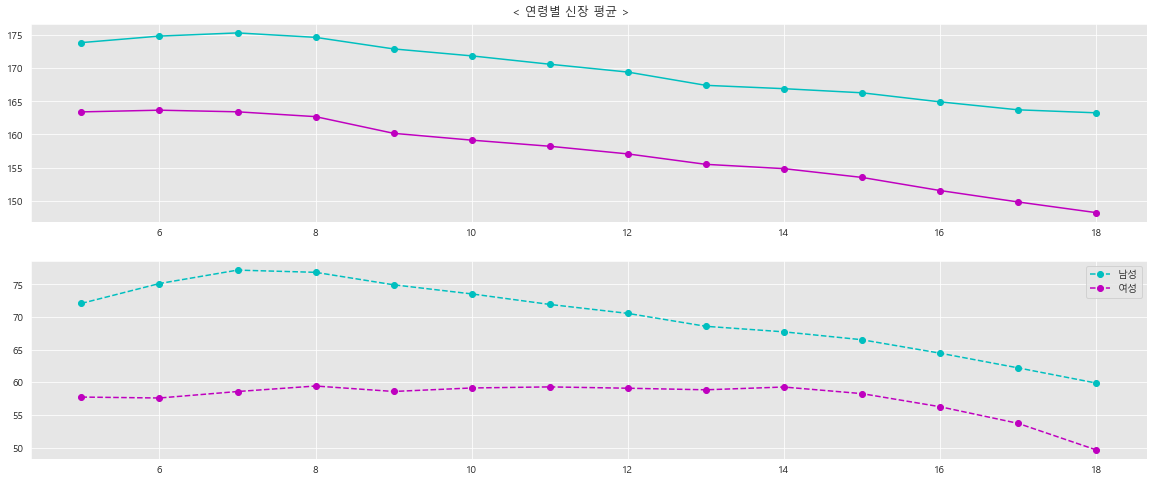

In [59]:
plt.figure(figsize=(20, 8), facecolor='white')

plt.subplot(2,1,1)
plt.plot(male_heights, 'co-', label='남성')
plt.plot(female_heights, 'mo-', label='여성')

plt.subplot(2,1,2)
plt.plot(male_weights, 'co--', label='남성')
plt.plot(female_weights, 'mo--', label='여성')

# plt.xticks(rotation = - 45 )

plt.grid(True)
plt.suptitle('< 연령별 신장 평균 >', x=0.5, y=0.91)
plt.legend()

### 연령대 별 혈압 평균 시각화 (plot)

In [60]:
male_3 = med_total_1[med_total_1['성별코드']==1].groupby('연령대코드(5세단위)')[['수축기혈압']].mean()
female_3 = med_total_1[med_total_1['성별코드']==2].groupby('연령대코드(5세단위)')[['수축기혈압']].mean()

male_4 = med_total_1[med_total_1['성별코드']==1].groupby('연령대코드(5세단위)')[['이완기혈압']].mean()
female_4 = med_total_1[med_total_1['성별코드']==2].groupby('연령대코드(5세단위)')[['이완기혈압']].mean()

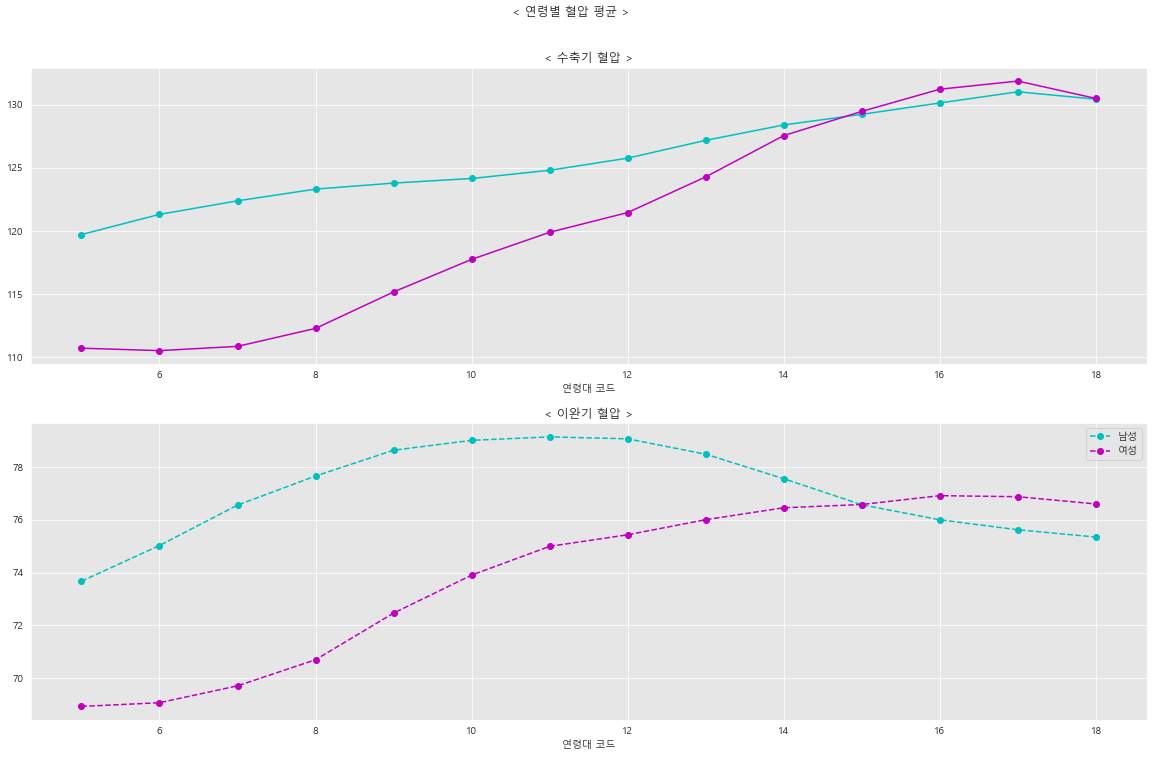

In [61]:
plt.figure(figsize=(20, 12), facecolor='white')

plt.subplot(2,1,1)
plt.plot(male_3, 'co-', label='남성')
plt.plot(female_3, 'mo-', label='여성')
plt.xlabel('연령대 코드')
plt.title('< 수축기 혈압 >')

plt.subplot(2,1,2)
plt.plot(male_4, 'co--', label='남성')
plt.plot(female_4, 'mo--', label='여성')
plt.xlabel('연령대 코드')
plt.title('< 이완기 혈압 >')

# plt.xticks(rotation = - 45 )

plt.grid(True)
plt.suptitle('< 연령별 혈압 평균 >', x=0.5, y=0.95)
plt.legend()

#### 연령대 별 콜레스테롤 평균 시각화 (plot)

In [62]:
## HDL : 나쁜 콜레스테롤을 없애는 역할 , LDL : 콜레스테롤을 쌓이게 하는 역할
male_5 = med_total_1[med_total_1['성별코드']==1].groupby('연령대코드(5세단위)')[['총콜레스테롤']].mean()
female_5 = med_total_1[med_total_1['성별코드']==2].groupby('연령대코드(5세단위)')[['총콜레스테롤']].mean()

male_6 = med_total_1[med_total_1['성별코드']==1].groupby('연령대코드(5세단위)')[['HDL콜레스테롤']].mean()
female_6 = med_total_1[med_total_1['성별코드']==2].groupby('연령대코드(5세단위)')[['HDL콜레스테롤']].mean()

male_7 = med_total_1[med_total_1['성별코드']==1].groupby('연령대코드(5세단위)')[['LDL콜레스테롤']].mean()
female_7 = med_total_1[med_total_1['성별코드']==2].groupby('연령대코드(5세단위)')[['LDL콜레스테롤']].mean()

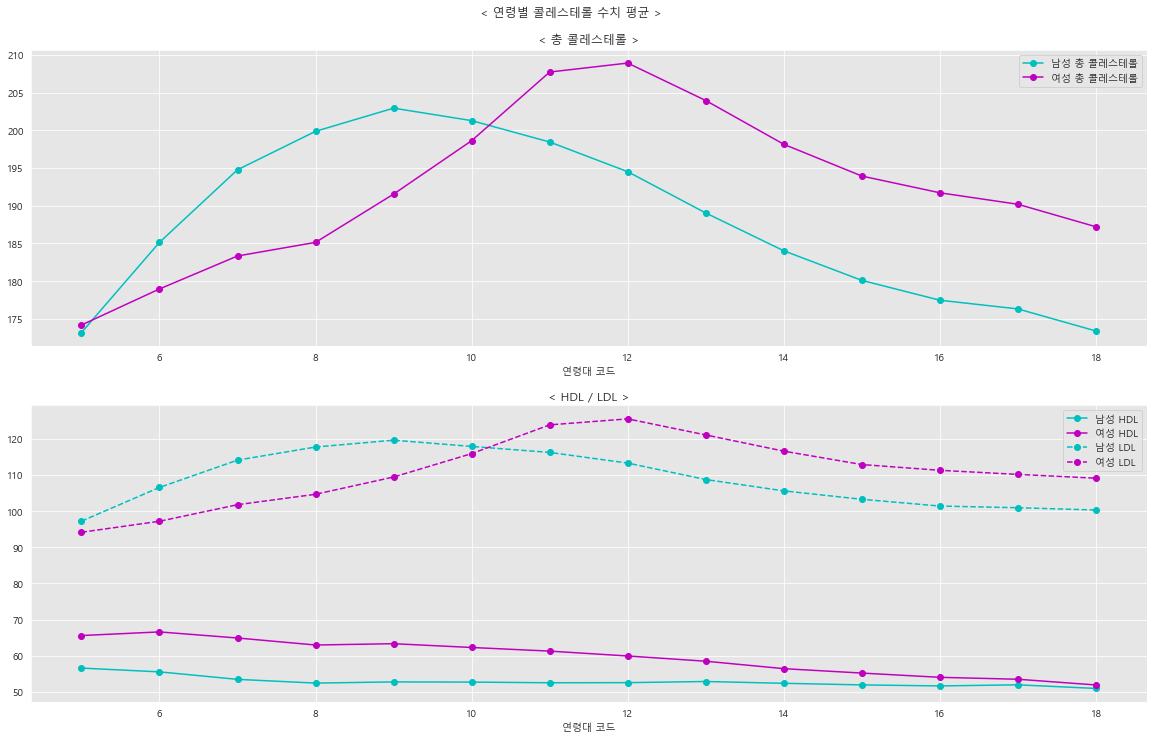

In [63]:
plt.figure(figsize=(20, 12), facecolor='white')

plt.subplot(2,1,1)
plt.plot(male_5, 'co-', label='남성 총 콜레스테롤')
plt.plot(female_5, 'mo-', label='여성 총 콜레스테롤')
plt.xlabel('연령대 코드')
plt.title('< 총 콜레스테롤 >')
plt.legend()

plt.subplot(2,1,2)
plt.plot(male_6, 'co-', label='남성 HDL')
plt.plot(female_6, 'mo-', label='여성 HDL')
plt.plot(male_7, 'co--', label='남성 LDL')
plt.plot(female_7, 'mo--', label='여성 LDL')
plt.xlabel('연령대 코드')
plt.title('< HDL / LDL >')

# plt.xticks(rotation = - 45 )

plt.grid(True)
plt.suptitle('< 연령별 콜레스테롤 수치 평균 >', x=0.5, y=0.93)
plt.legend()
plt.show()


### 연령별 시력과 청력 비교

In [64]:
pd.set_option('display.max_rows', 20)

med_total_2 = med_total_4[med_total_4['성별코드']==1]
med_total_3 = med_total_4[med_total_4['성별코드']==2]

print(med_total_2[med_total_2['시력(우)'] == 9.9]['연령대코드(5세단위)'].value_counts().sort_index())
print(med_total_3[med_total_3['시력(우)'] == 9.9]['연령대코드(5세단위)'].value_counts().sort_index())

20~24세     12
25~29세     24
30~34세     45
35~39세     76
40~44세    184
45~49세    177
50~54세    283
55~59세    279
60~64세    409
65~69세    276
70~74세    337
75~79세    215
80~84세    178
85세+       31
Name: 연령대코드(5세단위), dtype: int64
20~24세      4
25~29세     10
30~34세     21
35~39세     20
40~44세    118
45~49세    105
50~54세    174
55~59세    198
60~64세    252
65~69세    204
70~74세    256
75~79세    180
80~84세    157
85세+       63
Name: 연령대코드(5세단위), dtype: int64


In [65]:
male_10 = med_total_1[med_total_1['성별코드']==1].groupby('연령대코드(5세단위)')[['시력(좌)']].mean()
female_10 = med_total_1[med_total_1['성별코드']==2].groupby('연령대코드(5세단위)')[['시력(좌)']].mean()

male_11 = med_total_1[med_total_1['성별코드']==1].groupby('연령대코드(5세단위)')[['시력(우)']].mean()
female_11 = med_total_1[med_total_1['성별코드']==2].groupby('연령대코드(5세단위)')[['시력(우)']].mean()

male_8 = med_total_2[med_total_2['시력(좌)'] != 9.9].groupby('연령대코드(5세단위)')[['시력(좌)']].mean()
female_8 = med_total_3[med_total_3['시력(좌)'] != 9.9].groupby('연령대코드(5세단위)')[['시력(좌)']].mean()

male_9 = med_total_2[med_total_2['시력(우)'] != 9.9].groupby('연령대코드(5세단위)')[['시력(우)']].mean()
female_9 = med_total_3[med_total_3['시력(우)'] != 9.9].groupby('연령대코드(5세단위)')[['시력(우)']].mean()

# male_10 = med_total_1[med_total_1['성별코드']==1].groupby('연령대코드(5세단위)')[['청력(좌)']].mean()
# female_10 = med_total_1[med_total_1['성별코드']==2].groupby('연령대코드(5세단위)')[['청력(좌)']].mean()

# male_11 = med_total_1[med_total_1['성별코드']==1].groupby('연령대코드(5세단위)')[['청력(우)']].mean()
# female_11 = med_total_1[med_total_1['성별코드']==2].groupby('연령대코드(5세단위)')[['청력(우)']].mean()

<function matplotlib.pyplot.show(close=None, block=None)>

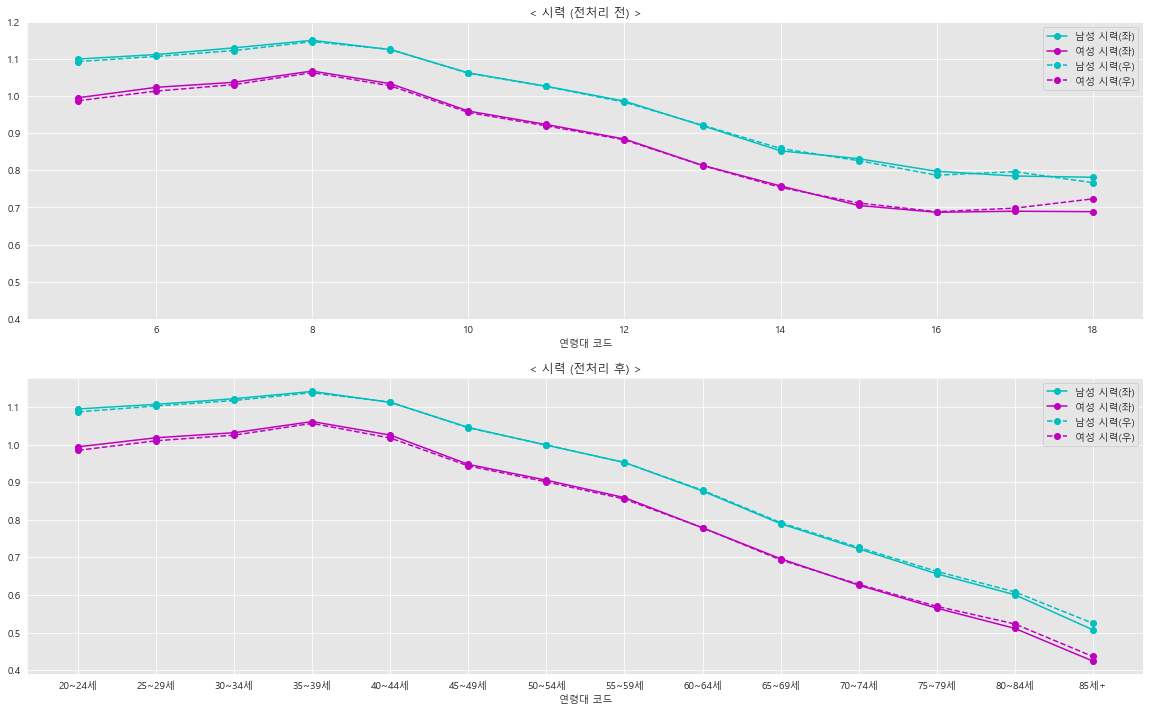

In [66]:
plt.figure(figsize=(20, 12), facecolor='white')

plt.subplot(2,1,1)
plt.plot(male_10, 'co-', label='남성 시력(좌)')
plt.plot(female_10, 'mo-', label='여성 시력(좌)')
plt.plot(male_11, 'co--', label='남성 시력(우)')
plt.plot(female_11, 'mo--', label='여성 시력(우)')
plt.ylim([0.4, 1.2])
plt.xlabel('연령대 코드')
plt.title('< 시력 (전처리 전) >')
plt.legend()

plt.subplot(2,1,2)
plt.plot(male_8, 'co-', label='남성 시력(좌)')
plt.plot(female_8, 'mo-', label='여성 시력(좌)')
plt.plot(male_9, 'co--', label='남성 시력(우)')
plt.plot(female_9, 'mo--', label='여성 시력(우)')
plt.xlabel('연령대 코드')
plt.title('< 시력 (전처리 후) >')

plt.grid(True)
plt.legend()
plt.show

In [26]:
age_20_2=age_20.loc[:, ['청력(좌)','청력(우)']]
age_30_2=age_30.loc[:, ['청력(좌)','청력(우)']]
age_40_2=age_40.loc[:, ['청력(좌)','청력(우)']]
age_50_2=age_50.loc[:, ['청력(좌)','청력(우)']]
age_60_2=age_60.loc[:, ['청력(좌)','청력(우)']]
age_70_2=age_70.loc[:, ['청력(좌)','청력(우)']]
age_80_2=age_80.loc[:, ['청력(좌)','청력(우)']]

In [27]:
age_20_2_mean=age_20_2.mean()
age_30_2_mean=age_30_2.mean()
age_40_2_mean=age_40_2.mean()
age_50_2_mean=age_50_2.mean()
age_60_2_mean=age_60_2.mean()
age_70_2_mean=age_70_2.mean()
age_80_2_mean=age_80_2.mean()

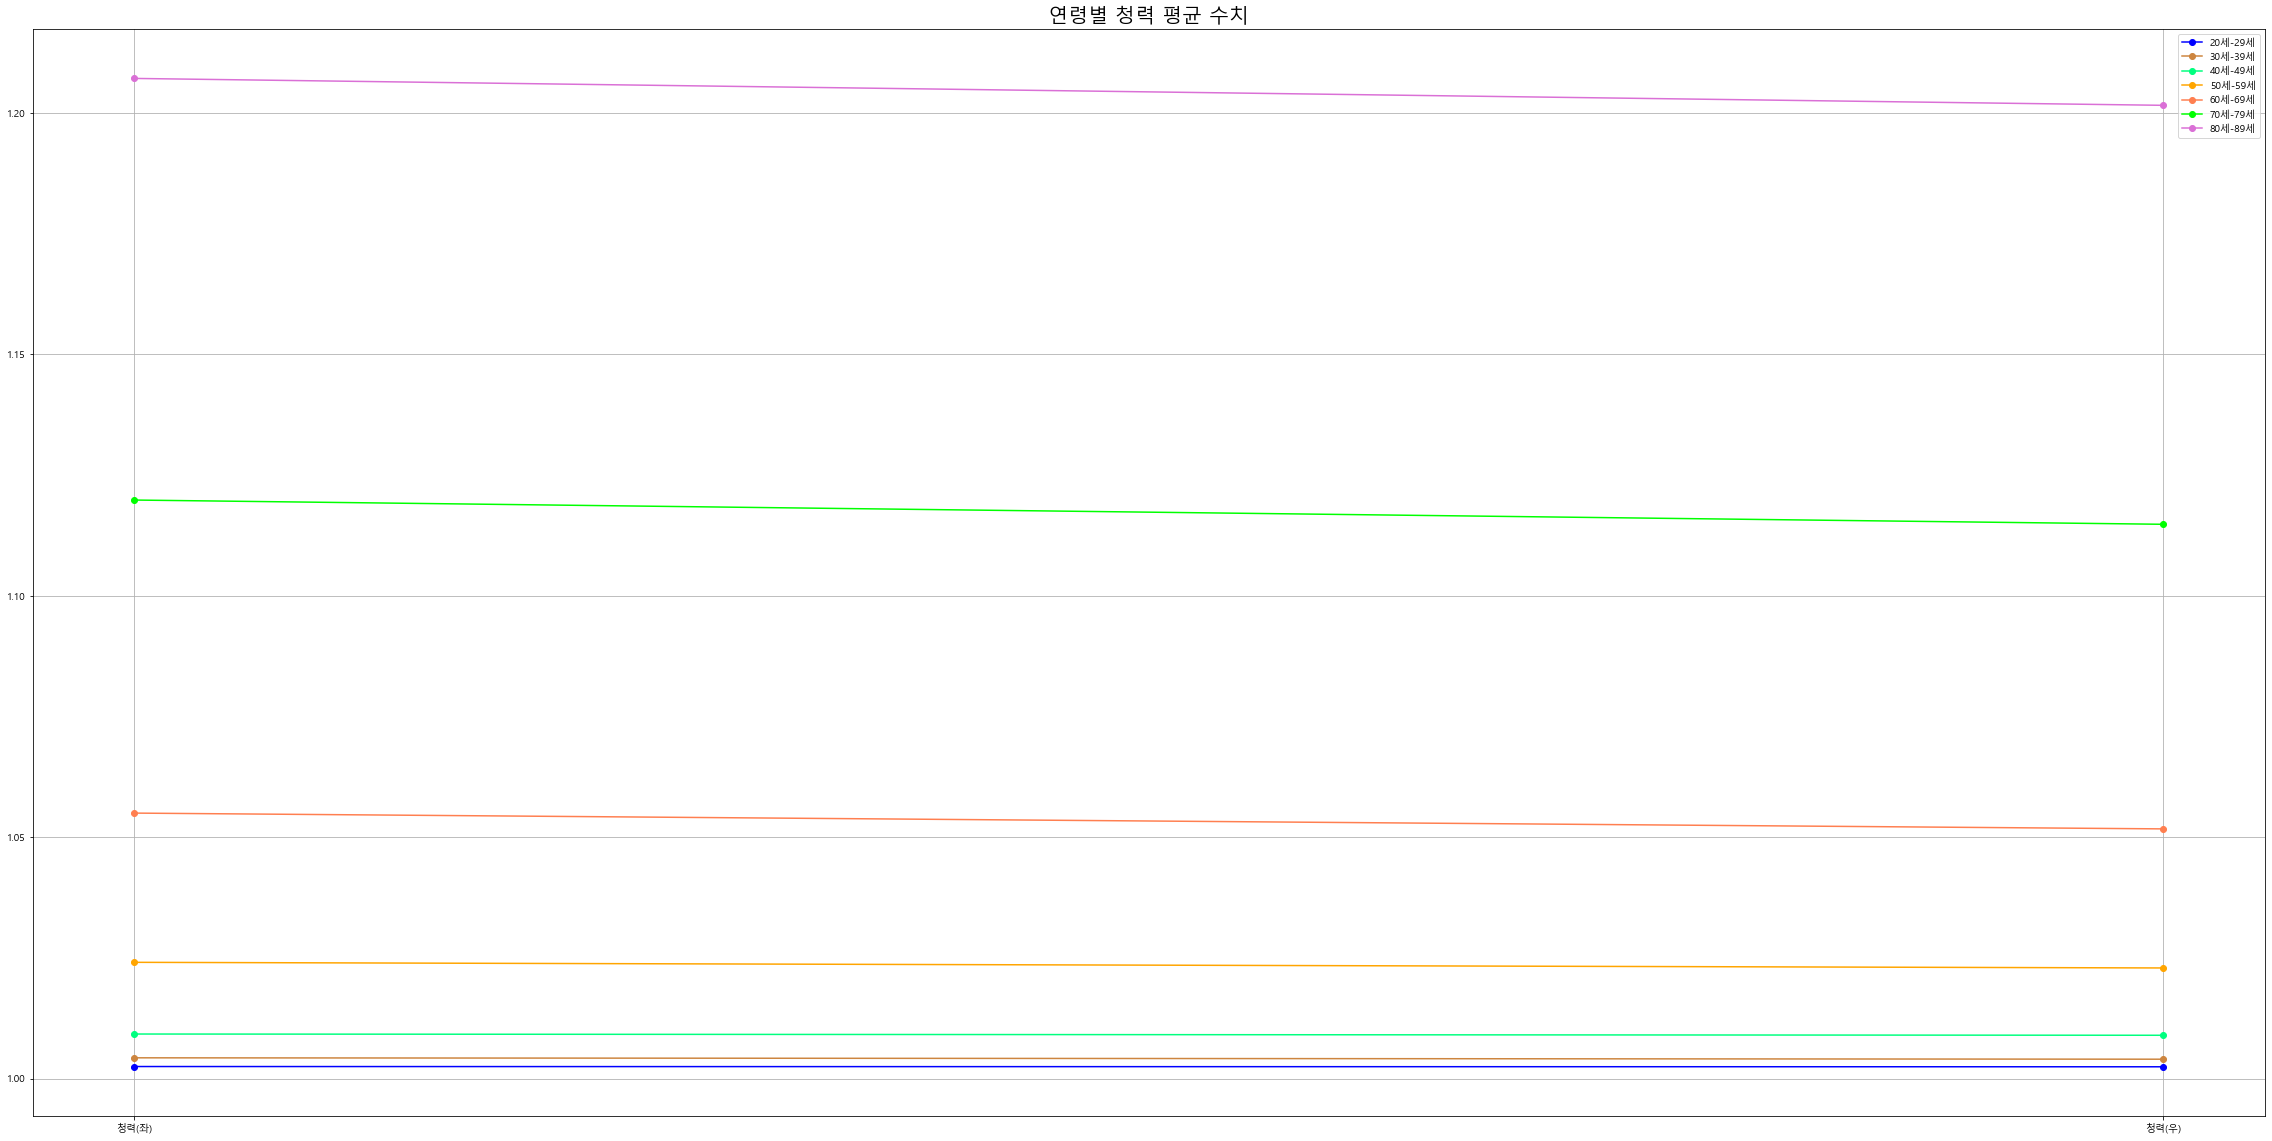

In [28]:
fig = plt.figure(figsize=(40, 20), facecolor='white')
plt.plot(age_20_2_mean, 'go-',color='b',label='20세-29세')
plt.plot(age_30_2_mean, 'go-',color='peru',label='30세-39세')
plt.plot(age_40_2_mean, 'go-',color='springgreen',label='40세-49세')
plt.plot(age_50_2_mean, 'go-',color='orange',label='50세-59세')
plt.plot(age_60_2_mean, 'go-',color='coral',label='60세-69세')
plt.plot(age_70_2_mean, 'go-',color='lime',label='70세-79세')
plt.plot(age_80_2_mean, 'go-',color='orchid',label='80세-89세')
plt.grid(True)
plt.title('연령별 청력 평균 수치',size=20)
plt.legend()

### 연령별 변수들간의 수치 비교

In [29]:
age_20=age_20.loc[:, ['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
age_30=age_30.loc[:, ['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
age_40=age_40.loc[:, ['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
age_50=age_50.loc[:, ['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
age_60=age_60.loc[:, ['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
age_70=age_70.loc[:, ['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
age_80=age_80.loc[:, [ '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]

In [30]:
age_20_mean=age_20.mean()
age_30_mean=age_30.mean()
age_40_mean=age_40.mean()
age_50_mean=age_50.mean()
age_60_mean=age_60.mean()
age_70_mean=age_70.mean()
age_80_mean=age_80.mean()

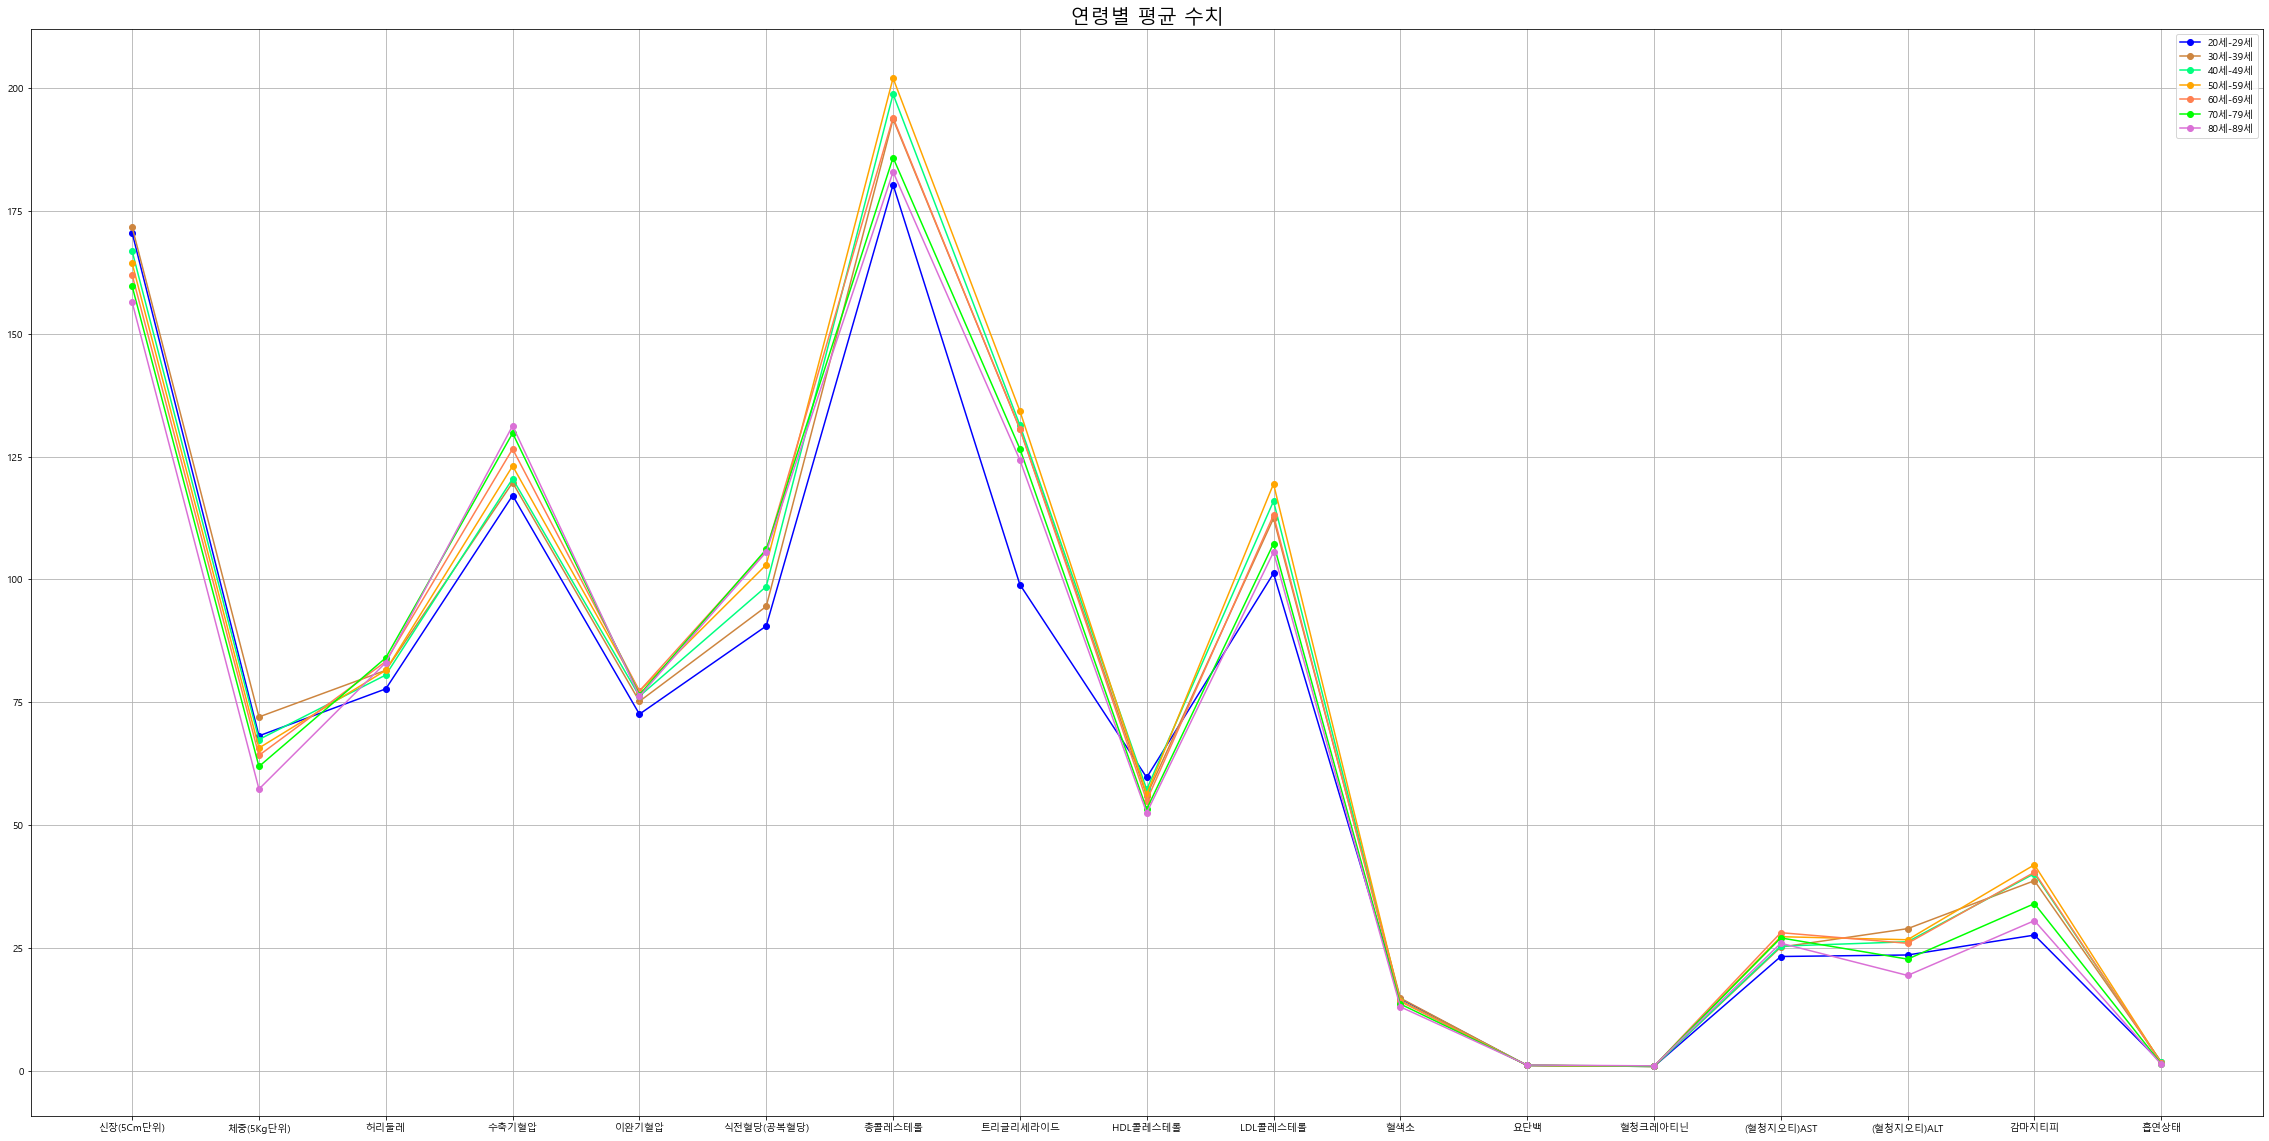

In [31]:
fig = plt.figure(figsize=(40, 20), facecolor='white')
plt.plot(age_20_mean, 'go-',color='b',label='20세-29세')
plt.plot(age_30_mean, 'go-',color='peru',label='30세-39세')
plt.plot(age_40_mean, 'go-',color='springgreen',label='40세-49세')
plt.plot(age_50_mean, 'go-',color='orange',label='50세-59세')
plt.plot(age_60_mean, 'go-',color='coral',label='60세-69세')
plt.plot(age_70_mean, 'go-',color='lime',label='70세-79세')
plt.plot(age_80_mean, 'go-',color='orchid',label='80세-89세')
plt.grid(True)
plt.title('연령별 평균 수치',size=20)
plt.legend()

In [32]:

sel=sel.loc[:, ['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
pus=pus.loc[:, ['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
tae=tae.loc[:, ['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
icn=icn.loc[:, ['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
kwj=kwj.loc[:, [ '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
tjn=tjn.loc[:, ['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
usn=usn.loc[:, ['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
sjs=sjs.loc[:, ['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
ggd=ggd.loc[:, ['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
gwd=gwd.loc[:, ['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
ccb=ccb.loc[:, ['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
ccn=ccn.loc[:, ['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
jlb=jlb.loc[:, [ '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
jln=jln.loc[:, [ '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
gsb=gsb.loc[:, ['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
gsn=gsn.loc[:, [ '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
cju=cju.loc[:, [ '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]

In [33]:
sel_mean=sel.mean()
pus_mean=pus.mean()
tae_mean=tae.mean()
icn_mean=icn.mean()
kwj_mean=kwj.mean()
tjn_mean=tjn.mean()
usn_mean=usn.mean()
sjs_mean=sjs.mean()
ggd_mean=ggd.mean()
gwd_mean=gwd.mean()
ccb_mean=ccb.mean()
ccn_mean=ccn.mean()
jlb_mean=jlb.mean()
jln_mean=jln.mean()
gsn_mean=gsn.mean()
cju_mean=cju.mean()

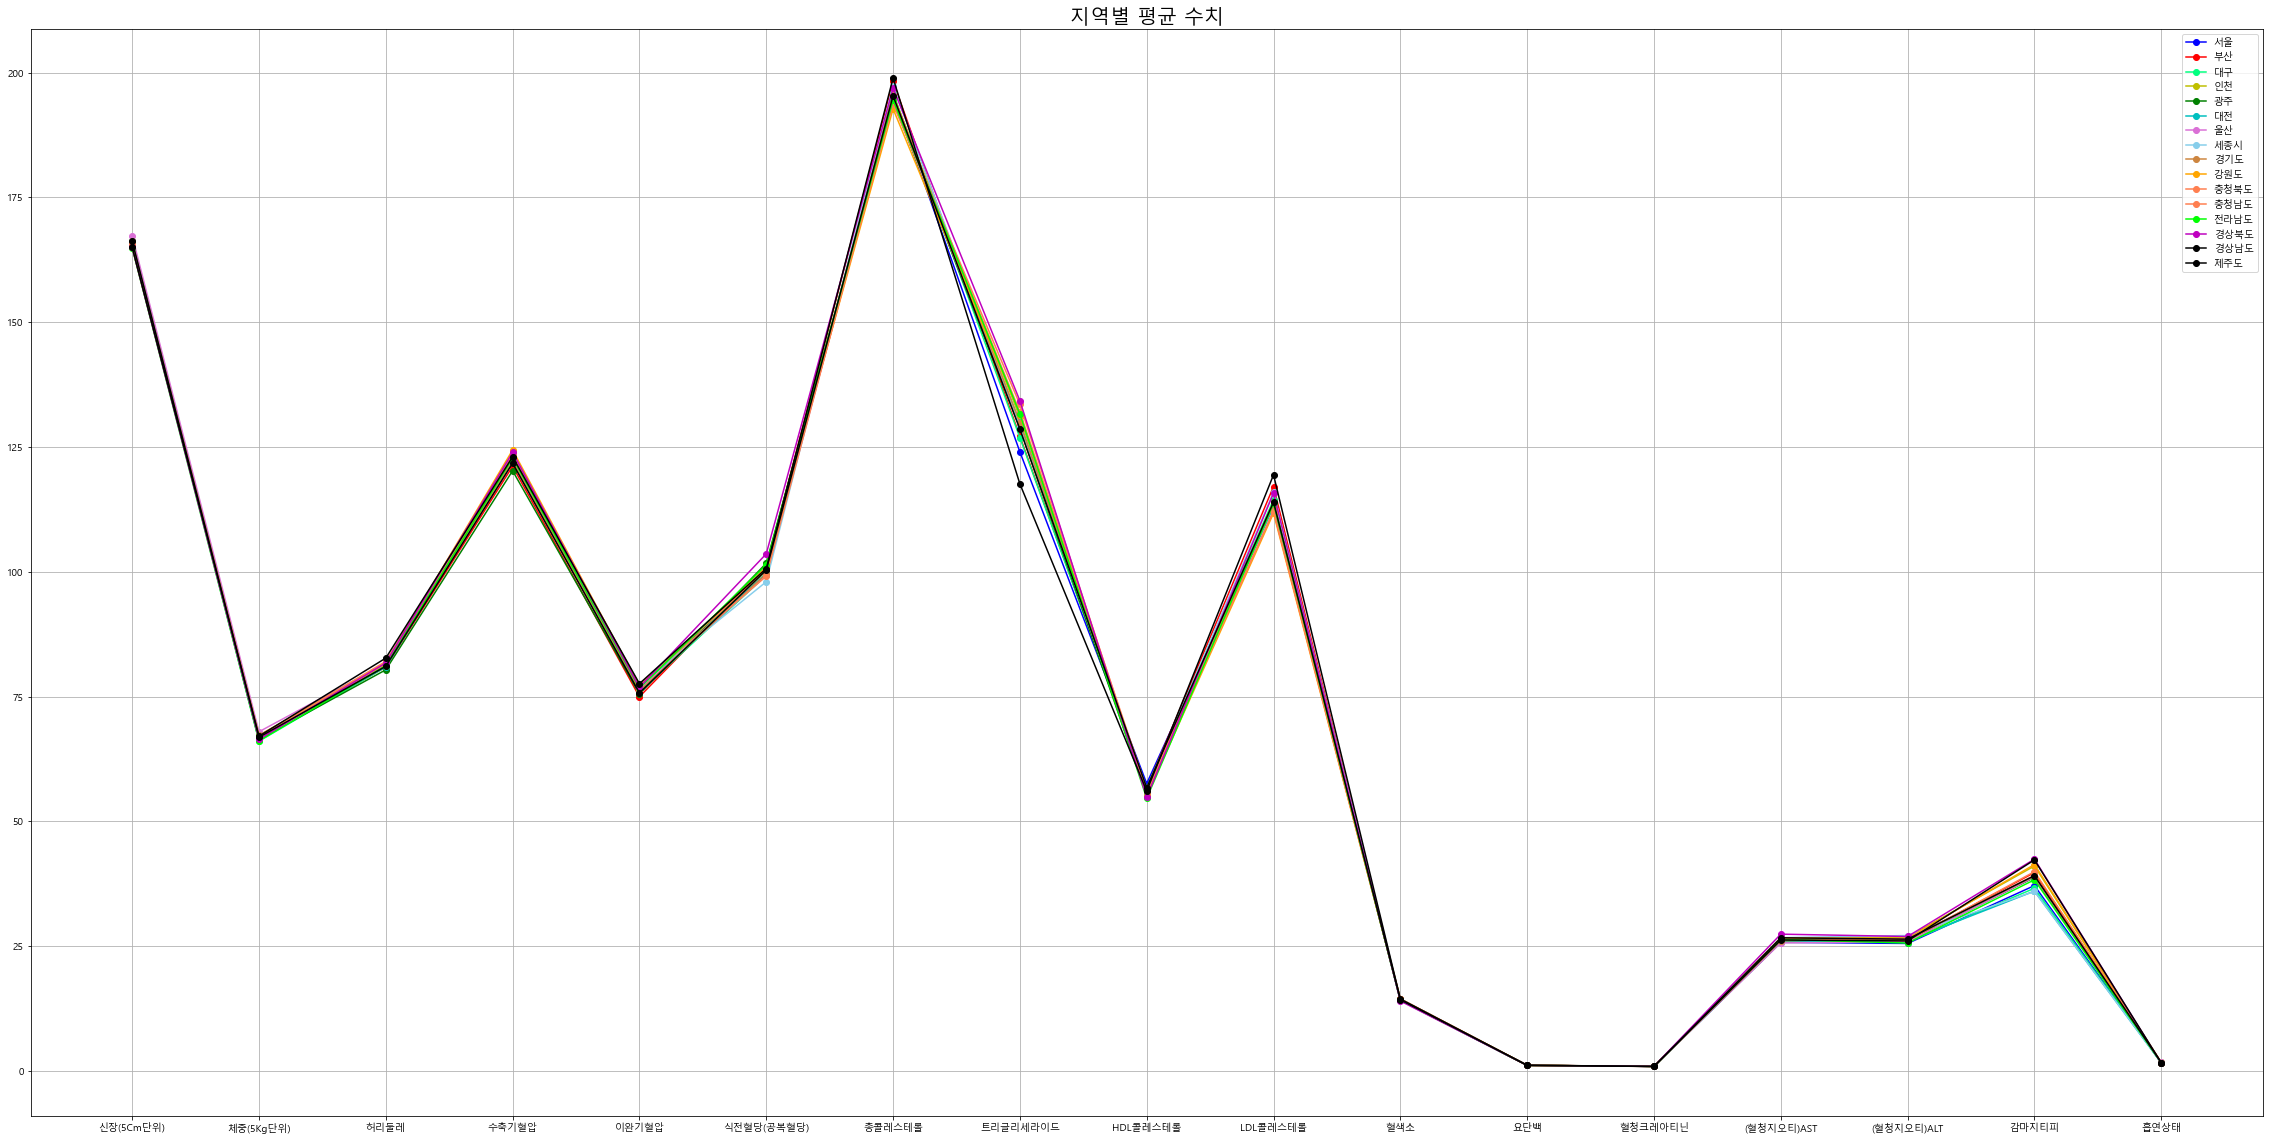

In [34]:
fig = plt.figure(figsize=(40, 20), facecolor='white')
plt.plot(sel_mean, 'go-',color='b',label='서울')
plt.plot(pus_mean, 'go-',color='r',label='부산')
plt.plot(tae_mean, 'go-',color='springgreen',label='대구')
plt.plot(icn_mean, 'go-',color='y',label='인천')
plt.plot(kwj_mean, 'go-',color='g',label='광주')
plt.plot(tjn_mean, 'go-',color='c',label='대전')
plt.plot(usn_mean, 'go-',color='orchid',label='울산')
plt.plot(sjs_mean, 'go-',color='skyblue',label='세종시')
plt.plot(ggd_mean, 'go-',color='peru',label='경기도')
plt.plot(gwd_mean, 'go-',color='orange',label='강원도')
plt.plot(ccb_mean, 'go-',color='coral',label='충청북도')
plt.plot(ccn_mean, 'go-',color='coral',label='충청남도')
plt.plot(jlb_mean, 'go-',color='lime',label='전라남도')
plt.plot(jln_mean, 'go-',color='m',label='경상북도')
plt.plot(gsn_mean, 'go-',color='k',label='경상남도')
plt.plot(cju_mean, 'go-',color='k',label='제주도')
plt.grid(True)
plt.title('지역별 평균 수치',size=20)
plt.legend()

In [35]:
weight_top2000 = med1.sort_values(by='체중(5Kg단위)', ascending=False).head(2000)
weight_low2000 = med1.sort_values(by='체중(5Kg단위)', ascending=False).tail(2000)

### 몸무게 높은 사람들의 변수들간 상관관계

In [36]:
corr_1 = weight_top2000.loc[:, ['연령대코드(5세단위)',
                      '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '시력(좌)','시력(우)','청력(좌)','청력(우)',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']].corr(method='pearson')
corr_1

연령대코드(5세단위)  신장(5Cm단위)  체중(5Kg단위)      허리둘레     시력(좌)     시력(우)  \
연령대코드(5세단위)     1.000000  -0.089088  -0.124572  0.101647  0.014889  0.030248   
신장(5Cm단위)      -0.089088   1.000000   0.103636 -0.288900  0.001594  0.047621   
체중(5Kg단위)      -0.124572   0.103636   1.000000  0.372503 -0.010562 -0.002357   
허리둘레            0.101647  -0.288900   0.372503  1.000000 -0.025072 -0.022361   
시력(좌)           0.014889   0.001594  -0.010562 -0.025072  1.000000  0.390706   
시력(우)           0.030248   0.047621  -0.002357 -0.022361  0.390706  1.000000   
청력(좌)           0.089080  -0.010464  -0.026632 -0.000258 -0.010880  0.141742   
청력(우)           0.082537   0.020906   0.032821  0.019146 -0.020197  0.132346   
수축기혈압          -0.013457  -0.054282   0.053922  0.030387 -0.007965 -0.005282   
이완기혈압           0.025744  -0.072088   0.062166  0.050402  0.003632  0.009809   
식전혈당(공복혈당)      0.137156  -0.063527   0.012863  0.090594 -0.010356 -0.021692   
총콜레스테롤         -0.032030   0.020179   0.012928 -0.016361  0.028319  0.035370   
트리글리세라이드        0.038374   0.082344  -0.007613 -0.049707  0.009343  0.067727   
HDL콜레스테롤       -0.025988  -0.051805   0.000716  0.023086  0.014872 -0.006949   
LDL콜레스테롤       -0.057718   0.007378   0.032215  0.001656  0.017060  0.024397   
혈색소            -0.082054   0.071038   0.035315  0.039342  0.009078  0.003875   
요단백             0.042197  -0.036366   0.016628  0.047463 -0.033240 -0.026810   
혈청크레아티닌         0.035468   0.137070   0.020711 -0.085166  0.059339  0.034639   
(혈청지오티)AST     -0.025421  -0.077569   0.037346  0.072479  0.011963 -0.016136   
(혈청지오티)ALT     -0.116162  -0.089818   0.044006  0.058533  0.017721 -0.012330   
감마지티피           0.001511  -0.041227   0.000123  0.034505  0.022998  0.008369   
흡연상태           -0.007647   0.113891   0.006544 -0.040759 -0.020590 -0.005374   

                청력(좌)     청력(우)     수축기혈압     이완기혈압  ...  트리글리세라이드  HDL콜레스테롤  \
연령대코드(5세단위)  0.089080  0.082537 -0.013457  0.025744  ...  0.038374 -0.025988   
신장(5Cm단위)   -0.010464  0.020906 -0.054282 -0.072088  ...  0.082344 -0.051805   
체중(5Kg단위)   -0.026632  0.032821  0.053922  0.062166  ... -0.007613  0.000716   
허리둘레        -0.000258  0.019146  0.030387  0.050402  ... -0.049707  0.023086   
시력(좌)       -0.010880 -0.020197 -0.007965  0.003632  ...  0.009343  0.014872   
시력(우)        0.141742  0.132346 -0.005282  0.009809  ...  0.067727 -0.006949   
청력(좌)        1.000000  0.473976 -0.008315  0.017931  ...  0.041100 -0.017124   
청력(우)        0.473976  1.000000 -0.019203  0.017723  ...  0.030813 -0.032249   
수축기혈압       -0.008315 -0.019203  1.000000  0.791707  ...  0.120123  0.033907   
이완기혈압        0.017931  0.017723  0.791707  1.000000  ...  0.138847  0.013998   
식전혈당(공복혈당)   0.031659  0.010319  0.071707  0.088613  ...  0.191956 -0.056526   
총콜레스테롤      -0.019719  0.010785  0.090653  0.096473  ...  0.324369  0.170348   
트리글리세라이드     0.041100  0.030813  0.120123  0.138847  ...  1.000000 -0.255873   
HDL콜레스테롤    -0.017124 -0.032249  0.033907  0.013998  ... -0.255873  1.000000   
LDL콜레스테롤    -0.030148  0.014864  0.024353  0.031531  ... -0.047052  0.041440   
혈색소          0.013684  0.003917  0.133537  0.149691  ...  0.095908 -0.037509   
요단백          0.027375  0.014529  0.145891  0.164086  ...  0.103890 -0.042110   
혈청크레아티닌      0.002856 -0.003413  0.008529  0.017672  ...  0.056703 -0.014135   
(혈청지오티)AST  -0.001309  0.001548  0.056503  0.055467  ...  0.080469  0.029386   
(혈청지오티)ALT  -0.007388  0.011298  0.041242  0.052941  ...  0.068145 -0.000524   
감마지티피        0.001080 -0.002184  0.081851  0.088118  ...  0.228591  0.120587   
흡연상태         0.004992  0.019641 -0.010573  0.000083  ...  0.081912 -0.106133   

             LDL콜레스테롤       혈색소       요단백   혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  \
연령대코드(5세단위) -0.057718 -0.082054  0.042197  0.035468   -0.025421   -0.116162   
신장(5Cm단위)    0.007378  0.071038 -0.036366  0.137070   -0.077569   -0.089818   
체중(5Kg단위)    0.032215  0.035315  0.016628  0.020711    0.037346    0.044006   
허리둘레         0.

C:\Users\chlal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chlal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


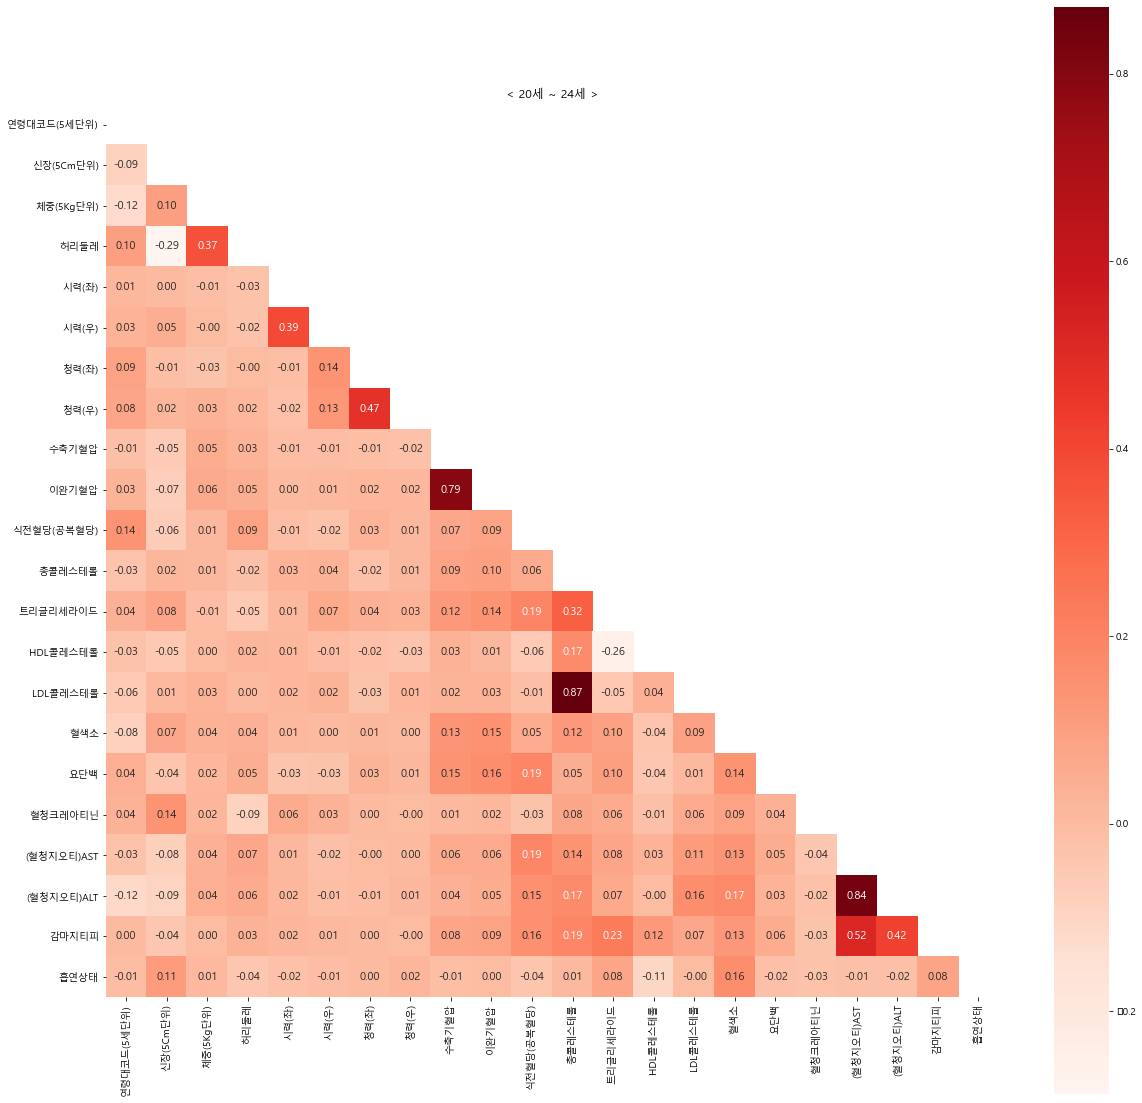

In [37]:
import numpy as np
plt.figure(figsize=(20,20), facecolor='white')
mask = np.zeros_like(corr_1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# plt.subplot(5,4,1)
sns.heatmap(corr_1, mask=mask, annot=True, annot_kws={'size':11}, fmt='.2f', cmap='Reds', square=True)
plt.title('< 20세 ~ 24세 >')
plt.show()

### 전체 인구 몸무게 상위2000, 하위2000 비교

In [38]:
wei=weight_top2000.loc[:, ['연령대코드(5세단위)',
                      '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
wei_low=weight_low2000.loc[:, ['연령대코드(5세단위)',
                      '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]

In [39]:
wei_mean=wei.mean()
wei_low_mean=wei_low.mean()

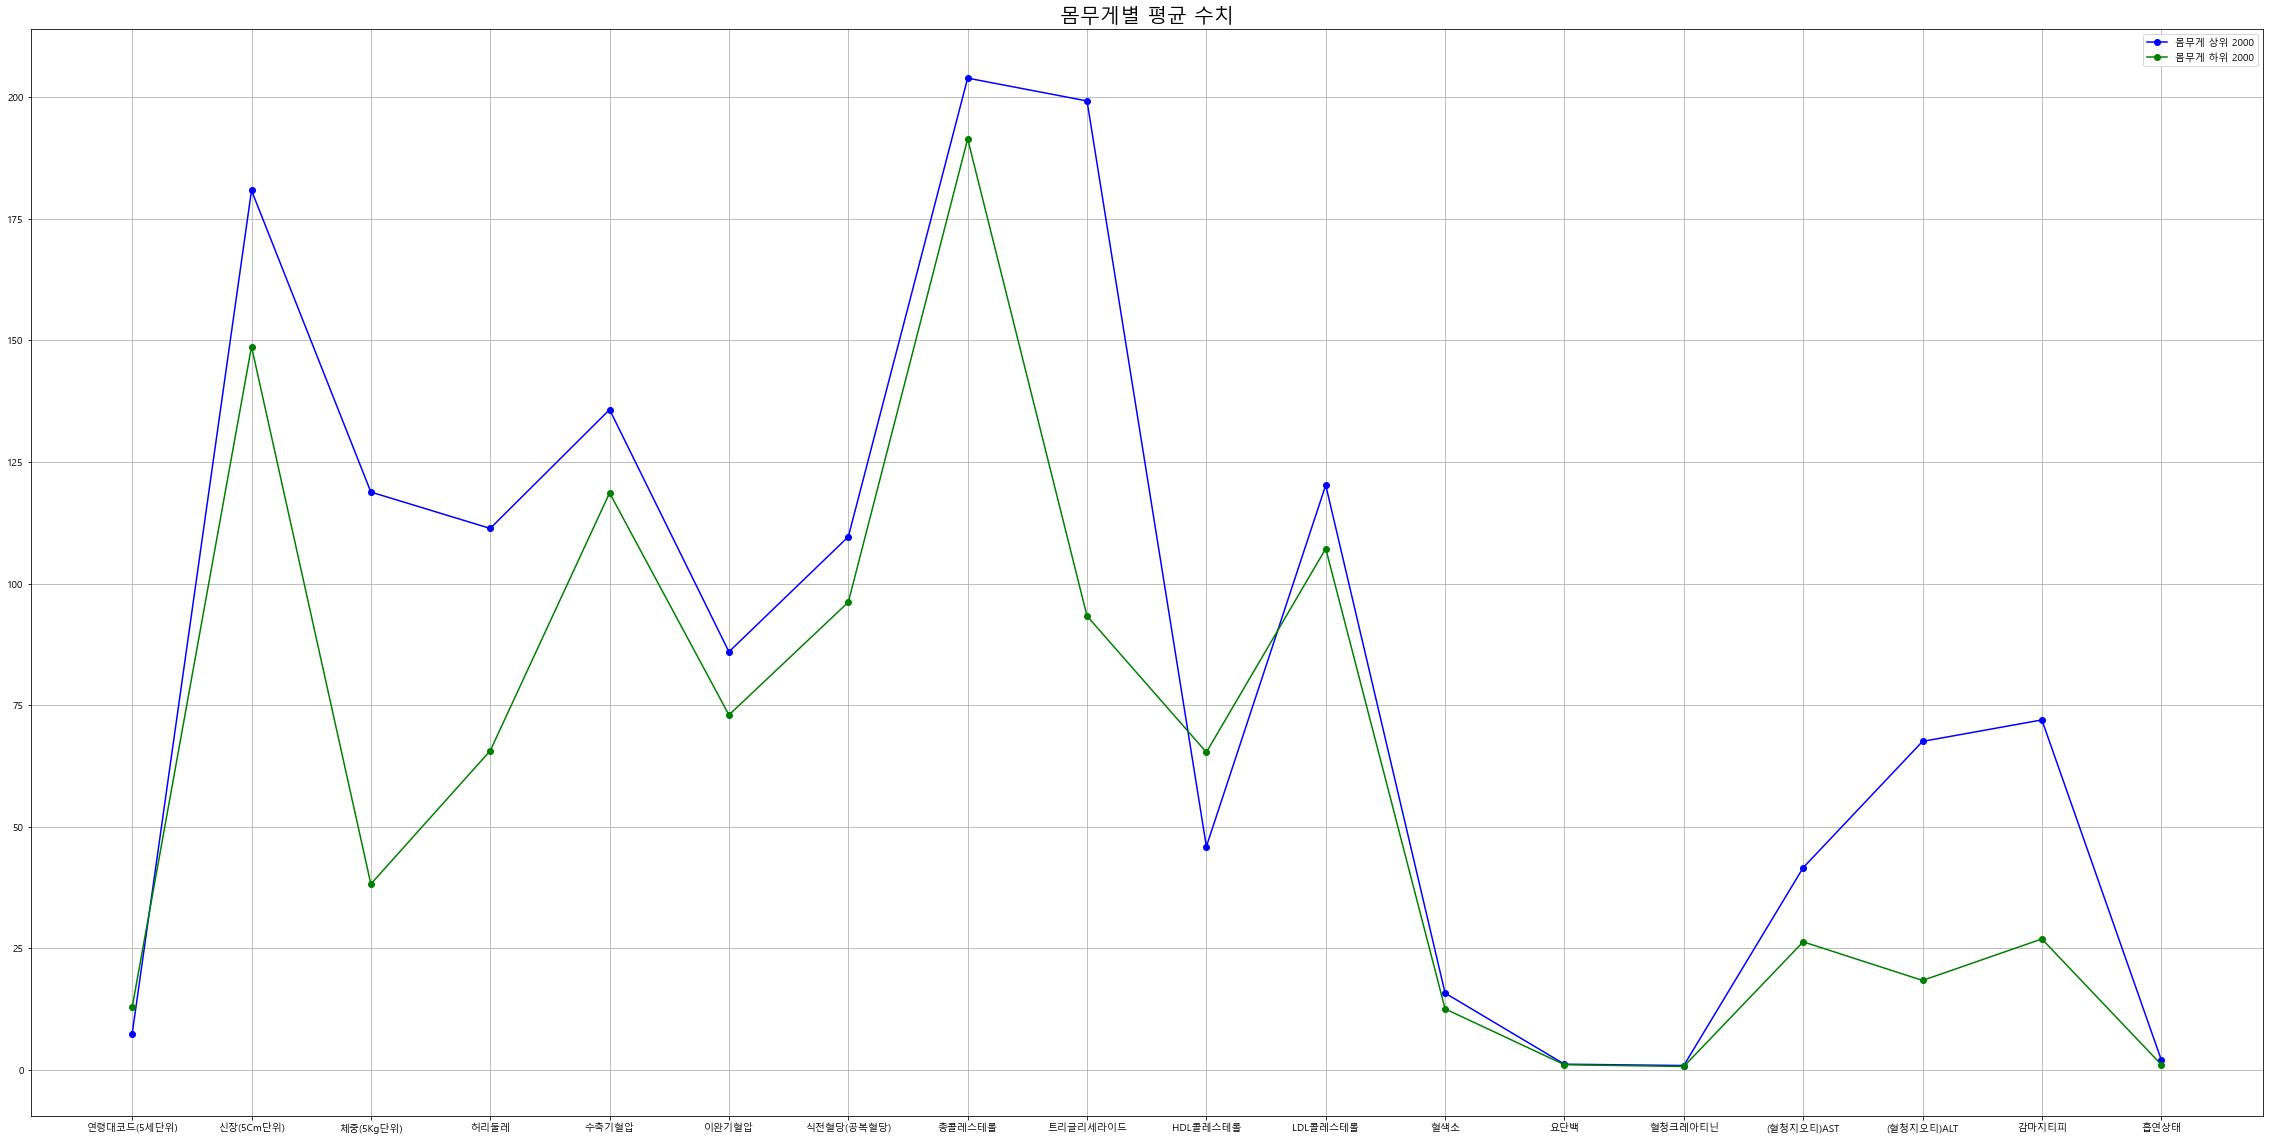

In [40]:
fig = plt.figure(figsize=(40, 20), facecolor='white')
plt.plot(wei_mean, 'go-',color='b',label='몸무게 상위 2000')
plt.plot(wei_low_mean, 'go-',color='g',label='몸무게 하위 2000')
plt.grid(True)
plt.title('몸무게별 평균 수치',size=20)
plt.legend()

### 연령별 몸무게 하위2000, 상위2000비교

In [111]:
age_20 = pd.merge(age_5,age_6,how = 'outer')
age_30 = pd.merge(age_7,age_8,how = 'outer')
age_40 = pd.merge(age_9,age_10,how = 'outer')
age_50 = pd.merge(age_11,age_12,how = 'outer')
age_60 = pd.merge(age_13,age_14,how = 'outer')
age_70 = pd.merge(age_15,age_16,how = 'outer')
age_80 = pd.merge(age_17,age_18,how = 'outer')

In [112]:
age20_top2000 = age_20.sort_values(by='체중(5Kg단위)', ascending=False).head(2000)
age20_low2000 = age_20.sort_values(by='체중(5Kg단위)', ascending=False).tail(2000)

In [113]:
age50_top2000 = age_50.sort_values(by='체중(5Kg단위)', ascending=False).head(2000)
age50_low2000 = age_50.sort_values(by='체중(5Kg단위)', ascending=False).tail(2000)

In [114]:
age20_top2000=age20_top2000.loc[:, ['연령대코드(5세단위)',
                      '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
age20_low2000=age20_low2000.loc[:, ['연령대코드(5세단위)',
                      '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
age20_top=age20_top2000.mean()
age20_low=age20_low2000.mean()

In [115]:
age50_top2000=age50_top2000.loc[:, ['연령대코드(5세단위)',
                      '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
age50_low2000=age50_low2000.loc[:, ['연령대코드(5세단위)',
                      '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
age50_top=age50_top2000.mean()
age50_low=age50_low2000.mean()

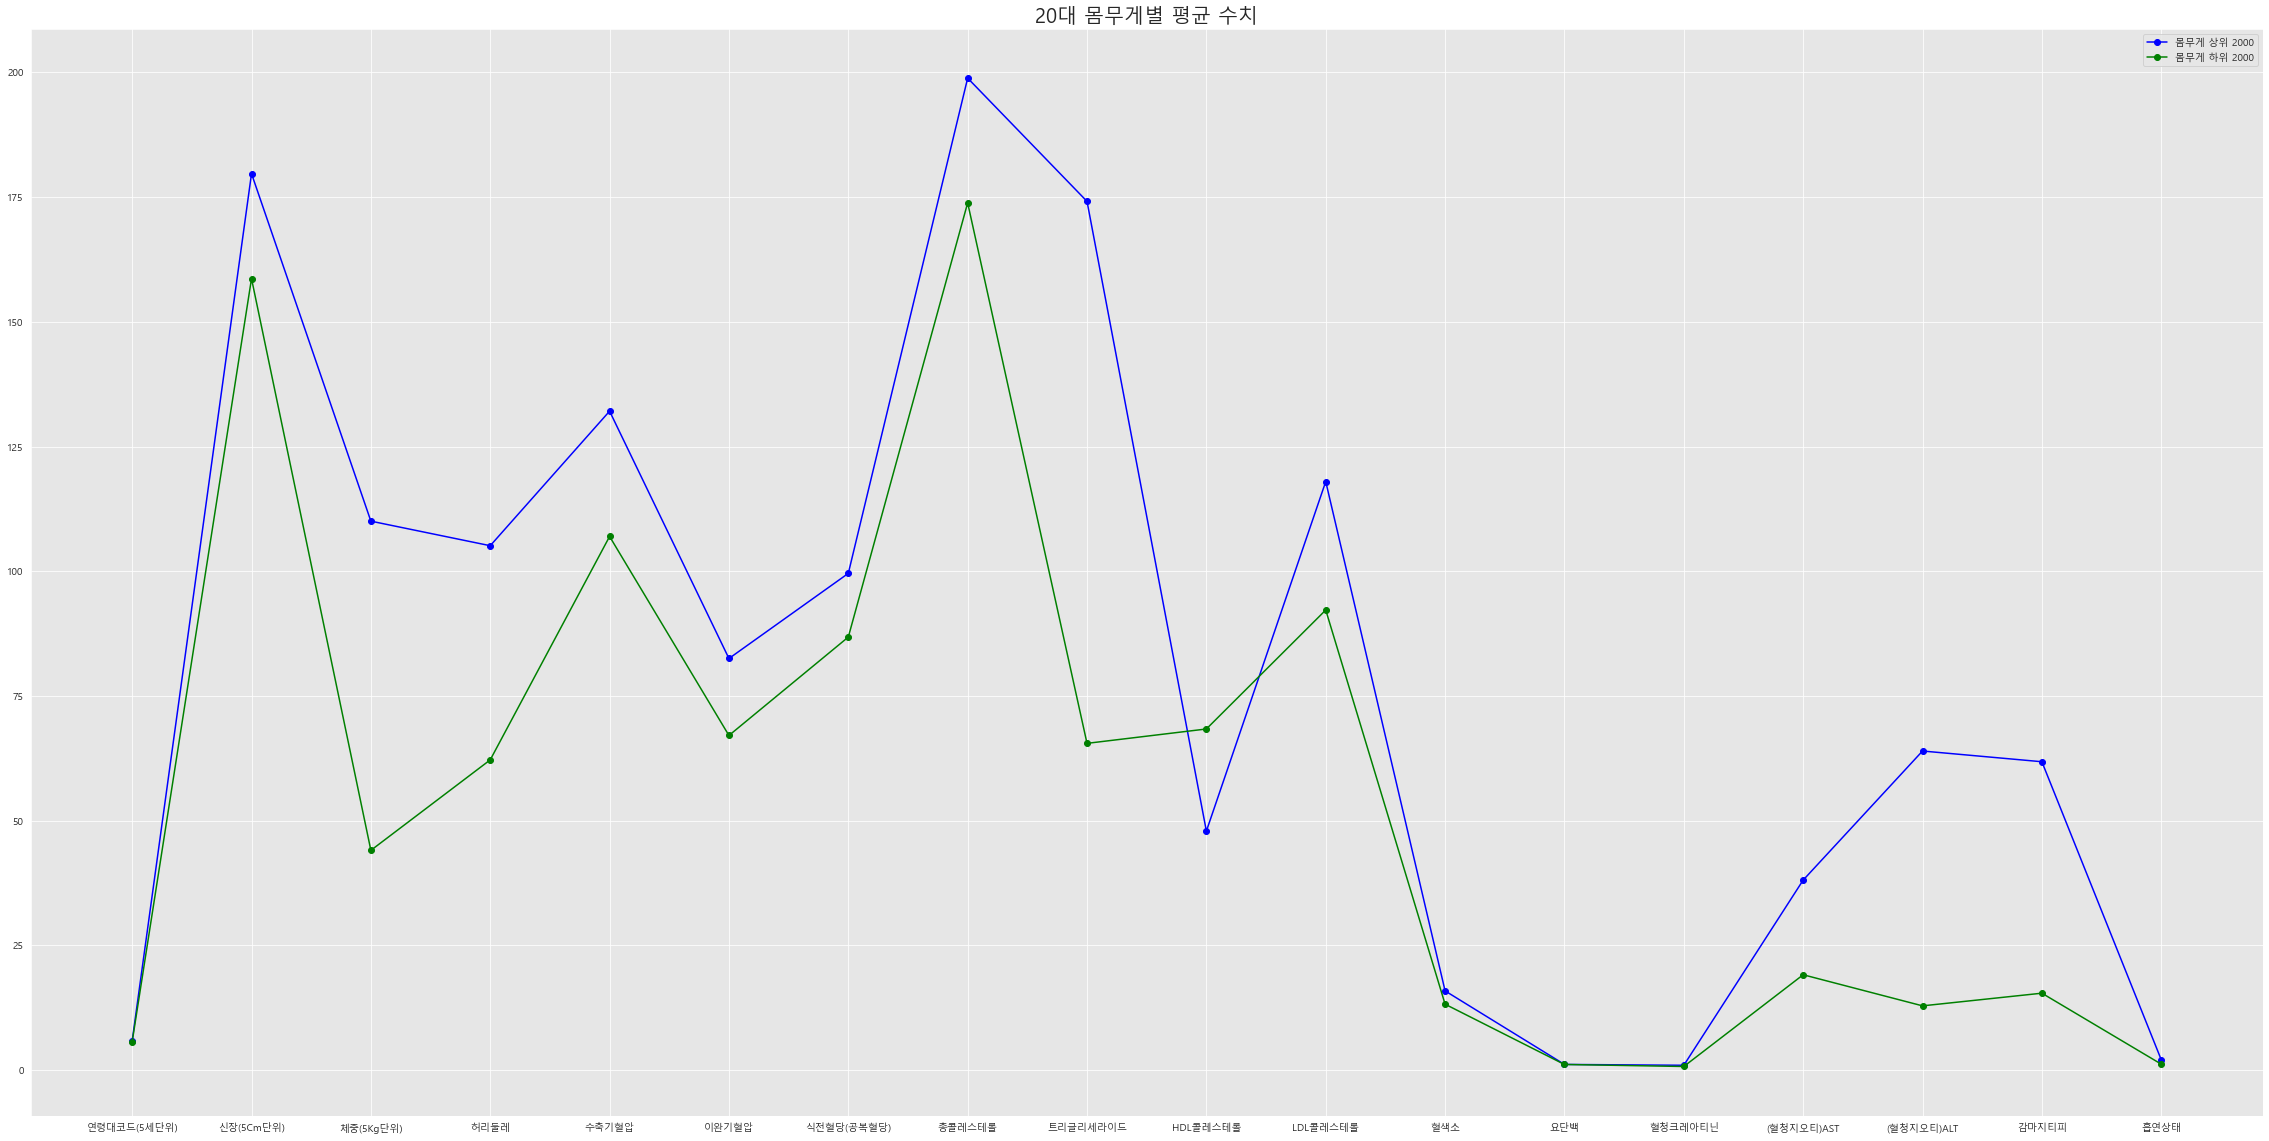

In [116]:
fig = plt.figure(figsize=(40, 20), facecolor='white')
plt.plot(age20_top, 'go-',color='b',label='몸무게 상위 2000')
plt.plot(age20_low, 'go-',color='g',label='몸무게 하위 2000')
plt.grid(True)
plt.title('20대 몸무게별 평균 수치',size=20)
plt.legend()

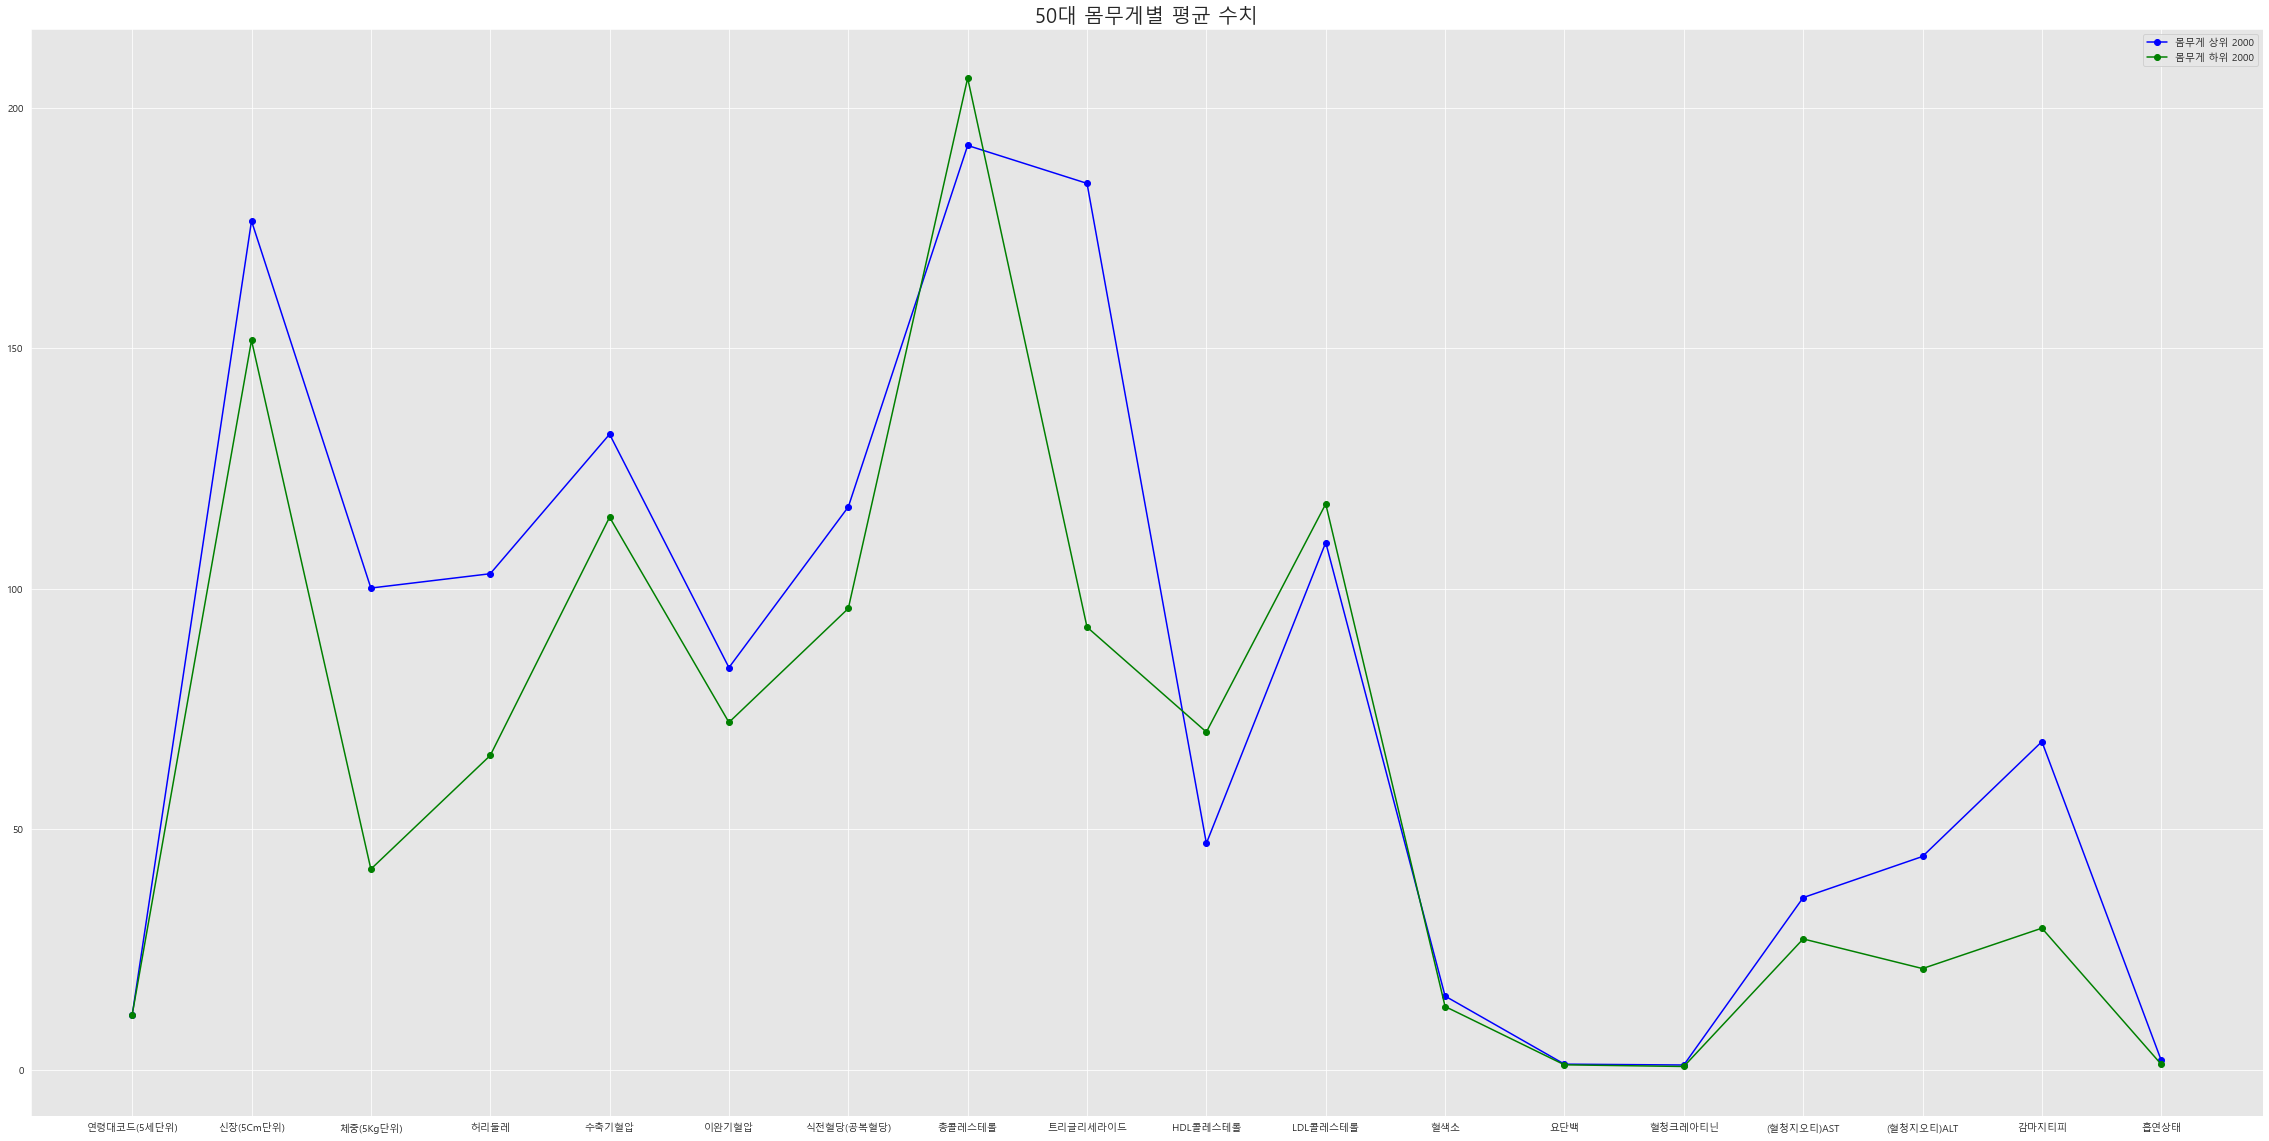

In [117]:
fig = plt.figure(figsize=(40, 20), facecolor='white')
plt.plot(age50_top, 'go-',color='b',label='몸무게 상위 2000')
plt.plot(age50_low, 'go-',color='g',label='몸무게 하위 2000')
plt.grid(True)
plt.title('50대 몸무게별 평균 수치',size=20)
plt.legend()

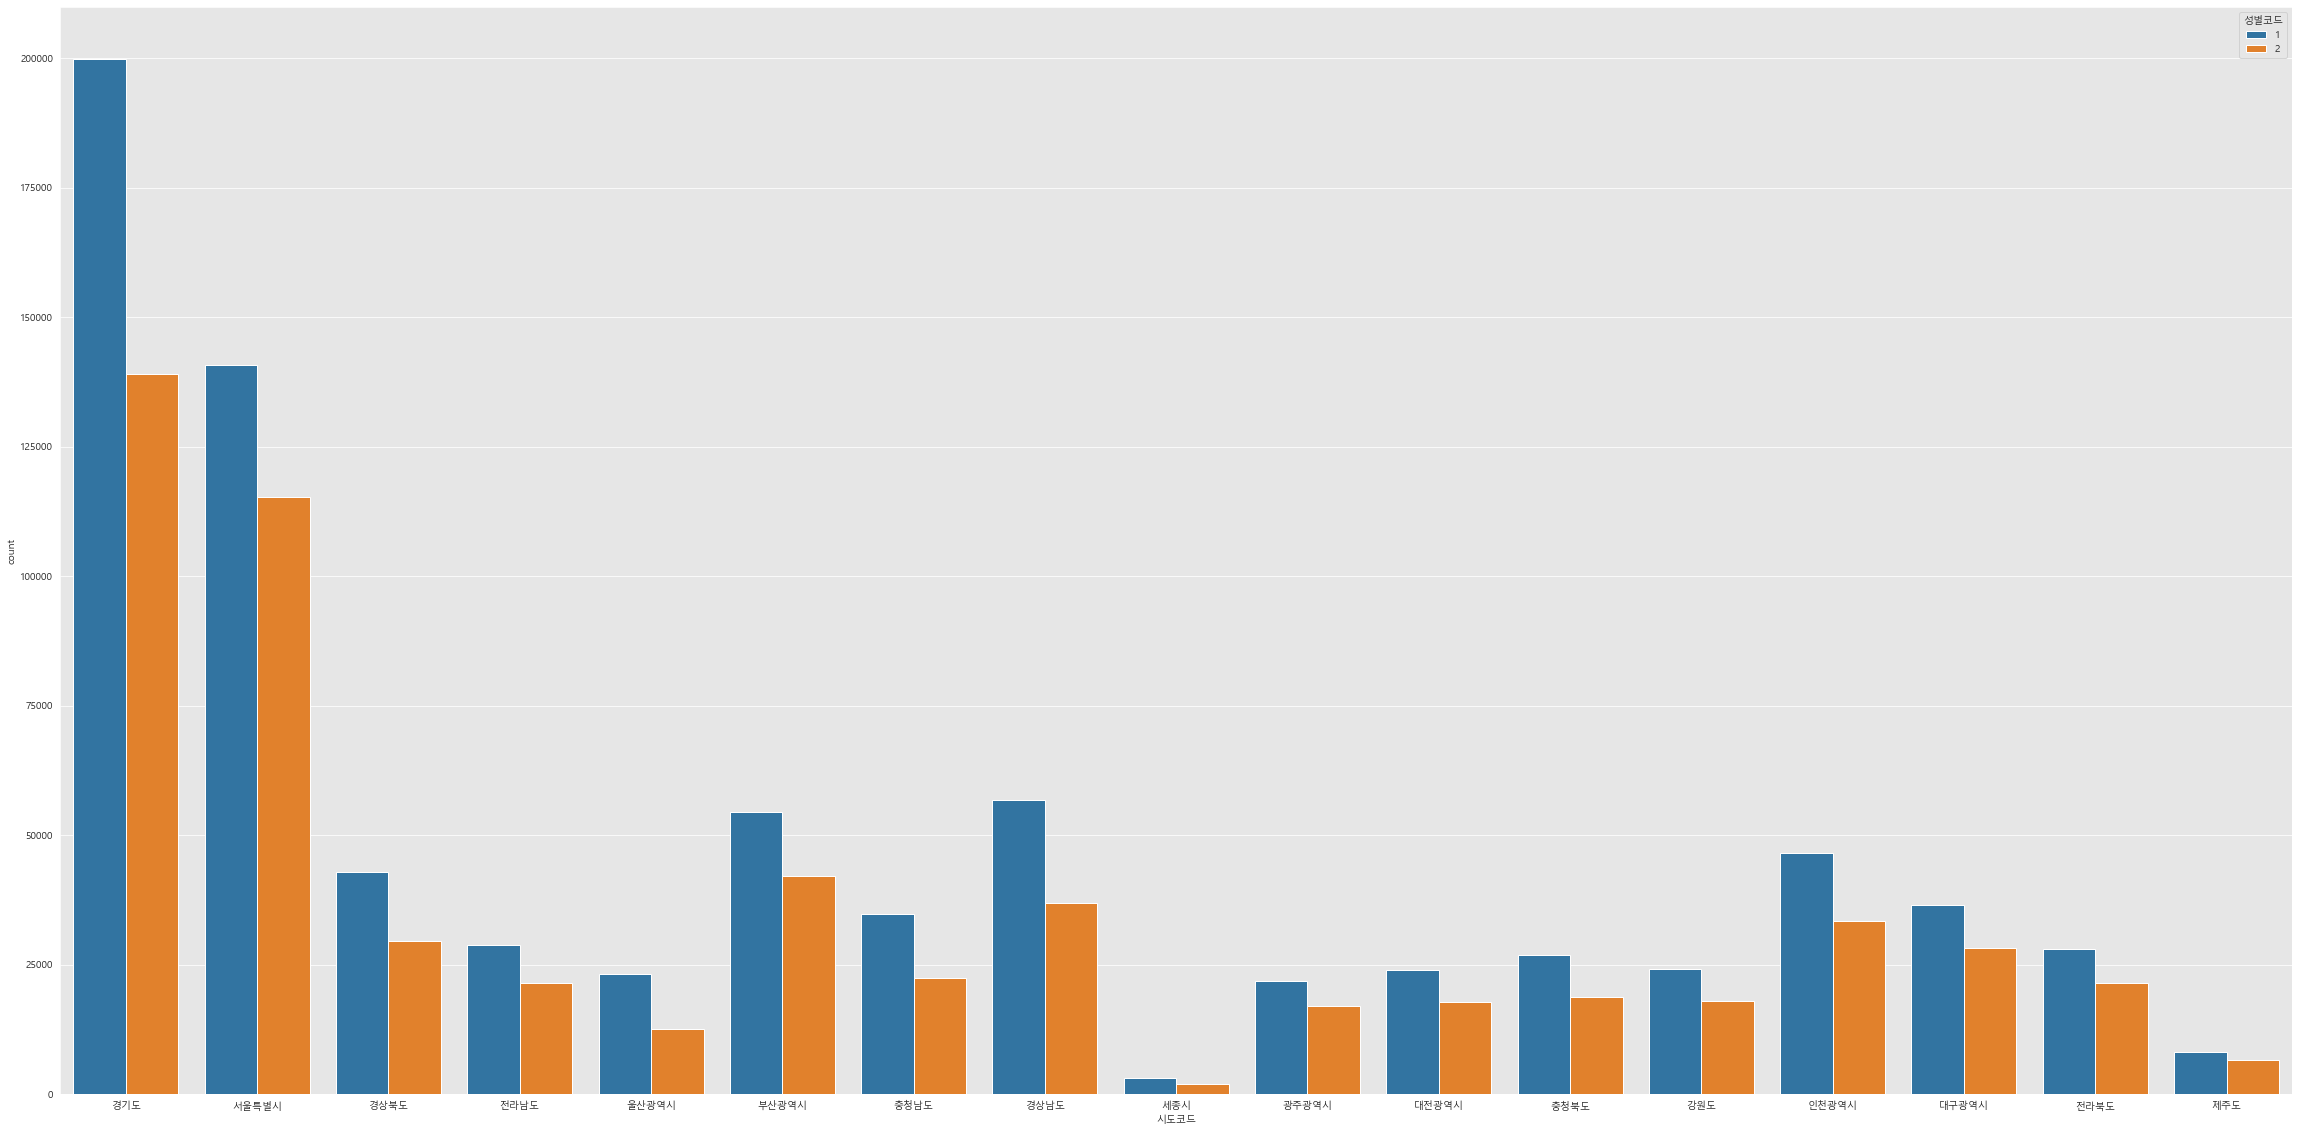

In [118]:
fig = plt.figure(figsize=(40, 20))
sns.countplot(x="시도코드", hue="성별코드", data=med1)
plt.show()

In [53]:
col= med1.sort_values(by='총콜레스테롤', ascending=False).head(2000)
col

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)   시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
285037   2019   285038     1            9   충청남도      175.0       50.0  74.0   
484066   2019   484067     1            8    경기도      180.0       85.0  95.0   
546424   2019   546425     1           11    세종시      170.0       80.0  95.0   
1441335  2018   441336     2           10    경기도      165.0       65.0  73.0   
743750   2019   743751     1           13    세종시      175.0       75.0  92.0   
...       ...      ...   ...          ...    ...        ...        ...   ...   
3324905  2015   324906     2           13  인천광역시      160.0       55.0  82.0   
3774567  2015   774568     2           12  대구광역시      150.0       55.0  83.0   
3409999  2015   410000     2           16   전라남도      155.0       50.0  74.0   
1930229  2018   930230     2           13    경기도      160.0       60.0  85.0   
3772548  2015   772549     2           10  울산광역시      155.0       65.0  79.0   

         시력(좌)  시력(우)  ...   혈색소  요단백  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마지티피  \
285037     0.2    0.4  ...  13.2  1.0      0.9       220.0        99.0  999.0   
484066     1.5    1.5  ...  16.7  1.0      1.1        18.0        14.0   32.0   
546424     0.9    0.8  ...  13.8  1.0      1.0        41.0        51.0  298.0   
1441335    1.0    1.0  ...  13.7  1.0      0.7        20.0        20.0   23.0   
743750     0.7    0.4  ...  16.1  1.0      1.0        28.0        20.0   20.0   
...        ...    ...  ...   ...  ...      ...         ...         ...    ...   
3324905    0.5    0.5  ...  13.7  1.0      1.0        20.0        24.0   14.0   
3774567    0.5    0.5  ...  15.2  1.0      0.6        19.0        16.0   44.0   
3409999    0.7    0.2  ...  13.6  1.0      0.9        29.0        13.0   23.0   
1930229    0.9    1.0  ...  13.2  1.0      0.8        36.0        36.0   23.0   
3772548    0.5    0.2  ...  13.5  1.0      1.0        21.0        18.0   19.0   

         흡연상태  음주여부  구강검진 수검여부    데이터 공개일자  
285037    2.0     1          0    20191231  
484066    2.0     1          0    20191231  
546424    2.0     1          0    20191231  
1441335   1.0     Y          N  2019-12-19  
743750    1.0     1          0    20191231  
...       ...   ...        ...         ...  
3324905   1.0     Y          N  2016-12-20  
3774567   1.0     Y          N  2016-12-20  
3409999   1.0     Y          N  2016-12-20  
1930229   1.0     Y          N  2019-12-19  
3772548   1.0     Y          N  2016-12-20  

[2000 rows x 29 columns]

In [193]:
## 남자
age_20_m = age_20.loc[age_20['성별코드']==1, :]      # 31246
age_30_m = age_30.loc[age_30['성별코드']==1, :]      # 80351
age_40_m = age_40.loc[age_40['성별코드']==1, :]      # 107715
age_50_m = age_50.loc[age_50['성별코드']==1, :]      # 106196

age_60_m = age_60.loc[age_60['성별코드']==1, :]      # 234127
age_70_m = age_70.loc[age_70['성별코드']==1, :]    # 167644
age_80_m = age_80.loc[age_80['성별코드']==1, :]    # 177204

## 여자
age_20_w = age_20.loc[age_20['성별코드']==2, :]
age_30_w = age_30.loc[age_30['성별코드']==2, :]
age_40_w = age_40.loc[age_40['성별코드']==2, :]
age_50_w = age_50.loc[age_50['성별코드']==2, :]

age_60_w = age_60.loc[age_60['성별코드']==2, :]
age_70_w = age_70.loc[age_70['성별코드']==2, :]
age_80_w = age_80.loc[age_80['성별코드']==2, :]

In [58]:
corr_1 = age50_top2000.loc[:, [ '체중(5Kg단위)', 
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소']].corr(method='pearson')
corr_1

체중(5Kg단위)    총콜레스테롤  트리글리세라이드  HDL콜레스테롤  LDL콜레스테롤       혈색소
체중(5Kg단위)   1.000000 -0.016543  0.001649 -0.074264  0.010094  0.009828
총콜레스테롤     -0.016543  1.000000  0.295771  0.213997  0.887735  0.113836
트리글리세라이드    0.001649  0.295771  1.000000 -0.236148 -0.044376  0.104409
HDL콜레스테롤   -0.074264  0.213997 -0.236148  1.000000  0.043187 -0.071036
LDL콜레스테롤    0.010094  0.887735 -0.044376  0.043187  1.000000  0.093037
혈색소         0.009828  0.113836  0.104409 -0.071036  0.093037  1.000000

In [59]:
corr_1 = age50_top2000.loc[:, [ '체중(5Kg단위)', 
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소']].corr(method='pearson')
corr_1

체중(5Kg단위)    총콜레스테롤  트리글리세라이드  HDL콜레스테롤  LDL콜레스테롤       혈색소
체중(5Kg단위)   1.000000 -0.016543  0.001649 -0.074264  0.010094  0.009828
총콜레스테롤     -0.016543  1.000000  0.295771  0.213997  0.887735  0.113836
트리글리세라이드    0.001649  0.295771  1.000000 -0.236148 -0.044376  0.104409
HDL콜레스테롤   -0.074264  0.213997 -0.236148  1.000000  0.043187 -0.071036
LDL콜레스테롤    0.010094  0.887735 -0.044376  0.043187  1.000000  0.093037
혈색소         0.009828  0.113836  0.104409 -0.071036  0.093037  1.000000

In [60]:
col20_top2000 = med1.sort_values(by='총콜레스테롤', ascending=False).head(2000)
age20_low2000 = age_20.sort_values(by='체중(5Kg단위)', ascending=False).tail(2000)

In [61]:
col20_top2000

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)   시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
285037   2019   285038     1            9   충청남도      175.0       50.0  74.0   
484066   2019   484067     1            8    경기도      180.0       85.0  95.0   
546424   2019   546425     1           11    세종시      170.0       80.0  95.0   
1441335  2018   441336     2           10    경기도      165.0       65.0  73.0   
743750   2019   743751     1           13    세종시      175.0       75.0  92.0   
...       ...      ...   ...          ...    ...        ...        ...   ...   
3324905  2015   324906     2           13  인천광역시      160.0       55.0  82.0   
3774567  2015   774568     2           12  대구광역시      150.0       55.0  83.0   
3409999  2015   410000     2           16   전라남도      155.0       50.0  74.0   
1930229  2018   930230     2           13    경기도      160.0       60.0  85.0   
3772548  2015   772549     2           10  울산광역시      155.0       65.0  79.0   

         시력(좌)  시력(우)  ...   혈색소  요단백  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마지티피  \
285037     0.2    0.4  ...  13.2  1.0      0.9       220.0        99.0  999.0   
484066     1.5    1.5  ...  16.7  1.0      1.1        18.0        14.0   32.0   
546424     0.9    0.8  ...  13.8  1.0      1.0        41.0        51.0  298.0   
1441335    1.0    1.0  ...  13.7  1.0      0.7        20.0        20.0   23.0   
743750     0.7    0.4  ...  16.1  1.0      1.0        28.0        20.0   20.0   
...        ...    ...  ...   ...  ...      ...         ...         ...    ...   
3324905    0.5    0.5  ...  13.7  1.0      1.0        20.0        24.0   14.0   
3774567    0.5    0.5  ...  15.2  1.0      0.6        19.0        16.0   44.0   
3409999    0.7    0.2  ...  13.6  1.0      0.9        29.0        13.0   23.0   
1930229    0.9    1.0  ...  13.2  1.0      0.8        36.0        36.0   23.0   
3772548    0.5    0.2  ...  13.5  1.0      1.0        21.0        18.0   19.0   

         흡연상태  음주여부  구강검진 수검여부    데이터 공개일자  
285037    2.0     1          0    20191231  
484066    2.0     1          0    20191231  
546424    2.0     1          0    20191231  
1441335   1.0     Y          N  2019-12-19  
743750    1.0     1          0    20191231  
...       ...   ...        ...         ...  
3324905   1.0     Y          N  2016-12-20  
3774567   1.0     Y          N  2016-12-20  
3409999   1.0     Y          N  2016-12-20  
1930229   1.0     Y          N  2019-12-19  
3772548   1.0     Y          N  2016-12-20  

[2000 rows x 29 columns]

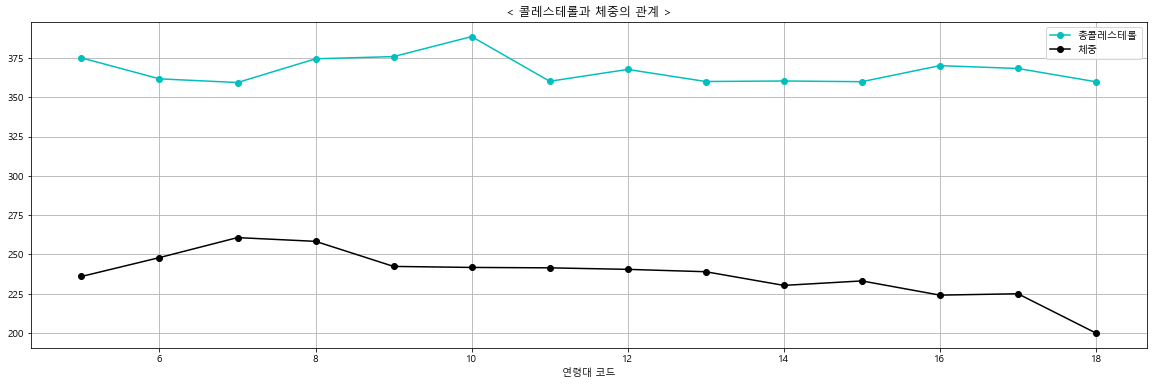

In [62]:
male_12 = col20_top2000[col20_top2000['성별코드']==2].groupby('연령대코드(5세단위)')[['총콜레스테롤']].mean()
male_1 = col20_top2000[col20_top2000['성별코드']==2].groupby('연령대코드(5세단위)')[['체중(5Kg단위)']].mean()


plt.figure(figsize=(20, 6), facecolor='white')

plt.plot(male_12, 'co-', label='총콜레스테롤')
plt.plot(male_1*4, 'ko-', label='체중')
plt.xlabel('연령대 코드')
plt.title('< 콜레스테롤과 체중의 관계 >')

# plt.xticks(rotation = - 45 )

plt.grid(True)
plt.legend()

In [64]:
female_1 = med1[med1['성별코드']==2].groupby('연령대코드(5세단위)')[['총콜레스테롤']].mean()
female_1

총콜레스테롤
연령대코드(5세단위)            
5            174.188368
6            178.971950
7            183.341427
8            185.147411
9            191.547735
10           198.625436
11           207.726476
12           208.915708
13           203.948993
14           198.147564
15           193.937678
16           191.719134
17           190.196263
18           187.213770

In [66]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [67]:
col20_top2000 = med1.sort_values(by='총콜레스테롤', ascending=False).head(2000)
col20_top2000

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)   시도코드  신장(5Cm단위)  체중(5Kg단위)   허리둘레  \
285037   2019   285038     1            9   충청남도      175.0       50.0   74.0   
484066   2019   484067     1            8    경기도      180.0       85.0   95.0   
546424   2019   546425     1           11    세종시      170.0       80.0   95.0   
1441335  2018   441336     2           10    경기도      165.0       65.0   73.0   
743750   2019   743751     1           13    세종시      175.0       75.0   92.0   
523144   2019   523145     2           12    경기도      160.0       60.0   78.0   
680681   2019   680682     2            9    경기도      160.0       55.0   69.0   
1545445  2018   545446     1           13  광주광역시      165.0       55.0   78.0   
714596   2019   714597     1           13   충청남도      170.0       65.0   88.0   
940471   2019   940472     1           11    경기도      165.0       75.0   89.0   
1351204  2018   351205     1           16   충청남도      160.0       55.0   85.0   
3970315  2015   970316     1           12   충청남도      165.0       80.0   92.0   
3404234  2015   404235     1            9   경상북도      175.0       75.0   89.0   
3970718  2015   970719     1           11   충청남도      160.0       45.0   74.0   
3569016  2015   569017     1            8  대구광역시      175.0       85.0   91.0   
3801940  2015   801941     1            8   전라북도      165.0       65.0   80.0   
3189655  2015   189656     2           13  대구광역시      165.0       80.0   89.0   
3639361  2015   639362     2           10  대전광역시      160.0       55.0   79.0   
3165249  2015   165250     1            7  인천광역시      190.0      100.0  102.0   
3206495  2015   206496     2           13   충청남도      165.0       70.0   83.0   
3104457  2015   104458     2           12  대전광역시      160.0       65.0   88.0   
3836496  2015   836497     1            9  대전광역시      180.0       80.0   88.0   
3499088  2015   499089     1            9  서울특별시      175.0       75.0   87.0   
3661737  2015   661738     2           11  서울특별시      165.0       85.0  110.0   
3587840  2015   587841     1           11  서울특별시      170.0       55.0   75.0   
3772338  2015   772339     1           14   경상북도      165.0       65.0   81.0   
3215270  2015   215271     2           11   경상북도      160.0       65.0   91.0   
3277621  2015   277622     2           16  부산광역시      155.0       50.0   85.0   
675620   2019   675621     2           10    경기도      160.0       80.0  104.5   
3359840  2015   359841     1            6  서울특별시      170.0       75.0   81.0   
114067   2019   114068     1            9  서울특별시      170.0       70.0   89.0   
3105194  2015   105195     1            8  대전광역시      170.0      100.0  107.0   
3946413  2015   946414     2           10    경기도      160.0       55.0   69.0   
3177221  2015   177222     1           14   전라남도      165.0       65.0   86.0   
3743524  2015   743525     2            8  부산광역시      170.0       80.0   84.0   
3118923  2015   118924     2           12    경기도      165.0       80.0   92.0   
3649934  2015   649935     1            9    경기도      180.0       95.0   99.0   
3418454  2015   418455     1            8  광주광역시      170.0       75.0   80.0   
3310087  2015   310088     1            9   전라북도      175.0      100.0  105.0   
3156801  2015   156802     2           13   충청남도      155.0       55.0   76.0   
3114958  2015   114959     2           11    경기도      150.0       40.0   65.0   
3124797  2015   124798     2           12    경기도      145.0       55.0   84.0   
1157497  2018   157498     1            7  서울특별시      170.0       80.0   87.7   
3110712  2015   110713     1            9  울산광역시      180.0       85.0   89.0   
169293   2019   169294     2            9    경기도      160.0       60.0   88.0   
3939790  2015   939791     2           10    경기도      160.0       55.0   69.0   
3752590  2015   752591     1           11   전라남도      160.0       70.0   84.0   
3776385  2015   776386     2           11   경상북도      160.0       60.0   79.0   
3752758  2015   752759     2           1

In [ ]:
plt.hist((e_low_m) ,histtype='bar')
plt.title('이완기 혈압에 따른 콜레스테롤 분포')
plt.xlabel('콜레스테롤 수치')
plt.figure()
plt.hist((e_top_m) ,histtype='bar')
plt.title('이완기 혈압에 따른 콜레스테롤 분포')
plt.xlabel('콜레스테롤 수치')
plt.figure()

In [129]:
female_1 = med1.groupby('연령대코드(5세단위)')[['트리글리세라이드']].mean()

In [86]:
age_20_m1=age_20_m[age_20_m['총콜레스테롤']<300]
age_20_w1=age_20_w[age_20_w['총콜레스테롤']<300]

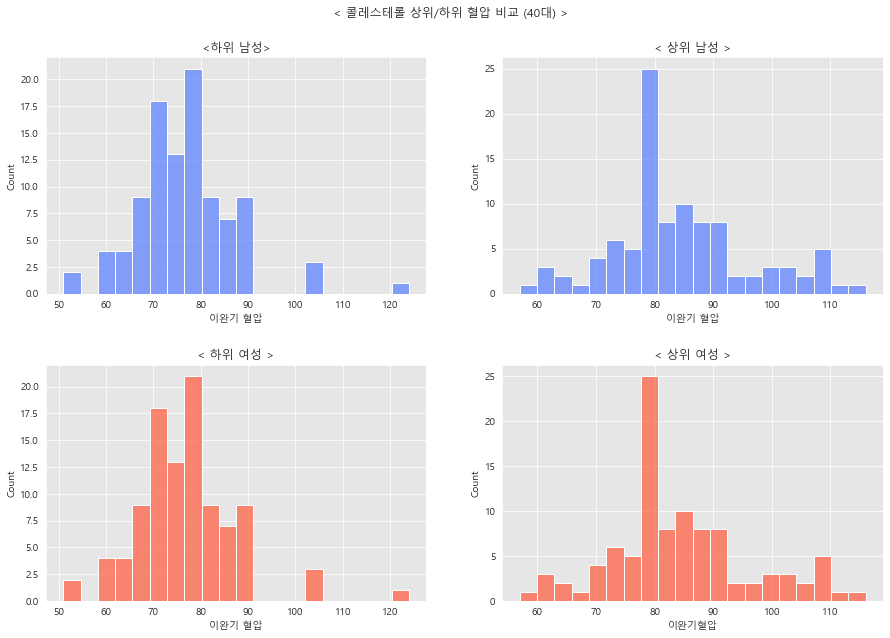

In [132]:
col40_top2000_m= age_40_m.sort_values(by='총콜레스테롤',ascending=False).head(100)
col40_low2000_m= age_40_m.sort_values(by='총콜레스테롤',ascending=False).tail(100)
col40_top2000_w= age_40_w.sort_values(by='총콜레스테롤',ascending=False).head(100)
col40_low2000_w= age_40_w.sort_values(by='총콜레스테롤',ascending=False).tail(100)

col_top_m=col40_top2000_m['이완기혈압']
col_low_m=col40_low2000_m['이완기혈압']
col_top_w=col40_top2000_m['이완기혈압']
col_low_w=col40_low2000_m['이완기혈압']

fig = plt.figure(figsize=(15, 10))

plt.subplots_adjust(hspace=0.3)
plt.subplot(2,2,1)
sns.histplot(col_low_m, color='#5f85ff',bins=20)
plt.title('<하위 남성>')
plt.xlabel('이완기 혈압')

plt.subplot(2,2,2)
sns.histplot(col_top_m, color='#5f85ff',bins=20)
plt.title('< 상위 남성 >')
plt.xlabel('이완기 혈압')

plt.subplot(2,2,3)
sns.histplot(col_low_w, color='#ff6347',bins=20)
plt.title('< 하위 여성 >')
plt.xlabel('이완기 혈압')

plt.subplot(2,2,4)
sns.histplot(col_top_w, color='#ff6347',bins=20)
plt.title('< 상위 여성 >')
plt.xlabel('이완기혈압')

plt.suptitle('< 콜레스테롤 상위/하위 혈압 비교 (40대) >', y=0.95)
plt.show()

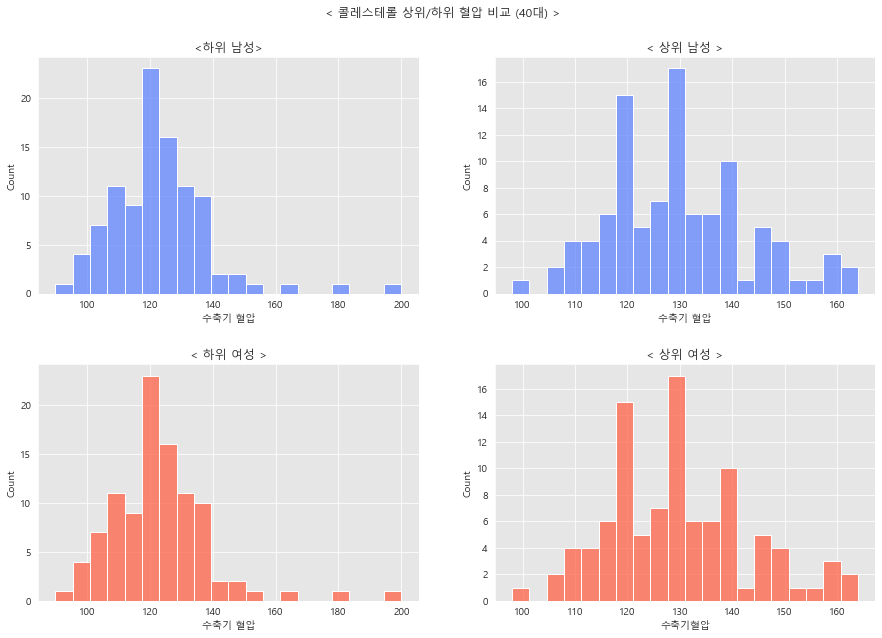

In [133]:
col40_top2000_m= age_40_m.sort_values(by='총콜레스테롤',ascending=False).head(100)
col40_low2000_m= age_40_m.sort_values(by='총콜레스테롤',ascending=False).tail(100)
col40_top2000_w= age_40_w.sort_values(by='총콜레스테롤',ascending=False).head(100)
col40_low2000_w= age_40_w.sort_values(by='총콜레스테롤',ascending=False).tail(100)

col_top_m=col40_top2000_m['수축기혈압']
col_low_m=col40_low2000_m['수축기혈압']
col_top_w=col40_top2000_m['수축기혈압']
col_low_w=col40_low2000_m['수축기혈압']

fig = plt.figure(figsize=(15, 10))

plt.subplots_adjust(hspace=0.3)
plt.subplot(2,2,1)
sns.histplot(col_low_m, color='#5f85ff',bins=20)
plt.title('<하위 남성>')
plt.xlabel('수축기 혈압')

plt.subplot(2,2,2)
sns.histplot(col_top_m, color='#5f85ff',bins=20)
plt.title('< 상위 남성 >')
plt.xlabel('수축기 혈압')

plt.subplot(2,2,3)
sns.histplot(col_low_w, color='#ff6347',bins=20)
plt.title('< 하위 여성 >')
plt.xlabel('수축기 혈압')

plt.subplot(2,2,4)
sns.histplot(col_top_w, color='#ff6347',bins=20)
plt.title('< 상위 여성 >')
plt.xlabel('수축기혈압')

plt.suptitle('< 콜레스테롤 상위/하위 혈압 비교 (40대) >', y=0.95)
plt.show()

In [135]:
age_20.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '데이터 공개일자'],
      dtype='object')

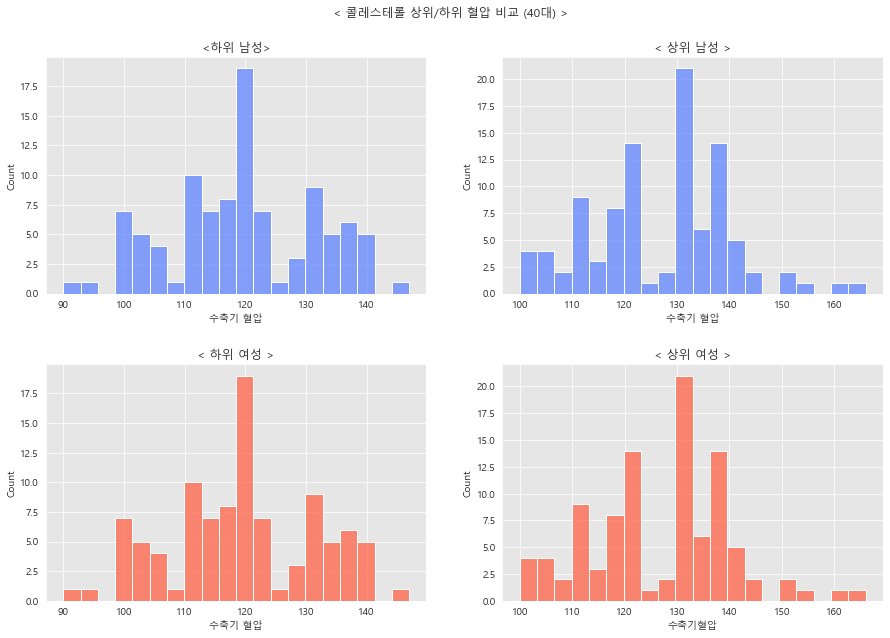

In [138]:
col40_top2000_m= age_20_m.sort_values(by='혈색소',ascending=False).head(100)
col40_low2000_m= age_20_m.sort_values(by='혈색소',ascending=False).tail(100)
col40_top2000_w= age_20_w.sort_values(by='혈색소',ascending=False).head(100)
col40_low2000_w= age_20_w.sort_values(by='혈색소',ascending=False).tail(100)

col_top_m=col40_top2000_m['수축기혈압']
col_low_m=col40_low2000_m['수축기혈압']
col_top_w=col40_top2000_m['수축기혈압']
col_low_w=col40_low2000_m['수축기혈압']

fig = plt.figure(figsize=(15, 10))

plt.subplots_adjust(hspace=0.3)
plt.subplot(2,2,1)
sns.histplot(col_low_m, color='#5f85ff',bins=20)
plt.title('<하위 남성>')
plt.xlabel('수축기 혈압')

plt.subplot(2,2,2)
sns.histplot(col_top_m, color='#5f85ff',bins=20)
plt.title('< 상위 남성 >')
plt.xlabel('수축기 혈압')

plt.subplot(2,2,3)
sns.histplot(col_low_w, color='#ff6347',bins=20)
plt.title('< 하위 여성 >')
plt.xlabel('수축기 혈압')

plt.subplot(2,2,4)
sns.histplot(col_top_w, color='#ff6347',bins=20)
plt.title('< 상위 여성 >')
plt.xlabel('수축기혈압')

plt.suptitle('< 콜레스테롤 상위/하위 혈압 비교 (40대) >', y=0.95)
plt.show()

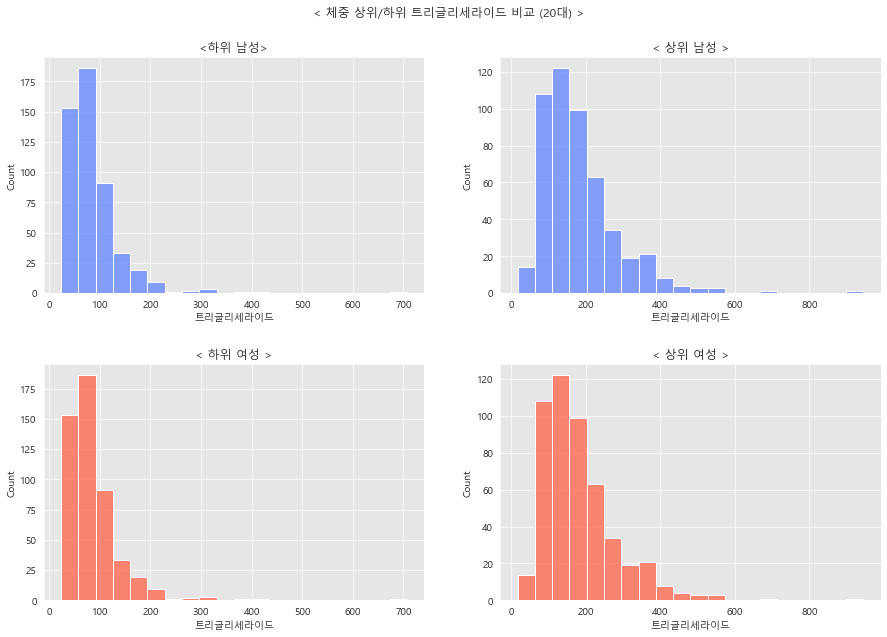

In [157]:
col40_top2000_m= age_20_m.sort_values(by='체중(5Kg단위)',ascending=False).head(500)
col40_low2000_m= age_20_m.sort_values(by='체중(5Kg단위)',ascending=False).tail(500)
col40_top2000_w= age_20_w.sort_values(by='체중(5Kg단위)',ascending=False).head(500)
col40_low2000_w= age_20_w.sort_values(by='체중(5Kg단위)',ascending=False).tail(500)

col_top_m=col40_top2000_m['트리글리세라이드']
col_low_m=col40_low2000_m['트리글리세라이드']
col_top_w=col40_top2000_m['트리글리세라이드']
col_low_w=col40_low2000_m['트리글리세라이드']

fig = plt.figure(figsize=(15, 10))

plt.subplots_adjust(hspace=0.3)
plt.subplot(2,2,1)
sns.histplot(col_low_m, color='#5f85ff',bins=20)
plt.title('<하위 남성>')
plt.xlabel('트리글리세라이드')

plt.subplot(2,2,2)
sns.histplot(col_top_m, color='#5f85ff',bins=20)
plt.title('< 상위 남성 >')
plt.xlabel('트리글리세라이드')

plt.subplot(2,2,3)
sns.histplot(col_low_w, color='#ff6347',bins=20)
plt.title('< 하위 여성 >')
plt.xlabel('트리글리세라이드')

plt.subplot(2,2,4)
sns.histplot(col_top_w, color='#ff6347',bins=20)
plt.title('< 상위 여성 >')
plt.xlabel('트리글리세라이드')

plt.suptitle('< 체중 상위/하위 트리글리세라이드 비교 (20대) >', y=0.95)
plt.show()

In [216]:
d=tre['트리글리세라이드'].values
tre=age_20_m.sort_values(by='체중(5Kg단위)',ascending=False).tail(1000)
e=tre['체중(5Kg단위)'].values

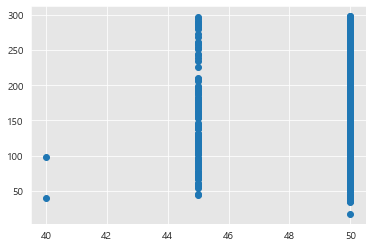

In [217]:
plt.scatter(c,a)

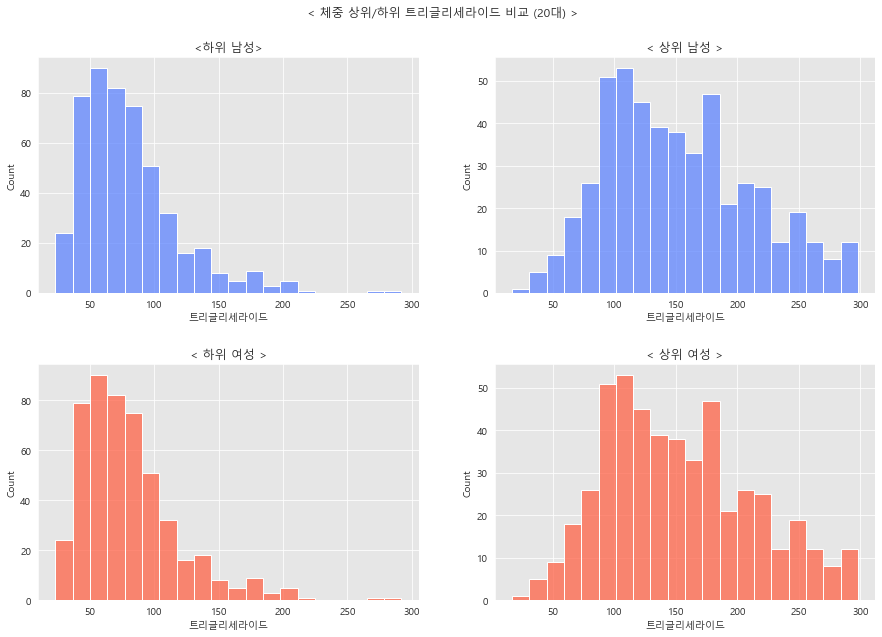

In [160]:
col40_top2000_m= age_20_m.sort_values(by='체중(5Kg단위)',ascending=False).head(500)
col40_low2000_m= age_20_m.sort_values(by='체중(5Kg단위)',ascending=False).tail(500)
col40_top2000_w= age_20_w.sort_values(by='체중(5Kg단위)',ascending=False).head(500)
col40_low2000_w= age_20_w.sort_values(by='체중(5Kg단위)',ascending=False).tail(500)

col_top_m=col40_top2000_m['트리글리세라이드']
col_low_m=col40_low2000_m['트리글리세라이드']
col_top_w=col40_top2000_m['트리글리세라이드']
col_low_w=col40_low2000_m['트리글리세라이드']

fig = plt.figure(figsize=(15, 10))

plt.subplots_adjust(hspace=0.3)
plt.subplot(2,2,1)
sns.histplot(col_low_m, color='#5f85ff',bins=20)
plt.title('<하위 남성>')
plt.xlabel('트리글리세라이드')

plt.subplot(2,2,2)
sns.histplot(col_top_m, color='#5f85ff',bins=20)
plt.title('< 상위 남성 >')
plt.xlabel('트리글리세라이드')

plt.subplot(2,2,3)
sns.histplot(col_low_w, color='#ff6347',bins=20)
plt.title('< 하위 여성 >')
plt.xlabel('트리글리세라이드')

plt.subplot(2,2,4)
sns.histplot(col_top_w, color='#ff6347',bins=20)
plt.title('< 상위 여성 >')
plt.xlabel('트리글리세라이드')

plt.suptitle('< 체중 상위/하위 트리글리세라이드 비교 (20대) >', y=0.95)
plt.show()

In [232]:
corr_1 = col40_top2000_m.loc[:, ['체중(5Kg단위)','트리글리세라이드']].corr(method='pearson')
corr_1

체중(5Kg단위)  트리글리세라이드
체중(5Kg단위)    1.00000   0.00684
트리글리세라이드     0.00684   1.00000

In [233]:
col40_top2000_m

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)   시도코드  신장(5Cm단위)  체중(5Kg단위)   허리둘레  \
51801   2015    41184     1            6  서울특별시      180.0      140.0  124.0   
60357   2015   136125     1            6    경기도      180.0      140.0  122.0   
35910   2019   522481     1            6    경기도      175.0      140.0  128.0   
28288   2015   906900     1            5  인천광역시      190.0      135.0  107.0   
31918   2019    73636     1            6    경기도      185.0      135.0  126.2   
38794   2019   843598     1            6    경기도      185.0      135.0  114.0   
37186   2019   664477     1            6    경기도      175.0      135.0  130.0   
12503   2015   115675     1            5    경기도      175.0      135.0   98.0   
23027   2015   598965     1            5  인천광역시      190.0      135.0  107.0   
95999   2015   767258     1            6  서울특별시      185.0      135.0  125.0   
70608   2015   254347     1            6    경기도      185.0      135.0  115.0   
89231   2015   640695     1            6  서울특별시      185.0      135.0  116.0   
4585    2019   975815     1            5    경기도      180.0      135.0  120.0   
58571   2015   117161     1            6    경기도      180.0      130.0  124.0   
32645   2019   155096     1            6    경기도      180.0      130.0  117.0   
7197    2018   804272     1            5    경기도      175.0      130.0  128.0   
69903   2015   244265     1            6    강원도      180.0      130.0  102.0   
34581   2019   368949     1            6    경기도      180.0      130.0  119.3   
80430   2015   427084     1            6    경기도      180.0      130.0  110.0   
2322    2019   496807     1            5    경기도      185.0      130.0  123.0   
102836  2015   894134     1            6    경기도      185.0      130.0  105.0   
17768   2015   269677     1            5    경기도      185.0      130.0  115.0   
98904   2015   822022     1            6  광주광역시      185.0      130.0  118.0   
83499   2015   499498     1            6  서울특별시      185.0      130.0  122.0   
32577   2019   147944     1            6    경기도      180.0      130.0  132.5   
58419   2015   115761     1            6    경기도      185.0      130.0  117.0   
41761   2018   211152     1            6    경기도      175.0      130.0  112.0   
103037  2015   898609     1            6    경기도      185.0      130.0  120.0   
52642   2015    52715     1            6  서울특별시      185.0      130.0  109.0   
22665   2015   562219     1            5    경기도      185.0      130.0  129.0   
95883   2015   765241     1            6  대구광역시      190.0      130.0  119.0   
26990   2015   840727     1            5    경기도      180.0      130.0  127.0   
49376   2015    10546     1            6  서울특별시      185.0      130.0  115.0   
103683  2015   912194     1            6    경기도      185.0      130.0   98.0   
98836   2015   820973     1            6   충청남도      175.0      130.0  126.0   
46869   2018   899570     1            6    경기도      180.0      130.0  127.0   
20984   2015   437080     1            5    경기도      180.0      130.0  110.0   
91775   2015   688468     1            6   경상남도      180.0      130.0  128.0   
81247   2015   453549     1            6    경기도      180.0      130.0  123.0   
42813   2018   356759     1            6    경기도      175.0      130.0  101.6   
20165   2015   370311     1            5    경기도      180.0      130.0  120.0   
61062   2015   143939     1            6    경기도      185.0      130.0  120.0   
80600   2015   434586     1            6  인천광역시      185.0      130.0  117.0   
33866   2019   290553     1            6    경기도      170.0      125.0  113.0   
27583   2015   871068     1            5  서울특별시      185.0      125.0  120.0   
106010  2015   960103     1            6    경기도      175.0      125.0  111.0   
59902   2015   131697     1            6  서울특별시      180.0      125.0  111.0   
62222   2015   156510     1            6   충청남도      185.0      125.0  115.0   
97196   2015   788530     1            6    경기도      180.0      125.0  103.0   
59250   

트리글리세라이드                                                         
          count        mean        std   min   25%    50%    75%     max
시도코드                                                                    
강원도     24220.0  145.920273  92.359757   3.0  84.0  122.0  182.0   995.0
경기도    199876.0  146.432388  93.231950   2.0  84.0  123.0  182.0  1276.0
경상남도    56755.0  143.196000  91.045714   8.0  82.0  120.0  177.0   999.0
경상북도    42775.0  144.758971  93.106584   2.0  83.0  121.0  178.0   999.0
광주광역시   21840.0  147.335348  94.157405   3.0  84.0  123.0  184.0   999.0
대구광역시   36449.0  143.631842  90.941126   7.0  82.0  121.0  179.0   999.0
대전광역시   24006.0  147.066650  92.578758  11.0  85.0  124.0  182.0   997.0
부산광역시   54432.0  144.944812  93.766463   6.0  83.0  121.0  180.0   999.0
서울특별시  140671.0  142.106411  89.764223   1.0  82.0  119.0  176.0   999.0
세종시      3020.0  143.321854  88.690987  16.0  84.0  120.0  179.0   897.0
울산광역시   23086.0  143.413757  90.340212   9.0  82.0  121.0  179.0   997.0
인천광역시   46628.0  147.434460  93.814410   7.0  84.0  124.0  183.0   999.0
전라남도    28703.0  147.915862  96.325741   6.0  84.0  123.0  183.0   998.0
전라북도    28027.0  146.123096  90.844226   5.0  85.0  123.0  182.0   982.0
제주도      8079.0  136.894170  86.049118  15.0  79.0  115.0  170.0   951.0
충청남도    34671.0  147.507571  94.458821  11.0  84.0  123.0  183.0   999.0
충청북도    26869.0  146.672932  96.580406   5.0  83.0  122.0  182.0   998.0

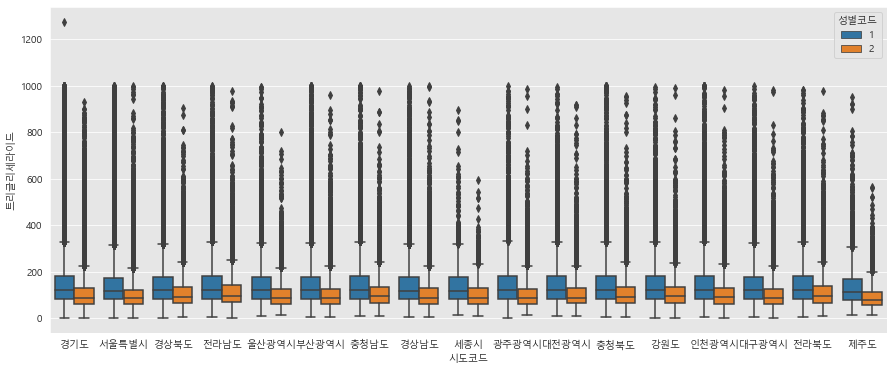

In [67]:

plt.subplots(figsize=(15, 6))

sns.boxplot(x='시도코드', y='트리글리세라이드', hue='성별코드', data=med_total_1)
med_total_1[med_total_1['성별코드']==1].groupby('시도코드')[['트리글리세라이드']].describe()

In [68]:

pd.set_option('display.max_rows', 20)
med_total_1[med_total_1['성별코드']==1].groupby('연령대코드(5세단위)')[['혈청크레아티닌']].describe()

혈청크레아티닌                                              
                count      mean       std  min  25%  50%  75%   max
연령대코드(5세단위)                                                        
5             18213.0  0.961330  0.198591  0.1  0.9  1.0  1.1  17.2
6             52009.0  0.970544  0.550774  0.1  0.9  1.0  1.1  83.0
7             75178.0  0.966478  0.287844  0.1  0.9  1.0  1.1  53.0
8             79251.0  0.967396  0.514692  0.1  0.9  1.0  1.1  99.0
9            129403.0  0.970028  0.462065  0.1  0.9  1.0  1.1  98.0
10            92570.0  0.973028  0.411644  0.1  0.9  1.0  1.1  71.0
11            93471.0  0.972211  0.456192  0.1  0.9  1.0  1.1  98.0
12            79607.0  0.973394  0.551357  0.1  0.8  1.0  1.1  95.0
13            85630.0  0.974148  0.442347  0.1  0.8  1.0  1.1  81.0
14            37789.0  1.001561  0.509814  0.1  0.9  1.0  1.1  41.0
15            31012.0  1.022053  0.722389  0.1  0.9  1.0  1.1  94.0
16            15992.0  1.047424  0.750625  0.1  0.9  1.0  1.1  79.0
17             8783.0  1.108881  1.688988  0.1  0.9  1.0  1.2  92.0
18             1199.0  1.201334  1.766767  0.1  0.9  1.1  1.3  59.0

### 데이터 분석
 * 콜레스테롤과 체중의 관계
 * 콜레스테롤과 혈압의 관계
 * 혈당과 단백뇨의 관계
 * 체중과 트리글리세라이드의 관계
 * 연령대, 지역에 따른 트리글리세라이드 수치 비교
 * 음주상태에 따른 혈청지오티, 혈청지피티 수치 비교
 * 혈색소와 연령대의 관계

### 콜레스테롤과 체중의 관계

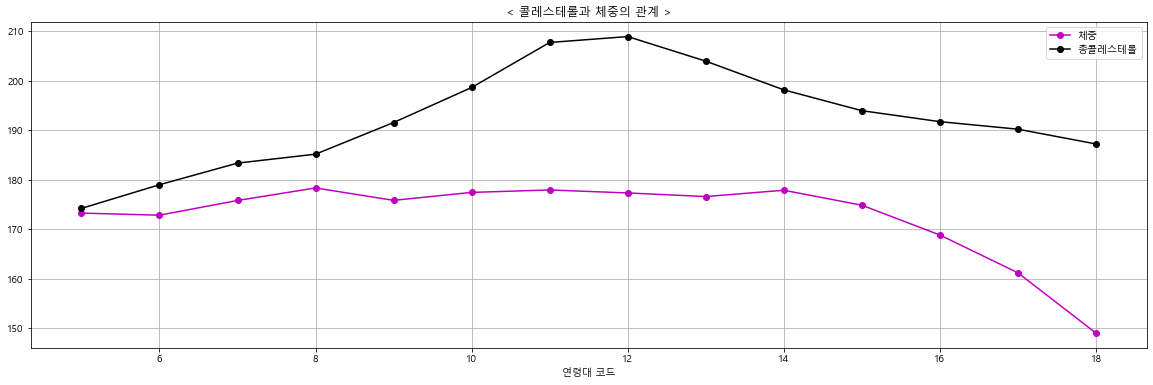

In [63]:
female_12 = med1[med1['성별코드']==2].groupby('연령대코드(5세단위)')[['체중(5Kg단위)']].mean()
female_1 = med1[med1['성별코드']==2].groupby('연령대코드(5세단위)')[['총콜레스테롤']].mean()

plt.figure(figsize=(20, 6), facecolor='white')

plt.plot(female_12*3, 'mo-', label='체중')
plt.plot(female_1, 'ko-', label='총콜레스테롤')
plt.xlabel('연령대 코드')
plt.title('< 콜레스테롤과 체중의 관계 >')

# plt.xticks(rotation = - 45 )

plt.grid(True)
plt.legend()

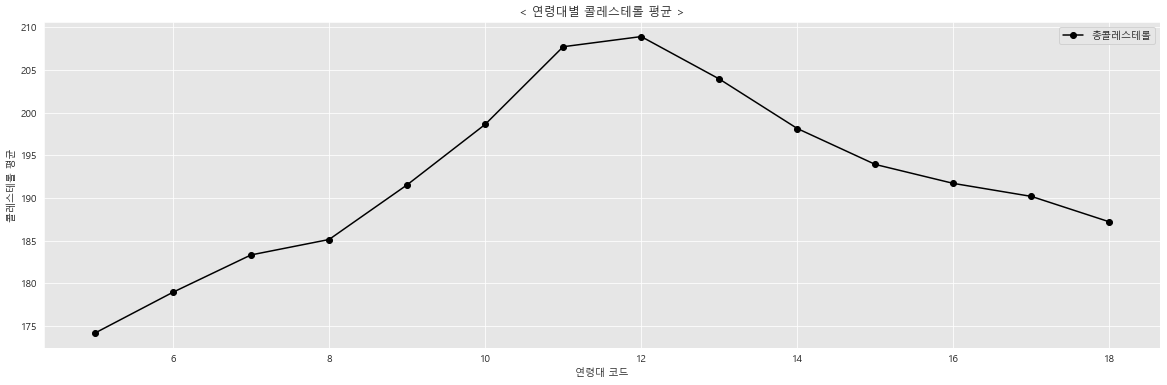

In [105]:
female_1 = med1[med1['성별코드']==2].groupby('연령대코드(5세단위)')[['총콜레스테롤']].mean()

plt.figure(figsize=(20, 6), facecolor='white')


plt.plot(female_1, 'ko-', label='총콜레스테롤')
plt.xlabel('연령대 코드')
plt.ylabel('콜레스테롤 평균')
plt.title('< 연령대별 콜레스테롤 평균 >')

# plt.xticks(rotation = - 45 )

plt.grid(True)
plt.legend()

In [69]:

col_max = med_total_1[['총콜레스테롤', '체중(5Kg단위)', '성별코드', '연령대코드(5세단위)']].sort_values(by='총콜레스테롤', ascending=False).head(20)
col_min = med_total_1[['총콜레스테롤', '체중(5Kg단위)']].sort_values(by='총콜레스테롤', ascending=False).tail(20)

# col_max['체중(5Kg단위)'].values

In [70]:
col_max['체중(5Kg단위)'].mean(), col_min['체중(5Kg단위)'].mean()

(68.75, 62.5)

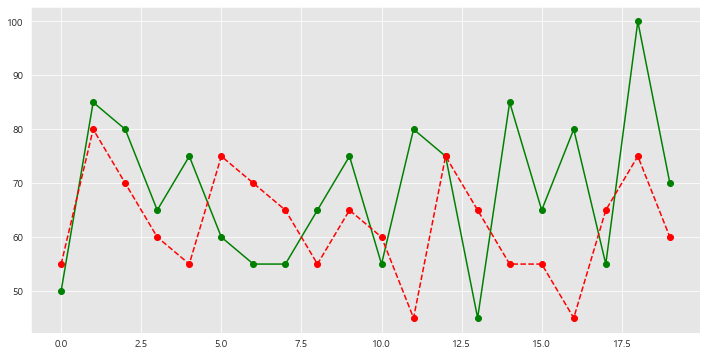

In [71]:
plt.figure(figsize=(12, 6), facecolor='white')

plt.plot(col_max['체중(5Kg단위)'].values, 'go-')
plt.plot(col_min['체중(5Kg단위)'].values, 'ro--')

plt.show()

In [72]:

col_max_m = age_40_m[['총콜레스테롤', '체중(5Kg단위)']].sort_values(by='총콜레스테롤', ascending=False).head(50000)
col_min_m = age_40_m[['총콜레스테롤', '체중(5Kg단위)']].sort_values(by='총콜레스테롤', ascending=False).tail(50000)

col_max_w = age_40_w[['총콜레스테롤', '체중(5Kg단위)']].sort_values(by='총콜레스테롤', ascending=False).head(50000)
col_min_w = age_40_w[['총콜레스테롤', '체중(5Kg단위)']].sort_values(by='총콜레스테롤', ascending=False).tail(50000)

print('============ < 상위그룹 > =============')
print('남성')
print(col_max_m.describe(), '\n')
print('여성')
print(col_max_w.describe(), '\n')
print('============ < 하위그룹 > =============')
print('남성')
print(col_min_m.describe(), '\n')
print('여성')
print(col_min_w.describe())

============ < 상위그룹 > =============
남성
            총콜레스테롤    체중(5Kg단위)
count  50000.00000  50000.00000
mean     252.95392     75.73880
std       24.70146     10.47494
min      228.00000     40.00000
25%      236.00000     70.00000
50%      247.00000     75.00000
75%      263.00000     80.00000
max     2389.00000    135.00000 

여성
             총콜레스테롤     체중(5Kg단위)
count  50000.000000  50000.000000
mean     236.412620     60.014400
std       25.428981      9.754112
min      212.000000     35.000000
25%      220.000000     55.000000
50%      230.000000     60.000000
75%      246.000000     65.000000
max     2236.000000    115.000000 

============ < 하위그룹 > =============
남성
             총콜레스테롤     체중(5Kg단위)
count  50000.000000  50000.000000
mean     155.429860     73.288000
std       15.679532     11.265505
min       46.000000     40.000000
25%      147.000000     65.000000
50%      159.000000     70.000000
75%      168.000000     80.000000
max      175.000000    130.000000 

여성
          

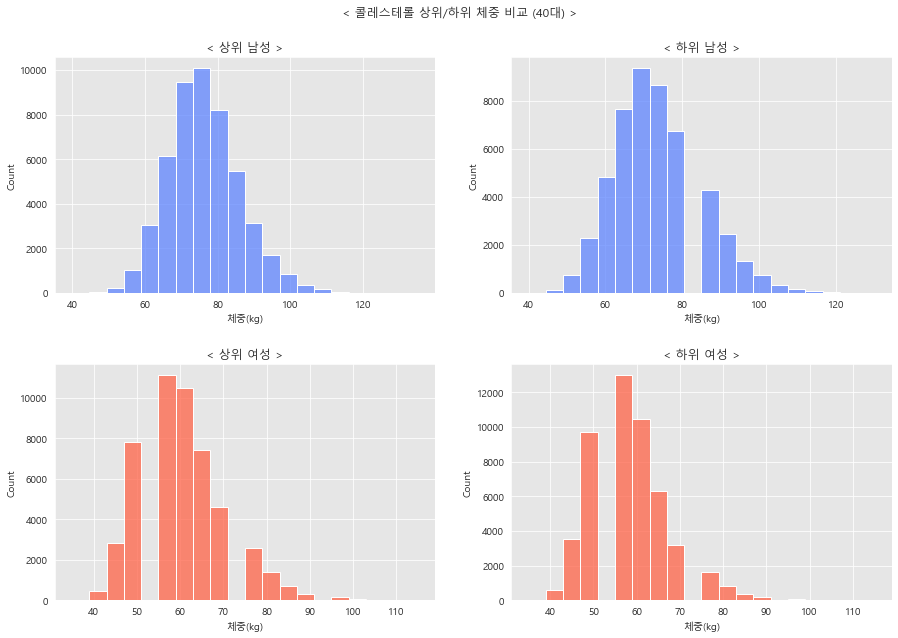

In [73]:
fig = plt.figure(figsize=(15, 10))

plt.subplots_adjust(hspace=0.3)
plt.subplot(2,2,1)
sns.histplot(col_max_m['체중(5Kg단위)'].values, color='#5f85ff',bins=20)
# plt.xlim([80, 200])
plt.title('< 상위 남성 >')
plt.xlabel('체중(kg)')

plt.subplot(2,2,2)
sns.histplot(col_min_m['체중(5Kg단위)'].values, color='#5f85ff',bins=20)
# plt.xlim([80, 200])
plt.title('< 하위 남성 >')
plt.xlabel('체중(kg)')

plt.subplot(2,2,3)
sns.histplot(col_max_w['체중(5Kg단위)'].values, color='#ff6347',bins=20)
# plt.xlim([80, 200])
plt.title('< 상위 여성 >')
plt.xlabel('체중(kg)')

plt.subplot(2,2,4)
sns.histplot(col_min_w['체중(5Kg단위)'].values, color='#ff6347',bins=20)
# plt.xlim([80, 200])
plt.title('< 하위 여성 >')
plt.xlabel('체중(kg)')

plt.suptitle('< 콜레스테롤 상위/하위 체중 비교 (40대) >', y=0.95)
plt.show()

In [74]:

test_1 = age_40_m[age_40_m['총콜레스테롤']<500]
test_2 = age_40_w[age_40_w['총콜레스테롤']<500]

col_max_m = test_1[['총콜레스테롤', '수축기혈압', '이완기혈압']].sort_values(by='총콜레스테롤', ascending=False).head(100)
col_min_m = test_1[['총콜레스테롤', '수축기혈압', '이완기혈압']].sort_values(by='총콜레스테롤', ascending=False).tail(100)

col_max_w = test_2[['총콜레스테롤', '수축기혈압', '이완기혈압']].sort_values(by='총콜레스테롤', ascending=False).head(100)
col_min_w = test_2[['총콜레스테롤', '수축기혈압', '이완기혈압']].sort_values(by='총콜레스테롤', ascending=False).tail(100)

In [75]:
print('< 남성 상위 >\n', col_max_m.describe(), '\n\n< 남성 하위 >\n', col_min_m.describe(),
      '\n\n< 여성 상위 >\n', col_max_w.describe(), '\n\n< 여성 하위 >\n', col_min_w.describe())

< 남성 상위 >
            총콜레스테롤       수축기혈압      이완기혈압
count  100.000000  100.000000  100.00000
mean   400.420000  129.790000   84.21000
std     26.312489   14.172313   12.36098
min    370.000000   98.000000   57.00000
25%    380.750000  120.000000   78.00000
50%    392.000000  130.000000   82.00000
75%    419.500000  138.250000   90.00000
max    482.000000  164.000000  116.00000 

< 남성 하위 >
            총콜레스테롤       수축기혈압       이완기혈압
count  100.000000  100.000000  100.000000
mean    88.120000  123.200000   77.400000
std      9.460476   16.111355   10.905471
min     46.000000   90.000000   51.000000
25%     85.750000  114.000000   70.000000
50%     91.000000  121.000000   77.000000
75%     94.000000  130.000000   82.250000
max     96.000000  200.000000  124.000000 

< 여성 상위 >
            총콜레스테롤       수축기혈압       이완기혈압
count  100.000000  100.000000  100.000000
mean   382.210000  120.540000   76.570000
std     29.682255   16.477974   11.334452
min    353.000000   90.000000   52.000000
25%   

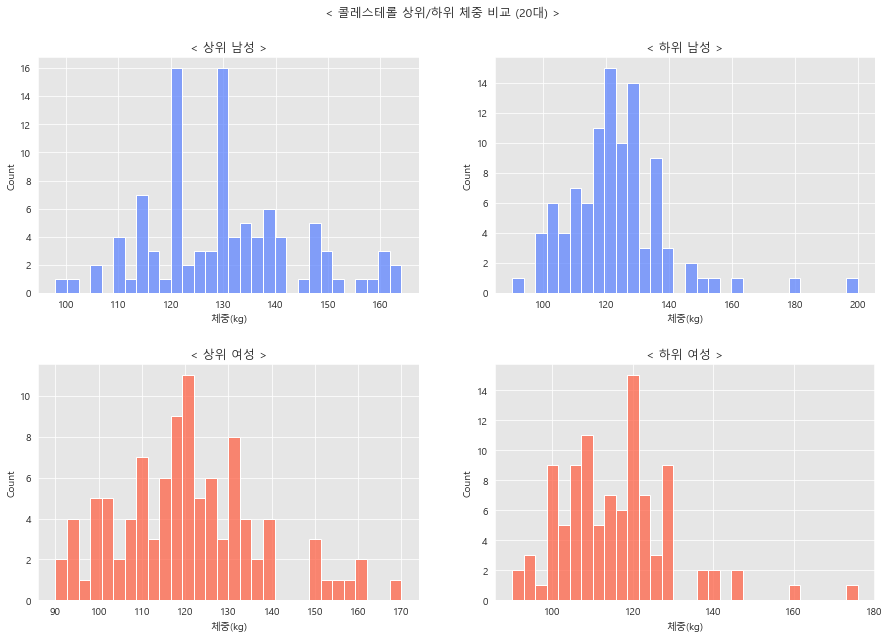

In [76]:
fig = plt.figure(figsize=(15, 10))

plt.subplots_adjust(hspace=0.3)
plt.subplot(2,2,1)
sns.histplot(col_max_m['수축기혈압'].values, color='#5f85ff',bins=30)
# plt.xlim([80, 200])
plt.title('< 상위 남성 >')
plt.xlabel('체중(kg)')

plt.subplot(2,2,2)
sns.histplot(col_min_m['수축기혈압'].values, color='#5f85ff',bins=30)
# plt.xlim([80, 200])
plt.title('< 하위 남성 >')
plt.xlabel('체중(kg)')

plt.subplot(2,2,3)
sns.histplot(col_max_w['수축기혈압'].values, color='#ff6347',bins=30)
# plt.xlim([80, 200])
plt.title('< 상위 여성 >')
plt.xlabel('체중(kg)')

plt.subplot(2,2,4)
sns.histplot(col_min_w['수축기혈압'].values, color='#ff6347',bins=30)
# plt.xlim([80, 200])
plt.title('< 하위 여성 >')
plt.xlabel('체중(kg)')

plt.suptitle('< 콜레스테롤 상위/하위 체중 비교 (20대) >', y=0.95)
plt.show()

In [79]:
col_max_m.columns

Index(['총콜레스테롤', '수축기혈압', '이완기혈압'], dtype='object')

### 콜레스테롤과 혈압의 관계

In [97]:
col20_top2000_m= age_20_m.sort_values(by='총콜레스테롤',ascending=False).head(100)
col20_low2000_m= age_20_m.sort_values(by='총콜레스테롤',ascending=False).tail(100)
col20_top2000_w= age_20_w.sort_values(by='총콜레스테롤',ascending=False).head(100)
col20_low2000_w= age_20_w.sort_values(by='총콜레스테롤',ascending=False).tail(100)

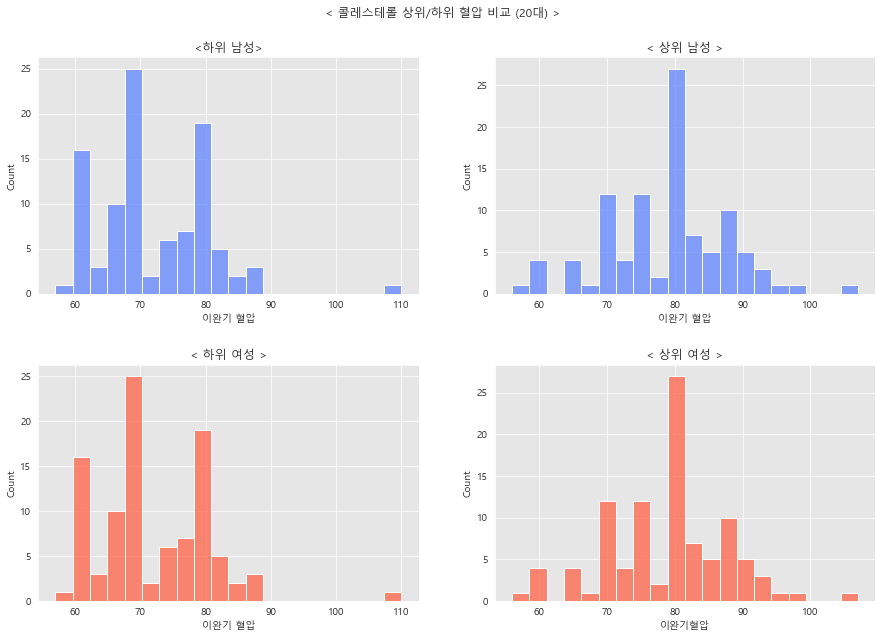

In [98]:
col_top_m=col20_top2000_m['이완기혈압']
col_low_m=col20_low2000_m['이완기혈압']
col_top_w=col20_top2000_m['이완기혈압']
col_low_w=col20_low2000_m['이완기혈압']

fig = plt.figure(figsize=(15, 10))

plt.subplots_adjust(hspace=0.3)
plt.subplot(2,2,1)
sns.histplot(col_low_m, color='#5f85ff',bins=20)
plt.title('<하위 남성>')
plt.xlabel('이완기 혈압')

plt.subplot(2,2,2)
sns.histplot(col_top_m, color='#5f85ff',bins=20)
plt.title('< 상위 남성 >')
plt.xlabel('이완기 혈압')

plt.subplot(2,2,3)
sns.histplot(col_low_w, color='#ff6347',bins=20)
plt.title('< 하위 여성 >')
plt.xlabel('이완기 혈압')

plt.subplot(2,2,4)
sns.histplot(col_top_w, color='#ff6347',bins=20)
plt.title('< 상위 여성 >')
plt.xlabel('이완기혈압')

plt.suptitle('< 콜레스테롤 상위/하위 혈압 비교 (20대) >', y=0.95)
plt.show()

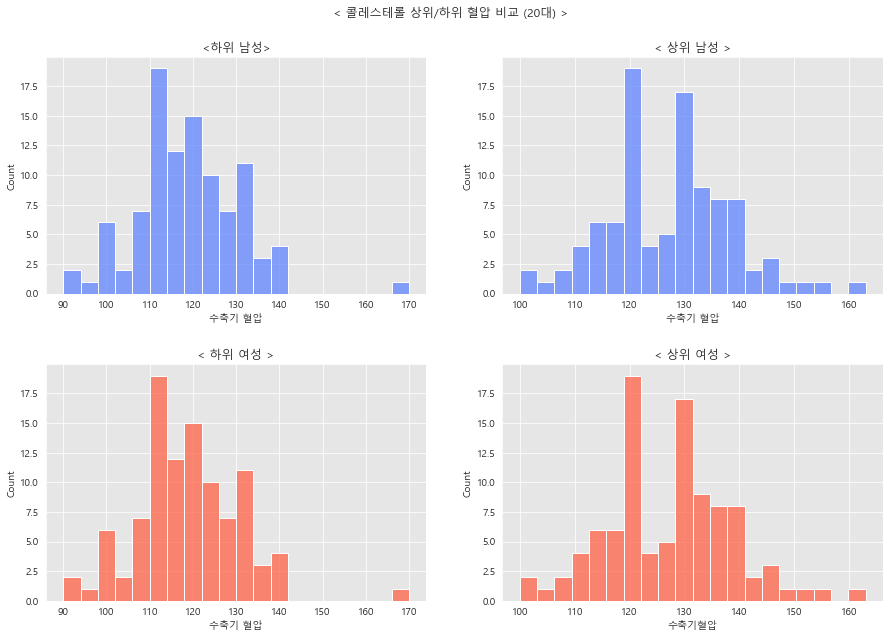

In [99]:
su_top_m=col20_top2000_m['수축기혈압']
su_low_m=col20_low2000_m['수축기혈압']
su_top_w=col20_top2000_m['수축기혈압']
su_low_w=col20_low2000_m['수축기혈압']

fig = plt.figure(figsize=(15, 10))

plt.subplots_adjust(hspace=0.3)
plt.subplot(2,2,1)
sns.histplot(su_low_m, color='#5f85ff',bins=20)
plt.title('<하위 남성>')
plt.xlabel('수축기 혈압')

plt.subplot(2,2,2)
sns.histplot(su_top_m, color='#5f85ff',bins=20)
plt.title('< 상위 남성 >')
plt.xlabel('수축기 혈압')

plt.subplot(2,2,3)
sns.histplot(su_low_w, color='#ff6347',bins=20)
plt.title('< 하위 여성 >')
plt.xlabel('수축기 혈압')

plt.subplot(2,2,4)
sns.histplot(su_top_w, color='#ff6347',bins=20)
plt.title('< 상위 여성 >')
plt.xlabel('수축기혈압')

plt.suptitle('< 콜레스테롤 상위/하위 혈압 비교 (20대) >', y=0.95)
plt.show()

In [107]:
su20_top2000 = age_20.sort_values(by='수축기혈압', ascending=False).head(100)
su20_low2000 = age_20.sort_values(by='수축기혈압', ascending=False).tail(100)
su20_low2000
su=su20_low2000['총콜레스테롤']
su1=su20_top2000['총콜레스테롤']

<Figure size 432x288 with 0 Axes>

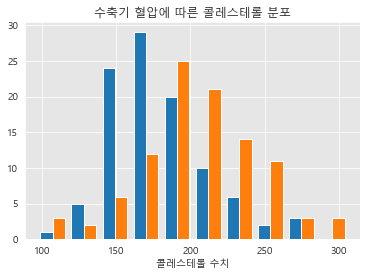

<Figure size 432x288 with 0 Axes>

In [109]:
plt.hist((su,su1) ,histtype='bar')
plt.title('수축기 혈압에 따른 콜레스테롤 분포')
plt.xlabel('콜레스테롤 수치')
plt.figure()

In [128]:
e20_top100_m = age_20_m.sort_values(by='이완기혈압', ascending=False).head(100)
e20_low100_m = age_20_m.sort_values(by='이완기혈압', ascending=False).tail(100)

e20_top100_w = age_20_w.sort_values(by='이완기혈압', ascending=False).head(100)
e20_low100_w = age_20_w.sort_values(by='이완기혈압', ascending=False).tail(100)

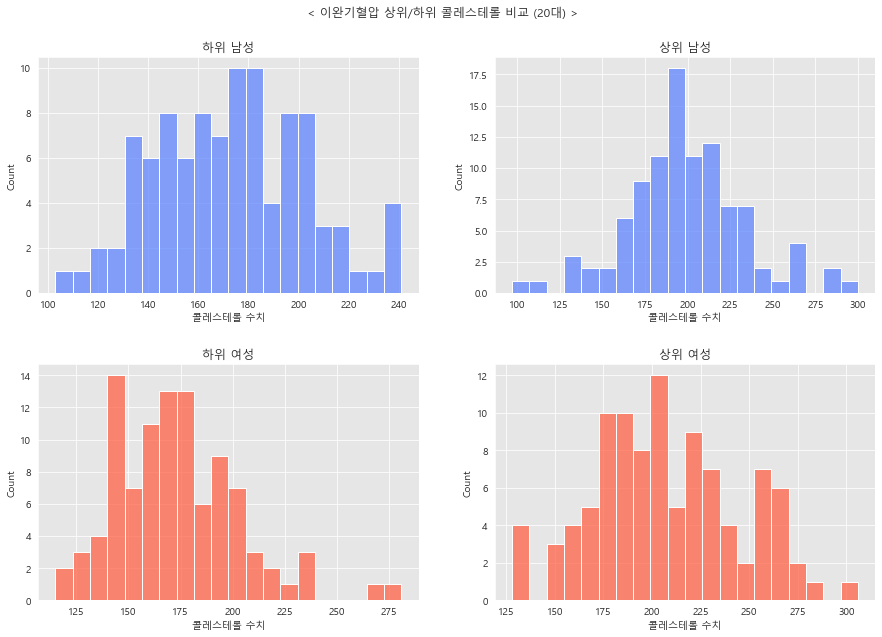

In [129]:
e_low_m=e20_low100_m['총콜레스테롤']
e_top_m=e20_top100_m['총콜레스테롤']

e_low_w=e20_low100_w['총콜레스테롤']
e_top_w=e20_top100_w['총콜레스테롤']

fig = plt.figure(figsize=(15, 10))

plt.subplots_adjust(hspace=0.3)

plt.subplot(2,2,1)
sns.histplot(e_low_m, color='#5f85ff',bins=20)
plt.title('하위 남성')
plt.xlabel('콜레스테롤 수치')


plt.subplot(2,2,2)
sns.histplot(e_top_m, color='#5f85ff',bins=20)
plt.title('상위 남성')
plt.xlabel('콜레스테롤 수치')

plt.subplot(2,2,3)
sns.histplot(e_low_w, color='#ff6347',bins=20)
plt.title('하위 여성')
plt.xlabel('콜레스테롤 수치')


plt.subplot(2,2,4)
sns.histplot(e_top_w, color='#ff6347',bins=20)
plt.title('상위 여성')
plt.xlabel('콜레스테롤 수치')

plt.suptitle('< 이완기혈압 상위/하위 콜레스테롤 비교 (20대) >', y=0.95)
plt.show()

### 체중과 트리글리세라이드의 관계

In [121]:
weight_top2000 = med_total_1.sort_values(by='체중(5Kg단위)', ascending=False).head(2000)
weight_low2000 = med_total_1.sort_values(by='체중(5Kg단위)', ascending=False).tail(2000)

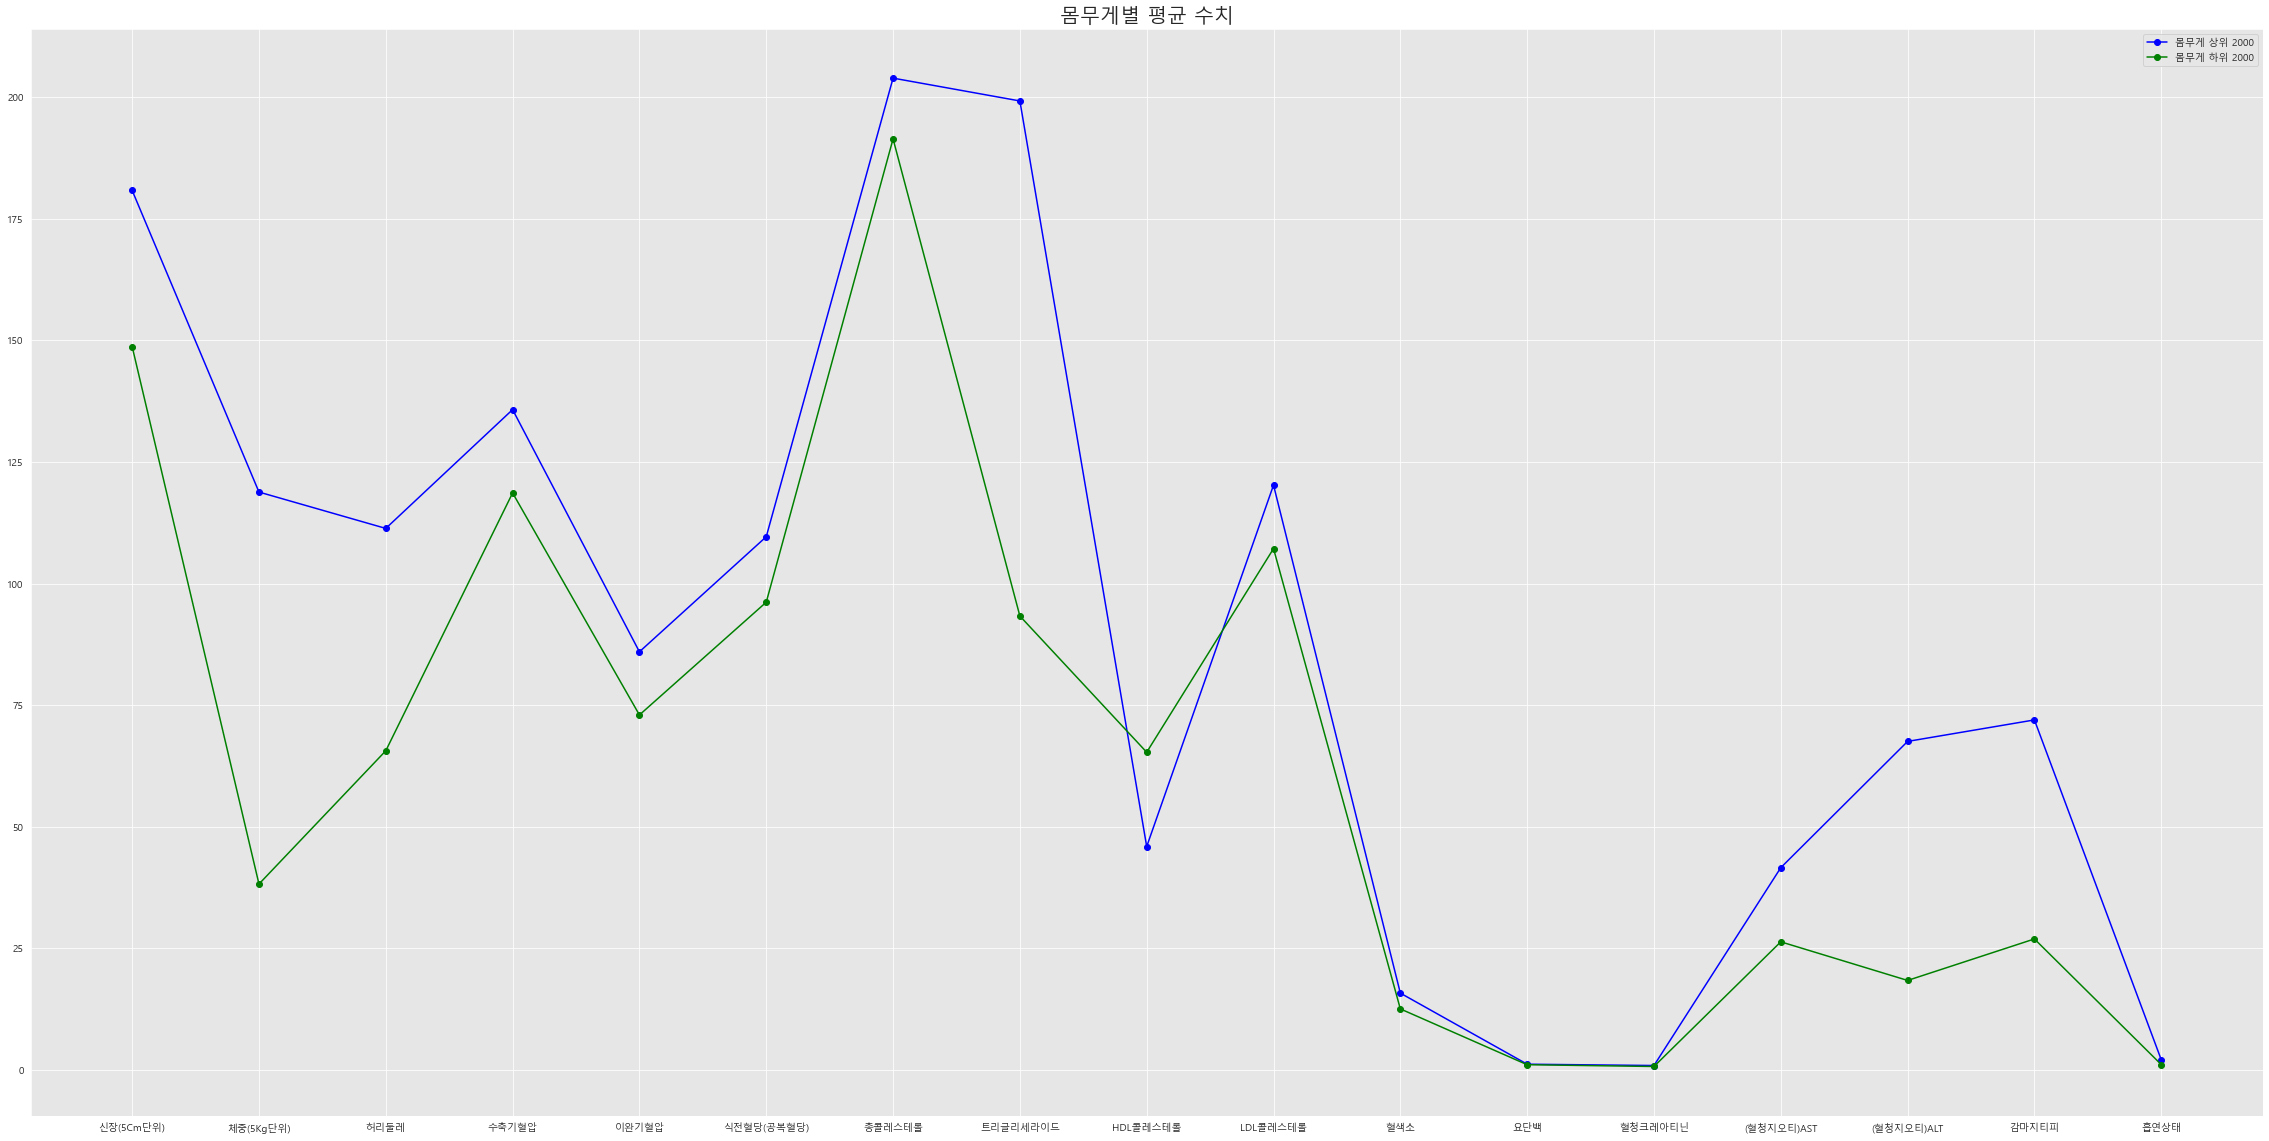

In [122]:
wei=weight_top2000.loc[:, ['연령대코드(5세단위)',
                      '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
wei_low=weight_low2000.loc[:, ['연령대코드(5세단위)',
                      '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
                      '수축기혈압','이완기혈압','식전혈당(공복혈당)',
                      '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
                       'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
                      '(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태']]
wei_mean=wei.mean()
wei_low_mean=wei_low.mean()
fig = plt.figure(figsize=(40, 20), facecolor='white')
plt.plot(wei_mean, 'go-',color='b',label='몸무게 상위 2000')
plt.plot(wei_low_mean, 'go-',color='g',label='몸무게 하위 2000')
plt.grid(True)
plt.title('몸무게별 평균 수치',size=20)
plt.legend()

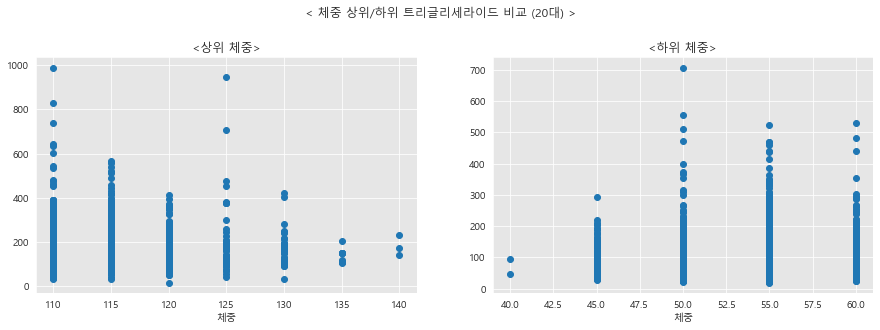

In [126]:
top=age_20_m.sort_values(by='체중(5Kg단위)',ascending=False).head(1000)
weight_top=top['체중(5Kg단위)'].values
tre_top=top['트리글리세라이드'].values
low=age_20_m.sort_values(by='체중(5Kg단위)',ascending=False).tail(5000)
weight_low=low['체중(5Kg단위)'].values
tre_low=low['트리글리세라이드'].values
fig = plt.figure(figsize=(15, 10))

plt.subplots_adjust(hspace=0.3)
plt.subplot(2,2,1)
plt.scatter(weight_top,tre_top)
plt.title("<상위 체중>")
plt.xlabel('체중')

plt.subplot(2,2,2)
plt.scatter(weight_low,tre_low)
plt.title("<하위 체중>")
plt.xlabel('체중')

plt.suptitle('< 체중 상위/하위 트리글리세라이드 비교 (20대) >', y=0.95)
plt.show()

### 연령대, 지역에 따른 트리글리세라이드 수치 비교

In [101]:
female_1 = med1[med1['성별코드']==2].groupby('시도코드')[['트리글리세라이드']].mean()

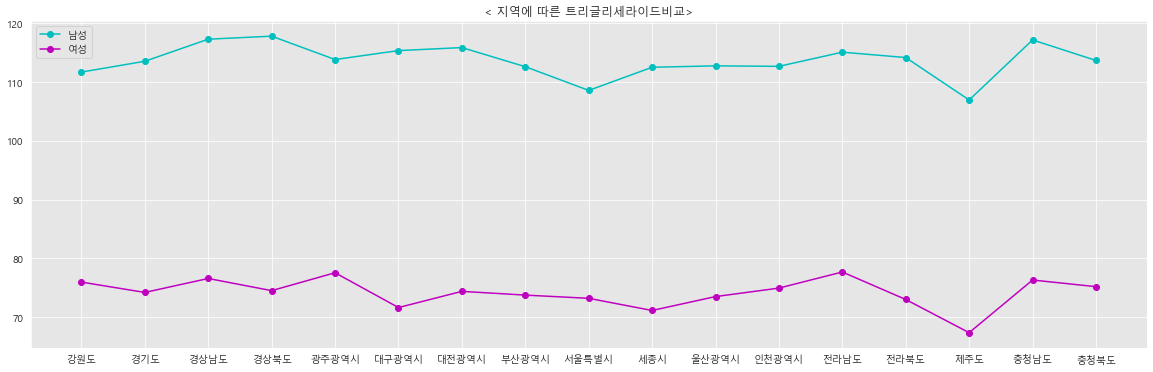

In [104]:
male_12 = age_20[age_20['성별코드']==1].groupby('시도코드')[['트리글리세라이드']].mean()
male_1 = age_20[age_20['성별코드']==2].groupby('시도코드')[['트리글리세라이드']].mean()


plt.figure(figsize=(20, 6), facecolor='white')

plt.plot(male_12, 'co-', label='남성')
plt.plot(male_1, 'mo-', label='여성')
plt.title('< 지역에 따른 트리글리세라이드비교>')

# plt.xticks(rotation = - 45 )

plt.grid(True)
plt.legend()

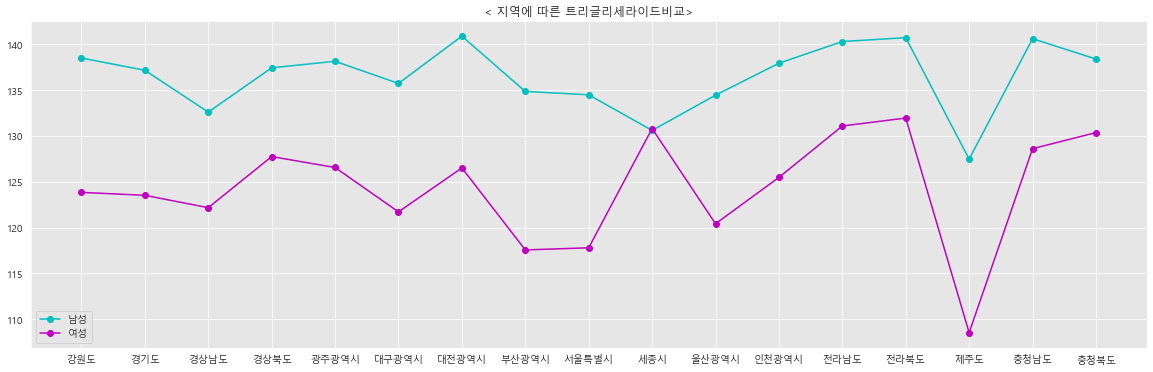

In [130]:
male_12 = age_60[age_60['성별코드']==1].groupby('시도코드')[['트리글리세라이드']].mean()
male_1 = age_60[age_60['성별코드']==2].groupby('시도코드')[['트리글리세라이드']].mean()


plt.figure(figsize=(20, 6), facecolor='white')

plt.plot(male_12, 'co-', label='남성')
plt.plot(male_1, 'mo-', label='여성')
plt.title('< 지역에 따른 트리글리세라이드비교>')

# plt.xticks(rotation = - 45 )

plt.grid(True)
plt.legend()

### 음주 상태와 혈청지오티 / 혈청지피티 / 감마지티피 의 관계
혈청지오티 - 간 기능을 나타내는 혈액검사상의 수치, 간세포 이외에 심장, 신장, 뇌 , 근육 등에도 존재하는 효소로 이러한 세포들이 손상을 받는 경우 농도가 증가함. 음주 경력에 굉장히 영향을 많이 받음. 근육운동을 많이하는 사람들에게서 근육 손상으로 인해 수치가 높아지는 경향이 있다.

혈청지피티 - 간 기능을 나타내는 혈액검사상의 수치, ALT는 주로 간세포 안에 존재하는 효소로, 간세포가 손상을 받는 경우 농도가 증가함. AST / ALT 비율이 2 이상인 경우 간 세포가 파괴되었을 가능성이 높다.

감마지피티 - 감마지티피는 알코올이나 약물의 해독작용과 관련이 있는 효소로, 이 역시 간에만 있는 것이 아니라 콩팥, 비장, 심장, 췌장 같은 곳에도 존재한다.

In [82]:

med_total_1['연령대코드(5세단위)'] = med_total_1['연령대코드(5세단위)'].map({5: '20~24세', 6: '25~29세', 7: '30~34세', 8: '35~39세', 
                                                                         9: '40~44세', 10: '45~49세', 11: '50~54세', 12: '55~59세', 
                                                             13: '60~64세', 14: '65~69세', 15: '70~74세', 16: '75~79세', 17: '80~84세', 18: '85세+',})

In [83]:

drink_m = med_total_1[(med_total_1['음주여부']=='Y') & (med_total_1['성별코드']==1)]
drink_w = med_total_1[(med_total_1['음주여부']=='Y') & (med_total_1['성별코드']==2)]
not_drink_m = med_total_1[(med_total_1['음주여부']=='N') & (med_total_1['성별코드']==1)]
not_drink_w = med_total_1[(med_total_1['음주여부']=='N') & (med_total_1['성별코드']==2)]

drink_m.shape, drink_w.shape, not_drink_m.shape, not_drink_w.shape

((303829, 28), (386948, 28), (363296, 28), (132386, 28))

In [84]:
group_1 = drink_m.groupby('연령대코드(5세단위)')['감마지티피'].mean()
group_2 = drink_w.groupby('연령대코드(5세단위)')['감마지티피'].mean()
group_3 = not_drink_m.groupby('연령대코드(5세단위)')['감마지티피'].mean()
group_4 = not_drink_w.groupby('연령대코드(5세단위)')['감마지티피'].mean()

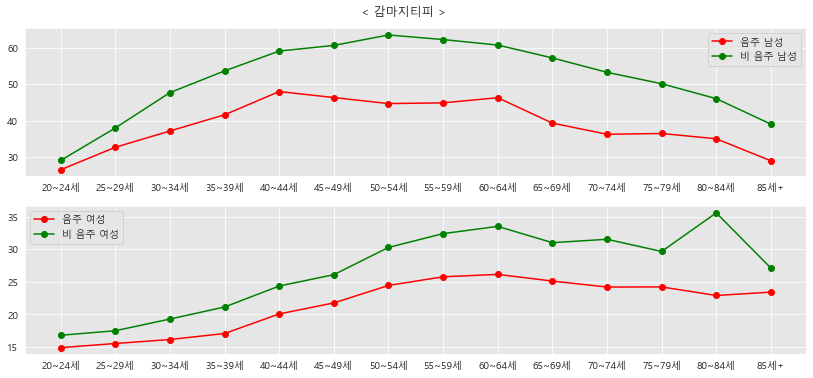

In [85]:
plt.figure(figsize=(14, 6))

plt.subplot(2,1,1)
plt.plot(group_1, 'ro-', label='음주 남성')
plt.plot(group_3, 'go-', label='비 음주 남성')
plt.legend()

plt.subplot(2,1,2)
plt.plot(group_2, 'ro-', label='음주 여성')
plt.plot(group_4, 'go-', label='비 음주 여성')
plt.legend()

plt.suptitle('< 감마지티피 >', y=0.93)

plt.show()

In [86]:
group_1 = drink_m.groupby('연령대코드(5세단위)')['(혈청지오티)AST'].mean()
group_2 = drink_w.groupby('연령대코드(5세단위)')['(혈청지오티)AST'].mean()
group_3 = not_drink_m.groupby('연령대코드(5세단위)')['(혈청지오티)AST'].mean()
group_4 = not_drink_w.groupby('연령대코드(5세단위)')['(혈청지오티)AST'].mean()

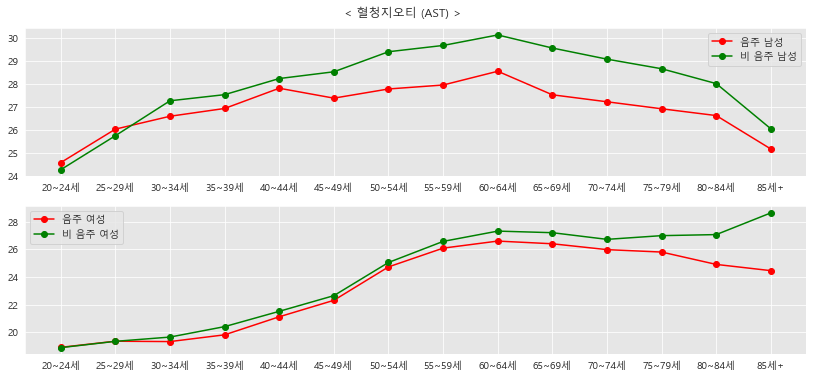

In [87]:
plt.figure(figsize=(14, 6))

plt.subplot(2,1,1)
plt.plot(group_1, 'ro-', label='음주 남성')
plt.plot(group_3, 'go-', label='비 음주 남성')
plt.legend()

plt.subplot(2,1,2)
plt.plot(group_2, 'ro-', label='음주 여성')
plt.plot(group_4, 'go-', label='비 음주 여성')
plt.legend()

plt.suptitle('< 혈청지오티 (AST) >', y=0.93)

plt.show()

In [88]:

group_1 = drink_m.groupby('연령대코드(5세단위)')['(혈청지오티)ALT'].mean()
group_2 = drink_w.groupby('연령대코드(5세단위)')['(혈청지오티)ALT'].mean()
group_3 = not_drink_m.groupby('연령대코드(5세단위)')['(혈청지오티)ALT'].mean()
group_4 = not_drink_w.groupby('연령대코드(5세단위)')['(혈청지오티)ALT'].mean()

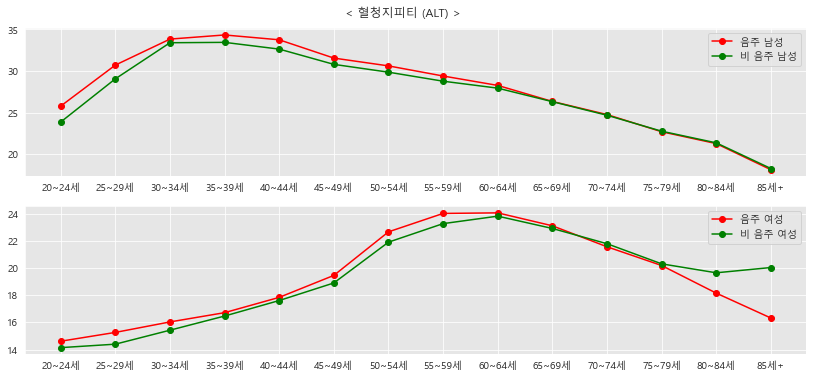

In [89]:
plt.figure(figsize=(14, 6))

plt.subplot(2,1,1)
plt.plot(group_1, 'ro-', label='음주 남성')
plt.plot(group_3, 'go-', label='비 음주 남성')
plt.legend()

plt.subplot(2,1,2)
plt.plot(group_2, 'ro-', label='음주 여성')
plt.plot(group_4, 'go-', label='비 음주 여성')
plt.legend()

plt.suptitle('< 혈청지피티 (ALT) >', y=0.93)

plt.show()

In [90]:
drink_df = med_total_1[['연령대코드(5세단위)', '성별코드', '감마지티피', '음주여부']].sort_values(by=['연령대코드(5세단위)', '감마지티피'], ascending=True)

drink_df

연령대코드(5세단위)  성별코드  감마지티피 음주여부
1738178      20~24세     1    1.0    Y
3070026      20~24세     2    2.0    Y
1355327      20~24세     1    3.0    Y
3016053      20~24세     2    4.0    Y
3080990      20~24세     2    4.0    Y
...             ...   ...    ...  ...
3490000        85세+     1  433.0    Y
3571192        85세+     2  589.0    Y
3610466        85세+     2  605.0    Y
3465372        85세+     1  670.0    N
3496280        85세+     2  999.0    Y

[1382581 rows x 4 columns]

In [93]:
age_20[age_20['(혈청지오티)AST']==30]['(혈청지오티)AST']

27        30.0
38        30.0
47        30.0
58        30.0
102       30.0
          ... 
111443    30.0
111492    30.0
111506    30.0
111532    30.0
111581    30.0
Name: (혈청지오티)AST, Length: 1753, dtype: float64

In [94]:

print(age_20.sort_values(by='(혈청지오티)AST', ascending=False).head(len(age_20)//5)['(혈청지오티)AST'].describe())
print(age_20.sort_values(by='(혈청지오티)ALT', ascending=False).head(len(age_20)//5)['(혈청지오티)ALT'].describe())
print(age_20.sort_values(by='감마지티피', ascending=False).head(len(age_20)//5)['감마지티피'].describe())

count    22319.000000
mean        40.229939
std         33.331136
min         27.000000
25%         29.000000
50%         32.000000
75%         40.000000
max       1278.000000
Name: (혈청지오티)AST, dtype: float64
count    22319.000000
mean        54.890273
std         38.471874
min         30.000000
25%         35.000000
50%         43.000000
75%         60.000000
max       1300.000000
Name: (혈청지오티)ALT, dtype: float64
count    22319.000000
mean        65.741431
std         45.019989
min         34.000000
25%         41.000000
50%         51.000000
75%         73.000000
max        977.000000
Name: 감마지티피, dtype: float64


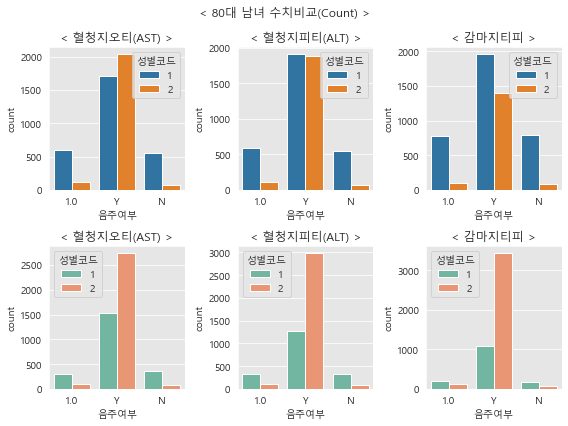

In [96]:
test_1 = age_80.sort_values(by='(혈청지오티)AST', ascending=False).head(len(age_80)//4).sort_index()
test_2 = age_80.sort_values(by='(혈청지오티)ALT', ascending=False).head(len(age_80)//4).sort_index()
test_3 = age_80.sort_values(by='감마지티피', ascending=False).head(len(age_80)//4).sort_index()

test_4 = age_80.sort_values(by='(혈청지오티)AST', ascending=False).tail(len(age_80)//4).sort_index()
test_5 = age_80.sort_values(by='(혈청지오티)ALT', ascending=False).tail(len(age_80)//4).sort_index()
test_6 = age_80.sort_values(by='감마지티피', ascending=False).tail(len(age_80)//4).sort_index()

fig = plt.figure(figsize=(8, 6), facecolor='white')

fig.add_subplot(231)
sns.countplot(data=test_1, x='음주여부', hue='성별코드')
plt.title('< 혈청지오티(AST) >')

fig.add_subplot(232)
sns.countplot(data=test_2, x='음주여부', hue='성별코드')
plt.title('< 혈청지피티(ALT) >')

fig.add_subplot(233)
sns.countplot(data=test_3, x='음주여부', hue='성별코드')
plt.title('< 감마지티피 >')

fig.add_subplot(234)
sns.countplot(data=test_4, x='음주여부', hue='성별코드', palette=plt.cm.Set2.colors)
plt.title('< 혈청지오티(AST) >')

fig.add_subplot(235)
sns.countplot(data=test_5, x='음주여부', hue='성별코드', palette=plt.cm.Set2.colors)
plt.title('< 혈청지피티(ALT) >')

fig.add_subplot(236)
sns.countplot(data=test_6, x='음주여부', hue='성별코드', palette=plt.cm.Set2.colors)
plt.title('< 감마지티피 >')
plt.suptitle('< 80대 남녀 수치비교(Count) >')

plt.tight_layout()